#### Disable Weight and Biases (W&B) Logging

This cell is designed to disable `wandb` (Weight and Biases) logging, a common practice in machine learning workflows for experiment tracking.

-   **`!pip uninstall -y wandb`**: This line uses a shell command (`!`) to uninstall the `wandb` Python package. The `-y` flag automatically confirms the uninstallation, preventing interactive prompts. This ensures that any existing installation of `wandb` is removed from the environment, which is a proactive measure to prevent it from running.

-   **`import os`**: This line imports Python's built-in `os` module, which provides a way to interact with the operating system, including environment variables.

-   **`os.environ["WANDB_DISABLED"] = "true"`**: This line sets the `WANDB_DISABLED` environment variable to the string "true". Many `wandb` integrations and libraries check for this specific environment variable. If it's set to "true", they will automatically skip initializing `wandb` logging, even if the package were somehow still present or reinstalled. This provides a robust way to prevent `wandb` from interfering with the current execution or consuming resources if logging is not desired.

In [2]:
!pip uninstall -y wandb

import os
os.environ["WANDB_DISABLED"] = "true"

Found existing installation: wandb 0.23.0
Uninstalling wandb-0.23.0:
  Successfully uninstalled wandb-0.23.0


#### Install Required Libraries: numpy and Ultralytics

This cell ensures that the necessary Python libraries, `numpy` and `ultralytics`, are installed in the Colab environment at specific versions.

-   **`!pip install "numpy==1.26.4"`**: This command installs `numpy` version `1.26.4`. Specifying a precise version helps in maintaining consistency across environments and preventing unexpected issues that might arise from API changes in newer versions of the library.
    -   `numpy` is a foundational library for numerical computation in Python, essential for array and matrix operations, which are heavily used in machine learning.
-   **`!pip install "ultralytics==8.3.0"`**: This command installs the `ultralytics` library, version `8.3.0`. The Ultralytics library is widely used for state-of-the-art YOLO (You Only Look Once) object detection models, including YOLOv8.

The output from this cell, "Requirement already satisfied: numpy==1.26.4" and "Requirement already satisfied: ultralytics==8.3.0", indicates that these packages (and their dependencies) were already installed in the environment at the specified or compatible versions, so no new installation was required. This is common in Colab environments where popular libraries are often pre-installed.

In [3]:
!pip install "numpy==1.26.4"   # safe, widely compatible
!pip install "ultralytics==8.3.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 113.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you 

INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88


#### Mount Google Drive

This cell is responsible for mounting your Google Drive to the Colab environment. Mounting Google Drive allows the Colab notebook to access files and folders stored in your Drive, which is crucial for loading datasets, saving model weights, and storing results persistently.

-   **`from google.colab import drive`**: This line imports the `drive` module from the `google.colab` library, which provides specific functionalities for interacting with Google Drive within Colab.
-   **`drive.mount("/content/drive")`**: This command initiates the process of mounting your Google Drive. When executed, it will typically prompt you to authorize Google Colab to access your Google Drive by opening a new tab or displaying an authentication code. Once authorized, your Google Drive contents will be accessible at the path `/content/drive` within the Colab file system.

The output `Mounted at /content/drive` confirms that your Google Drive has been successfully mounted and is ready for use.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Setup Paths and SAHI Imports

This cell performs initial setup steps crucial for the subsequent object detection tasks, specifically integrating SAHI (Slicing Aided Hyper Inference) with YOLOv8.

-   **`from google.colab import drive; drive.mount("/content/drive")`**: This re-attempts to mount Google Drive. The output `Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True)` indicates that Drive was already mounted by a previous cell, so this line ensures access to your Drive files where datasets and model weights are stored.

-   **`import os`, `from glob import glob`, `from pathlib import Path`**: These lines import standard Python modules for interacting with the operating system, finding files (`glob`), and handling file paths in an object-oriented way (`pathlib.Path`).

-   **`from sahi.predict import get_sliced_prediction`, `from sahi import AutoDetectionModel`**: These lines import core components from the SAHI library. `AutoDetectionModel` is used to load a pre-trained detection model (like YOLOv8) in a SAHI-compatible format, and `get_sliced_prediction` is the main function for performing sliced inference.

-   **`BASE_DIR = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")`**: This defines the base directory for the project within your mounted Google Drive.

-   **`WEIGHTS = BASE_DIR / "runs" / "yolov8_training" / "train" / "weights" / "best.pt"`**: This constructs the `Path` object pointing to the pre-trained YOLOv8 model weights (`best.pt`) that will be used for detection.

-   **`VAL_IMAGES = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "images"`**: This defines the path to the validation images of the VisDrone dataset, which will be used for evaluation.

-   **`SAHI_OUT = BASE_DIR / "runs" / "sahi_visdrone_val_baseline"`**: This sets the output directory where SAHI-processed images and results will be saved.

-   **`SAHI_OUT.mkdir(parents=True, exist_ok=True)`**: This creates the specified SAHI output directory if it doesn't already exist. `parents=True` ensures any necessary parent directories are also created, and `exist_ok=True` prevents an error if the directory already exists.

-   **`print(...)` statements**: These lines simply print the constructed paths to confirm their correct setup in the Colab environment.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import os
from glob import glob
from pathlib import Path

from sahi.predict import get_sliced_prediction
from sahi import AutoDetectionModel

# ========= 2. Paths (edit if needed) =========
BASE_DIR   = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
WEIGHTS    = BASE_DIR / "runs" / "yolov8_training" / "train" / "weights" / "best.pt"
VAL_IMAGES = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "images"

SAHI_OUT   = BASE_DIR / "runs" / "sahi_visdrone_val_baseline"
SAHI_OUT.mkdir(parents=True, exist_ok=True)

print("Weights :", WEIGHTS)
print("Val imgs:", VAL_IMAGES)
print("SAHI out:", SAHI_OUT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Weights : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt
Val imgs: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/images
SAHI out: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/sahi_visdrone_val_baseline


#### Load YOLO Model and Display Information

This cell initializes a YOLOv8 model with pre-trained weights and displays its summary information. This is a common step to verify that the model is loaded correctly and to understand its architecture and parameter count.

-   **`from pathlib import Path`**, **`import torch`**, **`from ultralytics import YOLO`**: These lines import necessary libraries. `Path` for object-oriented filesystem paths, `torch` as the underlying deep learning framework, and `YOLO` for interacting with Ultralytics models.

-   **`BASE_DIR = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")`**: Defines the base directory for the project, located in your Google Drive.

-   **`DATA_YAML = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "visdrone.yaml"`**: Specifies the path to the dataset configuration file, which typically contains information about image paths, class names, and splits.

-   **`RUN_DIR = BASE_DIR / "runs" / "yolov8_training"`** and **`RUN_NAME = "train"`**: Define the directory and name for a previous training run, which is where the model weights are stored.

-   **`BEST = RUN_DIR / RUN_NAME / "weights" / "best.pt"`** and **`LAST = RUN_DIR / RUN_NAME / "weights" / "last.pt"`**: Construct `Path` objects pointing to the `best.pt` (best performing) and `last.pt` (most recent) weight files from the specified training run.

-   **`print("Best :", BEST)`** and **`print("Last :", LAST)`**: Display the constructed paths for verification.

-   **`model = YOLO(str(BEST))`**: Initializes a `YOLO` model instance, loading the weights from the `best.pt` file. This model object will then be used for evaluation or further fine-tuning.

-   **`model.info()`**: Prints a summary of the loaded model's architecture, including the number of layers, total parameters, trainable parameters, and GFLOPs (Giga Floating Point Operations) which gives an idea of the model's computational complexity.

In [12]:
from pathlib import Path
import torch
from ultralytics import YOLO

BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
DATA_YAML   = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "visdrone.yaml"
RUN_DIR = BASE_DIR / "runs" / "yolov8_training"
RUN_NAME = "train"

BEST   = RUN_DIR / RUN_NAME / "weights" / "best.pt"
LAST   = RUN_DIR / RUN_NAME / "weights" / "last.pt"

print("Best  :", BEST)
print("Last  :", LAST)

model = YOLO(str(BEST))  # use best.pt for evaluation
model.info()

Best  : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt
Last  : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/last.pt
Model summary: 365 layers, 43,637,550 parameters, 0 gradients, 165.4 GFLOPs


(365, 43637550, 0, 165.441792)

#### Baseline Model Evaluation on VisDrone Validation Split

This cell performs a baseline evaluation of the loaded YOLOv8-L model on the VisDrone validation dataset. It uses the `model.val()` method from Ultralytics to compute various object detection metrics without any Slicing Aided Hyper Inference (SAHI) or Small Object Detection (SOD) techniques applied yet.

-   **`data=str(DATA_YAML)`**: Specifies the path to the `visdrone.yaml` configuration file, which contains information about the dataset, including paths to images and labels, and class names.
-   **`split="val"`**: Indicates that the evaluation should be performed on the validation split of the dataset.
-   **`imgsz=640`**: Sets the image size for inference to 640x640 pixels, matching the training image size.
-   **`batch=16`**: Defines the batch size for processing images during validation.
-   **`workers=0`**: Crucially, this parameter is set to `0` to run the DataLoader in a single process. This is often necessary in Colab environments or when dealing with certain library incompatibilities (like NumPy C-extensions) that can arise with multiprocessing.
-   **`metrics = model.val(...)`**: Executes the validation process and stores the computed metrics in the `metrics` object.

After the evaluation, the cell prints key performance indicators:
-   **`mAP50`**: Mean Average Precision at an IoU (Intersection over Union) threshold of 0.5. This is a common metric for object detection, indicating how accurately bounding boxes are predicted.
-   **`mAP50-95`**: Mean Average Precision averaged over various IoU thresholds from 0.5 to 0.95. This provides a more comprehensive measure of detection accuracy across different localization requirements.
-   **`Precision`**: The average precision across all classes.
-   **`Recall`**: The average recall across all classes.
-   **`Results saved to:`**: The directory where detailed validation results, such as plots and confusion matrices, are saved.

In [13]:
# Baseline evaluation on VisDrone val split with single-process DataLoader
metrics = model.val(
    data=str(DATA_YAML),
    split="val",      # or "test" / "test-dev" later
    imgsz=640,
    batch=16,
    workers=0,        # <<< critical: no multiprocessing => avoids NumPy C-ext issue
)

print("Baseline YOLOv8-L (no SOD, no SAHI)")
print("mAP50:     ", metrics.box.map50)
print("mAP50-95:  ", metrics.box.map)
print("Precision: ", metrics.box.mp)
print("Recall:    ", metrics.box.mr)
print("Results saved to:", metrics.save_dir)

Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

Model summary (fused): 268 layers, 43,614,318 parameters, 0 gradients, 164.9 GFLOPs


val: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:21<00:00,  1.61it/s]


                   all        548      38759      0.554      0.444      0.458      0.281
            pedestrian        520       8844      0.603      0.465      0.508      0.247
                people        482       5125      0.623       0.33      0.391      0.166
               bicycle        364       1287      0.328      0.235      0.217      0.103
                   car        515      14064      0.778      0.796      0.826      0.607
                   van        421       1975      0.528      0.498      0.475      0.343
                 truck        266        750      0.571      0.436      0.435      0.284
                   bus        337       1045      0.468       0.38       0.36      0.209
                 motor        220        532      0.328      0.186      0.189      0.116
              tricycle        131        251       0.75       0.59      0.659      0.484
       awning-tricycle        485       4886      0.559      0.522      0.517      0.249
Speed: 0.1ms preproce

#### Create SAHI Detection Model from YOLOv8-L Baseline

This cell initializes a `sahi.AutoDetectionModel` using the previously trained YOLOv8-L model weights. This is a crucial step for enabling Slicing Aided Hyper Inference (SAHI), which improves detection performance, especially for small objects, by performing inference on sliced image patches.

-   **`detection_model = AutoDetectionModel.from_pretrained(...)`**: This line creates an instance of SAHI's `AutoDetectionModel`. The `from_pretrained` method is used to load a pre-trained model.
    -   **`model_type="yolov8"`**: Specifies that the underlying model is a YOLOv8 model, indicating to SAHI which wrapper to use.
    -   **`model_path=str(WEIGHTS)`**: Provides the path to the `best.pt` weight file of your trained YOLOv8-L model. SAHI will load these weights into its internal model structure.
    -   **`confidence_threshold=0.25`**: Sets the confidence threshold for object detection. Only predictions with a confidence score above this value will be considered. This parameter can be tuned to balance precision and recall.
    -   **`device="cuda:0"`**: Specifies the device on which the model should run. `"cuda:0"` indicates the first GPU available. If a GPU is not available or desired, this can be set to `"cpu"`.

-   **`print("SAHI model ready.")`**: Confirms that the SAHI detection model has been successfully loaded and configured.

In [ ]:
# ========= 3. Create SAHI detection model from YOLOv8-L baseline =========

detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",                         # SAHI's wrapper for Ultralytics YOLOv8
    model_path=str(WEIGHTS),                     # your trained weights
    confidence_threshold=0.25,                   # you can tune this
    device="cuda:0"                              # or "cpu" if no GPU
)

print("SAHI model ready.")

SAHI model ready.


#### Apply SAHI for Sliced Prediction

This cell demonstrates and executes Slicing Aided Hyper Inference (SAHI) using the previously loaded detection model. SAHI is particularly effective for detecting small objects in large images by slicing the image into smaller, overlapping patches, performing inference on each patch, and then merging the detections back into the original image coordinates. This helps overcome the issue of small objects being missed or having low confidence scores when the entire image is downscaled for inference.

**Section 4A: Run SAHI on a single example image**

-   **`sample_image = sorted(glob(str(VAL_IMAGES / "*.jpg")))[0]`**: This line selects the first JPEG image from the validation image directory to serve as a sample for a quick demonstration.
-   **`res = get_sliced_prediction(...)`**: This is the core SAHI function. It takes the `sample_image` and the `detection_model` as input, along with several key slicing parameters:
    -   **`slice_height=640`** and **`slice_width=640`**: Define the dimensions of the individual image slices. These are typically chosen to match the `imgsz` (input image size) used during model training to ensure optimal performance of the underlying object detector.
    -   **`overlap_height_ratio=0.25`** and **`overlap_width_ratio=0.25`**: Specify the overlap between adjacent slices. An overlap of 20-30% (0.2-0.3) is common to prevent objects from being cut across slice boundaries in a way that makes them difficult to detect.
-   **`res.export_visuals(...)`**: Saves an annotated image (with bounding boxes) of the SAHI prediction on the sample image to the specified `SAHI_OUT` directory.

**Section 4B: Run SAHI on the entire VisDrone val set**

-   **`image_paths = sorted(glob(str(VAL_IMAGES / "*.jpg")))`**: Gathers all JPEG image paths from the validation set.
-   **`for img_path in tqdm(image_paths):`**: Iterates through each image in the validation set, displaying a progress bar using `tqdm`.
-   Inside the loop, `get_sliced_prediction` is called for each image with the same slicing parameters as the sample. The results are then saved as individual visualization files (e.g., `image_name_sahi.png`) in the `SAHI_OUT` directory.

This entire process generates visual outputs for inspection, allowing you to see how SAHI improves detection, especially for smaller objects, compared to a direct, non-sliced inference.

In [ ]:
from tqdm.auto import tqdm
import os

# ========= 4A. Run SAHI on a single example image =========
sample_image = sorted(glob(str(VAL_IMAGES / "*.jpg")))[0]
print("Sample image:", sample_image)

res = get_sliced_prediction(
    sample_image,
    detection_model,
    slice_height=640,             # slice size (matches your training imgsz)
    slice_width=640,
    overlap_height_ratio=0.25,    # 20–30% overlap is usually good
    overlap_width_ratio=0.25,
)

res.export_visuals(export_dir=str(SAHI_OUT), file_name="sample_sahi.png")
print("Saved:", SAHI_OUT / "sample_sahi.png")

# ========= 4B. Run SAHI on the entire VisDrone val set =========
image_paths = sorted(glob(str(VAL_IMAGES / "*.jpg")))
print("Total val images:", len(image_paths))

for img_path in tqdm(image_paths):
    file_stem = Path(img_path).stem
    result = get_sliced_prediction(
        img_path,
        detection_model,
        slice_height=640,
        slice_width=640,
        overlap_height_ratio=0.25,
        overlap_width_ratio=0.25,
    )

    # save visualization per image
    out_name = f"{file_stem}_sahi.png"
    result.export_visuals(export_dir=str(SAHI_OUT), file_name=out_name)

print("All SAHI visualizations saved in:", SAHI_OUT)

Sample image: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/images/0000001_02999_d_0000005.jpg
Performing prediction on 8 slices.
Saved: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/sahi_visdrone_val_baseline/sample_sahi.png
Total val images: 548


  0%|          | 0/548 [00:00<?, ?it/s]

Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing predictio

#### Helper Functions for Object Detection Metrics

This cell defines several utility functions essential for calculating object detection performance metrics, specifically Mean Average Precision (mAP) at an IoU threshold of 0.5 (mAP@0.5).

-   **`VAL_IMAGES`** and **`VAL_LABELS`**: These lines set up `Path` objects pointing to the validation images and their corresponding YOLO-format label files, assuming a standard YOLO dataset structure where labels are in a `labels` subdirectory parallel to `images`.

-   **`CLASSES = list(range(10))`**: Defines the class IDs for the dataset, assuming 10 classes (0 through 9).

-   **`def xywhn_to_xyxy(xywhn, w, h):`**: This function converts bounding box coordinates from the YOLO format (normalized center x, center y, width, height) to the VOC format (absolute pixel values for top-left x, top-left y, bottom-right x, bottom-right y).
    -   `xywhn`: A list or array containing the normalized center x, center y, width, and height of the bounding box.
    -   `w, h`: The width and height of the image in pixels, respectively. These are used to denormalize the coordinates.
    -   It returns a list `[x1, y1, x2, y2]` representing the top-left and bottom-right corners of the bounding box.

-   **`def iou_xyxy(box1, box2):`**: This function calculates the Intersection over Union (IoU) between two bounding boxes, both specified in `[x1, y1, x2, y2]` format.
    -   `box1, box2`: Lists or arrays representing the two bounding boxes.
    -   It computes the area of intersection and the area of union, then returns their ratio. IoU is a common metric to quantify the overlap between predicted and ground-truth bounding boxes.

-   **`def compute_ap(recall, precision):`**: This function calculates the Average Precision (AP) using the 101-point interpolated method, which is a standard evaluation protocol for object detection (e.g., in VOC challenges).
    -   `recall, precision`: Arrays of recall and precision values obtained from a Precision-Recall curve.
    -   It interpolates the precision values to ensure they are monotonically decreasing, and then calculates the area under the interpolated curve. This value represents the AP for a single class at a specific IoU threshold.

In [ ]:
import numpy as np
from pathlib import Path
from glob import glob
from tqdm.auto import tqdm
from PIL import Image

VAL_IMAGES = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/images")
VAL_LABELS = VAL_IMAGES.parent / "labels"   # standard YOLO structure

CLASSES = list(range(10))  # 0..9

def xywhn_to_xyxy(xywhn, w, h):
    # xywhn: [x_c, y_c, w, h] normalised
    x_c, y_c, bw, bh = xywhn
    x1 = (x_c - bw / 2) * w
    y1 = (y_c - bh / 2) * h
    x2 = (x_c + bw / 2) * w
    y2 = (y_c + bh / 2) * h
    return [x1, y1, x2, y2]

def iou_xyxy(box1, box2):
    # box: [x1,y1,x2,y2]
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter = max(0, x2 - x1) * max(0, y2 - y1)
    area1 = max(0, box1[2] - box1[0]) * max(0, box1[3] - box1[1])
    area2 = max(0, box2[2] - box2[0]) * max(0, box2[3] - box2[1])
    union = area1 + area2 - inter + 1e-7
    return inter / union

def compute_ap(recall, precision):
    # standard 101-point interpolated AP
    mrec = np.concatenate(([0.0], recall, [1.0]))
    mpre = np.concatenate(([0.0], precision, [0.0]))
    for i in range(mpre.size - 1, 0, -1):
        mpre[i-1] = np.maximum(mpre[i-1], mpre[i])
    idx = np.where(mrec[1:] != mrec[:-1])[0]
    ap = np.sum((mrec[idx + 1] - mrec[idx]) * mpre[idx + 1])
    return ap

#### SAHI Evaluation Setup and Data Collection

This cell sets up the SAHI detection model using baseline weights and then iterates through the validation dataset to collect ground truth (GT) labels and SAHI-generated predictions for subsequent evaluation. This process is crucial for computing performance metrics like mAP (Mean Average Precision) for SAHI-augmented inference.

-   **`from sahi.predict import get_sliced_prediction`, `from sahi import AutoDetectionModel`**: Imports necessary SAHI functions for sliced prediction and model loading.

-   **`WEIGHTS = ...`**: Specifies the path to the best trained YOLOv8 weights that will be used by the SAHI model.

-   **`detection_model = AutoDetectionModel.from_pretrained(...)`**: Initializes the SAHI-compatible detection model. This is the same setup as before, using `yolov8` as the `model_type`, the specified `WEIGHTS`, a `confidence_threshold` of 0.25, and running on `cuda:0` (GPU).

-   **`image_paths = sorted(glob(str(VAL_IMAGES / "*.jpg")))`**: Gathers all image file paths from the validation set, ensuring they are processed in a consistent order.

-   **`all_gts = {c: [] for c in CLASSES}`** and **`all_preds = {c: [] for c in CLASSES}`**: Initializes dictionaries to store ground truth bounding boxes and predicted bounding boxes, respectively. They are structured to hold lists of detections per class.
    -   `all_gts` stores `(image_id, box)` for each ground truth object.
    -   `all_preds` stores `(image_id, score, box)` for each predicted object.

-   **`for img_id, img_path in enumerate(tqdm(image_paths)):`**: Loops through each image in the validation dataset, using `tqdm` to display a progress bar.

    -   **`img = Image.open(img_path); w, h = img.size`**: Opens the current image to get its width and height, which are needed for converting normalized YOLO ground truth coordinates to absolute pixel values.

    -   **`---------- load GT labels ----------`**: Reads the corresponding YOLO-format label file (`.txt`) for the current image.
        -   **`label_path = VAL_LABELS / (Path(img_path).stem + ".txt")`**: Constructs the path to the label file.
        -   The code then parses each line, extracts the class ID (`cls`) and normalized `xywhn` coordinates, converts them to `xyxy` (top-left, bottom-right pixel coordinates) using the `xywhn_to_xyxy` helper function, and appends them to the `all_gts` dictionary.

    -   **`---------- SAHI prediction ----------`**: Performs SAHI sliced prediction on the current image.
        -   **`result = get_sliced_prediction(...)`**: Calls the core SAHI function with specified slice height, width, and overlap ratios. `verbose=0` suppresses detailed output for each prediction.
        -   **`for op in result.object_prediction_list:`**: Iterates through each object prediction (`op`) generated by SAHI.
            -   It extracts the class ID (`op.category.id`), confidence score (`op.score.value`), and converts the bounding box to `xyxy` format (`op.bbox.to_voc_bbox()`).
            -   These predicted objects are then appended to the `all_preds` dictionary, grouped by their class ID.

In [ ]:
from sahi.predict import get_sliced_prediction
from sahi import AutoDetectionModel

# Build SAHI detection model from baseline weights (same as before)
WEIGHTS = "/content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt"

detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",
    model_path=WEIGHTS,
    confidence_threshold=0.25,   # same as visuals
    device="cuda:0"
)

image_paths = sorted(glob(str(VAL_IMAGES / "*.jpg")))
print("Using images:", len(image_paths))

all_gts = {c: [] for c in CLASSES}   # list of GT boxes per class: (image_id, box)
all_preds = {c: [] for c in CLASSES} # list of preds per class: (image_id, score, box)

for img_id, img_path in enumerate(tqdm(image_paths)):
    img = Image.open(img_path)
    w, h = img.size

    # ---------- load GT labels ----------
    label_path = VAL_LABELS / (Path(img_path).stem + ".txt")
    if label_path.exists():
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                cls = int(parts[0])
                if cls not in CLASSES:
                    continue
                xywhn = list(map(float, parts[1:5]))
                xyxy = xywhn_to_xyxy(xywhn, w, h)
                all_gts[cls].append((img_id, xyxy))

    # ---------- SAHI prediction ----------
    result = get_sliced_prediction(
        img_path,
        detection_model,
        slice_height=640,
        slice_width=640,
        overlap_height_ratio=0.25,
        overlap_width_ratio=0.25,
        verbose=0,
    )

    for op in result.object_prediction_list:
        # Depending on SAHI version, you may need to inspect one `op` with print(dir(op))
        # to confirm these attributes:
        cls = int(op.category.id)              # class id, usually 0-based for YOLO models
        if cls not in CLASSES:
            continue
        score = float(op.score.value)
        x1, y1, x2, y2 = op.bbox.to_voc_bbox() # [minx, miny, maxx, maxy]
        all_preds[cls].append((img_id, score, [x1, y1, x2, y2]))

Using images: 548


  0%|          | 0/548 [00:00<?, ?it/s]

#### Calculate SAHI mAP@0.5 on VisDrone Validation Set

This cell implements a custom evaluation loop to calculate the Mean Average Precision (mAP) at an Intersection over Union (IoU) threshold of 0.5 (mAP@0.5) for the SAHI-generated predictions on the VisDrone validation dataset. This is a common metric used to assess the performance of object detection models.

Here's a breakdown of the process:

-   **`iou_thr = 0.5`**: Sets the IoU threshold for considering a detection as a True Positive (TP). A predicted bounding box must have an IoU of at least 0.5 with a ground truth box to be counted as correct.

-   **`aps = []`, `per_class_stats = {}`**: Initializes lists and dictionaries to store the Average Precision (AP) for each class and other per-class statistics.

-   **`for cls in CLASSES:`**: The core loop iterates through each defined object class.

    -   **`preds = all_preds[cls]`, `gts = all_gts[cls]`**: Retrieves all predictions and ground truth annotations for the current class.

    -   **`n_gt = len(gts)`**: Counts the total number of ground truth objects for the current class.

    -   **`preds = sorted(preds, key=lambda x: x[1], reverse=True)`**: Sorts the predictions in descending order of their confidence scores. This is crucial for building accurate Precision-Recall curves.

    -   **`gt_used = {}`**: A dictionary to keep track of which ground truth objects have already been matched by a prediction to avoid multiple detections for a single ground truth.

    -   **`tps = np.zeros(len(preds))`, `fps = np.zeros(len(preds))`**: Initializes arrays to store True Positives (TP) and False Positives (FP) for each prediction.

    -   **`gt_by_img = {}`**: Organizes ground truth boxes by image ID for efficient lookup during matching.

    -   **`for i, (img_id, score, pbox) in enumerate(preds):`**: Iterates through each sorted prediction.
        -   It finds the ground truth box in the same image that has the highest IoU with the current prediction.
        -   If the `best_iou` is greater than or equal to `iou_thr` and the ground truth box hasn't been `gt_used` yet, the prediction is marked as a True Positive (`tp[i] = 1`). The matched ground truth is then marked as used.
        -   Otherwise, the prediction is marked as a False Positive (`fps[i] = 1`).

    -   **`tp_cum = np.cumsum(tps)`, `fp_cum = np.cumsum(fps)`**: Computes cumulative sums of True Positives and False Positives. These are used to calculate precision and recall at each prediction threshold.

    -   **`recalls = tp_cum / (n_gt + 1e-7)`**, **`precisions = tp_cum / np.maximum(tp_cum + fp_cum, 1e-7)`**: Calculates the recall and precision values for the current class. A small epsilon (`1e-7`) is added to avoid division by zero.

    -   **`ap = compute_ap(recalls, precisions)`**: Calls the `compute_ap` helper function (defined in a previous cell) to calculate the Average Precision for the current class.

    -   **`aps.append(ap)`, `per_class_stats[cls] = {...}`**: Stores the calculated AP and other statistics (number of ground truths and predictions) for the current class.

-   **`mAP50 = float(np.mean(aps)) if aps else 0.0`**: Calculates the overall mAP@0.5 by averaging the AP values across all classes.

-   **`print(...)` statements**: Finally, the cell prints the overall SAHI mAP@0.5 and the individual AP@0.5 for each class, along with the counts of ground truth and predictions.

In [ ]:
iou_thr = 0.5
aps = []
per_class_stats = {}

for cls in CLASSES:
    preds = all_preds[cls]
    gts = all_gts[cls]

    n_gt = len(gts)
    if n_gt == 0:
        continue

    # sort predictions by score desc
    preds = sorted(preds, key=lambda x: x[1], reverse=True)

    gt_used = {}  # (img_id, idx) -> used

    tps = np.zeros(len(preds))
    fps = np.zeros(len(preds))

    # build GT index by image
    gt_by_img = {}
    for img_id, box in gts:
        gt_by_img.setdefault(img_id, []).append(box)

    for i, (img_id, score, pbox) in enumerate(preds):
        best_iou = 0.0
        best_j = -1
        gts_img = gt_by_img.get(img_id, [])

        for j, gbox in enumerate(gts_img):
            iou = iou_xyxy(pbox, gbox)
            if iou > best_iou:
                best_iou = iou
                best_j = j

        if best_iou >= iou_thr and (img_id, best_j) not in gt_used:
            tps[i] = 1
            gt_used[(img_id, best_j)] = True
        else:
            fps[i] = 1

    tp_cum = np.cumsum(tps)
    fp_cum = np.cumsum(fps)

    recalls = tp_cum / (n_gt + 1e-7)
    precisions = tp_cum / np.maximum(tp_cum + fp_cum, 1e-7)

    ap = compute_ap(recalls, precisions)
    aps.append(ap)
    per_class_stats[cls] = {
        "AP@0.5": ap,
        "n_gt": n_gt,
        "n_pred": len(preds),
    }

mAP50 = float(np.mean(aps)) if aps else 0.0

print("SAHI mAP@0.5 on VisDrone val:", mAP50)
for cls, stats in per_class_stats.items():
    print(f"class {cls}: AP@0.5={stats['AP@0.5']:.3f}  GT={stats['n_gt']}  preds={stats['n_pred']}")

SAHI mAP@0.5 on VisDrone val: 0.4455909260582905
class 0: AP@0.5=0.556  GT=8844  preds=9825
class 1: AP@0.5=0.364  GT=5125  preds=4080
class 2: AP@0.5=0.239  GT=1287  preds=2052
class 3: AP@0.5=0.821  GT=14064  preds=16593
class 4: AP@0.5=0.451  GT=1975  preds=2571
class 5: AP@0.5=0.395  GT=750  preds=1056
class 6: AP@0.5=0.333  GT=1045  preds=1330
class 7: AP@0.5=0.131  GT=532  preds=511
class 8: AP@0.5=0.646  GT=251  preds=293
class 9: AP@0.5=0.520  GT=4886  preds=5989


#### Integrate Efficient Multi-scale Attention (EMA) into YOLOv8-L

This cell performs a critical step in enhancing the YOLOv8-L model for Small Object Detection (SOD) by integrating a custom Efficient Multi-scale Attention (EMA) module. It first sets up necessary paths, defines the EMA module, and then 'monkey-patches' this module into the C2f blocks of the existing YOLOv8 architecture.

-   **Path Setup (`BASE_DIR`, `DATA_YAML`, `BASELINE_WEIGHTS`, `SOD_RUN_DIR`)**:
    -   These lines define `Path` objects for various important directories and files, such as the project's base directory, the dataset configuration (`visdrone.yaml`), the pre-trained YOLOv8 weights (`best.pt` from a baseline training run), and a new directory for storing results of this EMA-enhanced training (`SOD_RUN_DIR`).
    -   `SOD_RUN_DIR.mkdir(parents=True, exist_ok=True)` ensures this output directory exists.

-   **`os.environ["WANDB_DISABLED"] = "true"`**: This line explicitly disables Weights & Biases logging, preventing potential interference or resource usage during this phase of training.

-   **`EMA` Class Definition**:
    -   This custom `torch.nn.Module` implements a lightweight EMA-style attention mechanism. Its purpose is to introduce attention over channels and spatial dimensions, which can be beneficial for focusing on relevant features, especially for small objects.
    -   `__init__`: Initializes convolutional layers, group normalization, and sigmoid activation, dividing channels into `groups` for processing.
    -   `forward_single_group`: This method processes a single group of channels.
        -   It computes horizontal and vertical pooled features.
        -   It combines these pooled features with the input using convolutional layers (`conv1`, `conv3`) and a fusion layer (`fuse`) to create a `local_attention` map.
        -   It then applies cross-channel spatial weighting using `cross_norm` and `softmax` to generate `spatial_attention`, which is then applied to the `local_attention` output.
    -   `forward`: Splits the input `x` into groups and applies `forward_single_group` to each, then concatenates the results.

-   **Load Baseline Model (`yolo_base = YOLO(...)`, `det_model = yolo_base.model`)**:
    -   An `ultralytics.YOLO` model is initialized using the `best.pt` weights from the previous baseline training. This loads the pre-trained architecture and its weights.
    -   `det_model` extracts the underlying `DetectionModel` instance from the `YOLO` object, allowing direct manipulation of its layers.

-   **Monkey-patching `C2f.forward` (`add_ema_to_c2f` function)**:
    -   This function iterates through all modules of the `det_model`.
    -   When it finds a `C2f` (Cross-Stage Partial-attention Fusion) module, which is a key building block in YOLOv8's neck and head, it dynamically adds an `EMA` instance to it.
    -   It then replaces the original `C2f.forward` method with a `patched_forward` function. This new function first calls the original `C2f.forward` and then passes its output through the newly added `ema` module. This effectively injects the EMA attention mechanism directly into the C2f blocks without modifying the Ultralytics source code.
    -   `num_wrapped` tracks how many C2f blocks were successfully patched.

-   **Sanity Check (`dummy` forward pass)**:
    -   A dummy tensor is passed through the `det_model` to ensure that the monkey-patching was successful and the modified model can perform a forward pass without errors.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
from pathlib import Path

import torch
import torch.nn as nn
from ultralytics import YOLO
from ultralytics.nn.modules import C2f

# --- Paths ---
BASE_DIR = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
DATA_YAML = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "visdrone.yaml"

BASELINE_WEIGHTS = BASE_DIR / "runs" / "yolov8_training" / "train" / "weights" / "best.pt"
SOD_RUN_DIR      = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training"
SOD_RUN_DIR.mkdir(parents=True, exist_ok=True)

print("Baseline weights:", BASELINE_WEIGHTS)
print("Data yaml       :", DATA_YAML)
print("SOD run dir     :", SOD_RUN_DIR)

os.environ["WANDB_DISABLED"] = "true"   # avoid wandb project path issues

# ===== EMA block =====
class EMA(nn.Module):
    """
    Lightweight EMA-style attention over channels and space.
    Groups channels and applies horizontal/vertical pooling + spatial weighting.
    """
    def __init__(self, channels, groups=4):
        super().__init__()
        assert channels % groups == 0, "channels must be divisible by groups"
        self.groups = groups
        self.gc = channels // groups

        self.conv1 = nn.Conv2d(self.gc, self.gc, 1, 1, 0, bias=True)
        self.conv3 = nn.Conv2d(self.gc, self.gc, 3, 1, 1, bias=True)
        self.fuse  = nn.Conv2d(self.gc * 2, self.gc, 1, 1, 0, bias=True)
        self.cross_norm = nn.GroupNorm(1, self.gc)
        self.out_act    = nn.Sigmoid()

    def forward_single_group(self, xg):
        B, C, H, W = xg.shape

        # horizontal & vertical pooled features
        h_pool = xg.mean(dim=2, keepdim=True).expand(-1, -1, H, W)
        v_pool = xg.mean(dim=3, keepdim=True).expand(-1, -1, H, W)

        branch1 = self.conv1(h_pool + v_pool)
        branch3 = self.conv3(xg)
        fused   = torch.cat([branch1, branch3], dim=1)
        att_local = torch.sigmoid(self.fuse(fused))
        x_local   = xg * att_local

        # cross-channel spatial weighting
        xs = self.cross_norm(x_local).view(B, C, H * W)
        q  = xs.mean(dim=2, keepdim=True)
        q  = torch.softmax(q, dim=1)
        att_spatial = self.out_act(q.view(B, C, 1, 1))

        return x_local * att_spatial

    def forward(self, x):
        B, C, H, W = x.shape
        g, gc = self.groups, self.gc
        x = x.view(B, g, gc, H, W)
        outs = [self.forward_single_group(x[:, i]) for i in range(g)]
        return torch.cat(outs, dim=1)


# ===== Load baseline model =====
yolo_base = YOLO(str(BASELINE_WEIGHTS))
print("\nBaseline model summary:")
yolo_base.info()

det_model = yolo_base.model  # ultralytics.nn.tasks.DetectionModel


# ===== Monkey-patch each C2f.forward to add EMA on top =====
def add_ema_to_c2f(det_model, groups=4):
    num_patched = 0
    for m in det_model.modules():
        if isinstance(m, C2f):
            # determine output channels from last conv
            out_ch = m.cv2.conv.out_channels
            m.ema = EMA(out_ch, groups=groups)

            # keep original forward
            orig_forward = m.forward

            # new forward: C2f -> EMA
            def patched_forward(x, orig_forward=orig_forward, ema=m.ema):
                y = orig_forward(x)
                return ema(y)

            m.forward = patched_forward
            num_patched += 1
    return num_patched


num_wrapped = add_ema_to_c2f(det_model, groups=4)
print(f"\nC2f blocks patched with EMA: {num_wrapped}")

# Sanity check forward
dummy = torch.zeros(1, 3, 640, 640)
with torch.no_grad():
    _ = det_model(dummy)
print("Forward pass with EMA-patched model OK.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Baseline weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt
Data yaml       : /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml
SOD run dir     : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training

Baseline model summary:
Model summary: 365 layers, 43,637,550 parameters, 0 gradients, 165.4 GFLOPs

C2f blocks patched with EMA: 8
Forward pass with EMA-patched model OK.


#### Robustly Disable Weights & Biases (W&B) Logging

This cell provides a robust and multi-faceted approach to ensure that Weights & Biases (W&B) logging is completely disabled within the Colab environment. This is often necessary when W&B is integrated into libraries (like Ultralytics) or used in previous sessions, and you want to prevent any logging, save resources, or avoid conflicts.

-   **`os.environ["WANDB_DISABLED"] = "true"`**:
    -   Sets the environment variable `WANDB_DISABLED` to `"true"`. Many W&B integrations check this specific variable, and setting it usually prevents W&B from initializing.
-   **`os.environ["WANDB_MODE"] = "disabled"`**:
    -   Sets the `WANDB_MODE` environment variable to `"disabled"`. This is another common way to instruct W&B to operate in a disabled state, often used by its SDK and integrations.

-   **`from ultralytics.utils import SETTINGS`**
-   **`SETTINGS.update({'wandb': False})`**:
    -   Specifically targets the Ultralytics library's internal settings. Ultralytics (which includes YOLOv8) has its own configuration for W&B. This code explicitly tells Ultralytics to set its `wandb` setting to `False`, preventing it from attempting to initialize or log to W&B.

-   **`try...except ImportError` block for `wandb` monkey-patching**:
    -   This is an extra safety measure.
    -   It attempts to import the `wandb` library. If `wandb` is installed, it then 'monkey-patches' its core functions (`wandb.init`, `wandb.log`, `wandb.finish`) to do nothing (`lambda *args, **kwargs: None`).
    -   This ensures that even if some part of the code explicitly calls `wandb.init()` or `wandb.log()`, these calls will be effectively neutralized and will not perform any actual W&B operations.
    -   The `try...except ImportError` block handles cases where `wandb` might not be installed, preventing an error in such scenarios.

In [ ]:
import os

# Hard-disable wandb at env level
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "disabled"

# Tell Ultralytics not to use wandb
from ultralytics.utils import SETTINGS
SETTINGS.update({'wandb': False})

# Extra safety: stub wandb.init if wandb is installed
try:
    import wandb
    wandb.init = lambda *args, **kwargs: None
    wandb.log = lambda *args, **kwargs: None
    wandb.finish = lambda *args, **kwargs: None
except ImportError:
    pass

#### Fine-tuning YOLOv8-L with EMA for Small Object Detection (SOD)

This cell initiates the fine-tuning process for the YOLOv8-L model, now enhanced with the Efficient Multi-scale Attention (EMA) module. The goal is to further improve its performance on the VisDrone dataset, particularly for small object detection, by continuing training with specific configurations.

-   **`BASE_DIR`, `DATA_YAML`, `SOD_RUN_DIR`**: These lines define the base directory, the dataset configuration file (`visdrone.yaml`), and the directory where the training results will be saved. The `SOD_RUN_DIR` is specifically designated for results related to Small Object Detection (SOD) fine-tuning.

-   **`model = YOLO(...)`**: This initializes the YOLO model, loading the pre-trained weights (`best.pt`) from the baseline training. This model should already have the EMA module integrated into its `C2f` blocks from the previous setup step.

-   **`results = model.train(...)`**: This is the core Ultralytics function that starts the training process. Key parameters include:
    -   **`data=str(DATA_YAML)`**: Specifies the path to the dataset configuration, detailing image locations, class names, and splits.
    -   **`project=str(SOD_RUN_DIR)`**: Sets the root directory for saving all training outputs (weights, logs, plots).
    -   **`name="sod_yolov8l_ema_ft3"`**: Assigns a specific name to this training run, which will create a subdirectory within `project` (e.g., `.../SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft3`).
    -   **`epochs=150`**: The total number of training iterations over the entire dataset.
    -   **`imgsz=640`**: The input image size (640x640 pixels) used for training.
    -   **`batch=16`**: The batch size for training.
    -   **`workers=4`**: The number of worker processes to use for data loading, accelerating input pipeline.
    -   **`device=0 if torch.cuda.is_available() else "cpu"`**: Automatically uses the first GPU (`cuda:0`) if available, otherwise falls back to CPU.
    -   **`optimizer="SGD"`**: Specifies the Stochastic Gradient Descent optimizer for training.
    -   **`lr0=0.01`**, **`lrf=0.01`**, **`momentum=0.932`**, **`weight_decay=0.0005`**: Hyperparameters for the optimizer and regularization.
    -   **`cache="ram"`**: Caches images in RAM to speed up training, though it may consume significant memory.
    -   **`close_mosaic=10`**: Disables Mosaic data augmentation for the last 10 epochs, often improving final performance.
    -   **`val=True`**: Enables validation during training, evaluating performance on the validation set after each epoch.
    -   **`plots=True`**: Generates and saves various training plots (e.g., loss curves, precision-recall curves).

After the training completes, the final `print` statements indicate where the best-performing model checkpoint (`best.pt`) will be saved within the specified run directory.

In [10]:
from ultralytics import YOLO
import torch
from pathlib import Path

BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
DATA_YAML   = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "visdrone.yaml"
SOD_RUN_DIR = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training"

model = YOLO(str(BASE_DIR / "runs" / "yolov8_training" / "train" / "weights" / "best.pt"))

results = model.train(
    data=str(DATA_YAML),
    project=str(SOD_RUN_DIR),
    name="sod_yolov8l_ema_ft3",
    epochs=150,
    imgsz=640,
    batch=16,
    workers=4,
    device=0 if torch.cuda.is_available() else "cpu",
    optimizer="SGD",
    lr0=0.01,
    lrf=0.01,
    momentum=0.932,
    weight_decay=0.0005,
    cache="ram",
    close_mosaic=10,
    val=True,
    plots=True,        # optional, defaults to True
)

print("Training done. Best checkpoint should be in:")
print(SOD_RUN_DIR / "sod_yolov8l_ema_ft" / "weights" / "best.pt")

New https://pypi.org/project/ultralytics/8.3.233 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt, data=/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=ram, device=0, workers=4, project=/content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training, name=sod_yolov8l_ema_ft32, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (4.9GB RAM): 100%|██████████| 6471/6471 [01:17<00:00, 83.05it/s] 


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.4GB RAM): 100%|██████████| 548/548 [00:02<00:00, 237.54it/s]


Plotting labels to /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.932) with parameter groups 103 weight(decay=0.0), 110 weight(decay=0.0005), 109 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      1/150      13.2G      0.966      1.235     0.8477        700        640: 100%|██████████| 405/405 [01:30<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.483      0.383      0.377      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      2/150      16.6G     0.8977     0.6144     0.8337        851        640: 100%|██████████| 405/405 [01:09<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.504      0.397      0.397      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      3/150        15G     0.8737     0.5453     0.8289        565        640: 100%|██████████| 405/405 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.506      0.392      0.394      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      4/150      16.5G     0.8542     0.5122     0.8256        628        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.516      0.382      0.394      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      5/150      13.8G     0.8217     0.4831      0.822        709        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.515      0.389      0.393      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      6/150      15.3G     0.7901      0.458     0.8183        892        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.514      0.394        0.4      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      7/150      17.6G     0.7684     0.4446     0.8163        281        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.497      0.398      0.397      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      8/150      15.5G     0.7552     0.4336     0.8147        499        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.518       0.39      0.398      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      9/150      14.2G     0.7359     0.4214     0.8123        986        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.504      0.399      0.403      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     10/150      17.7G     0.7307     0.4167     0.8117        898        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.536      0.378      0.398      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     11/150      16.5G     0.7185     0.4087     0.8112        686        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.513      0.393        0.4      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     12/150        15G     0.7054     0.3989     0.8108        915        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.499      0.402      0.398      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     13/150      13.4G     0.6988     0.3971     0.8097        829        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52      0.399      0.403      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     14/150      19.4G     0.6905     0.3895     0.8082       1024        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.389      0.398      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     15/150      17.6G      0.679     0.3833     0.8077        780        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.512      0.395      0.398      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     16/150      16.2G     0.6805     0.3817     0.8067       1109        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.518      0.401      0.406      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     17/150      14.4G     0.6711     0.3776     0.8065        849        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.518      0.387      0.401      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     18/150      13.9G      0.671     0.3772     0.8066        958        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.521        0.4      0.407      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     19/150      14.7G      0.661     0.3714     0.8048       1038        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.505      0.403      0.408      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     20/150      19.3G     0.6544      0.367     0.8044        665        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.511      0.397      0.405      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     21/150      15.7G     0.6473     0.3638     0.8042        604        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.516        0.4      0.404      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     22/150      16.1G     0.6491     0.3637     0.8041        546        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.514      0.403      0.407      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     23/150      17.3G     0.6436     0.3599     0.8027       1151        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.398      0.413       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     24/150      20.1G     0.6376     0.3575     0.8027        778        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.517      0.401      0.408      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     25/150      15.1G     0.6343     0.3545     0.8026        465        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.517        0.4       0.41      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     26/150      15.5G     0.6341     0.3548     0.8025        671        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.512      0.403       0.41      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     27/150      15.3G     0.6271     0.3497     0.8018        533        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.509      0.401      0.406      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     28/150      15.5G     0.6229     0.3482     0.8024        968        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.506      0.406      0.407      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     29/150      21.4G     0.6169     0.3443     0.8002        585        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.402       0.41      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     30/150      15.2G      0.613     0.3425     0.8006        553        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.517      0.398      0.409      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     31/150      14.6G     0.6104     0.3408        0.8        523        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.524      0.396      0.407      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     32/150      16.2G     0.6086     0.3395     0.8002        755        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.536      0.399      0.412      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     33/150      19.7G     0.6044     0.3373     0.7991        686        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.392      0.405      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     34/150      15.7G     0.6074     0.3393     0.7999        800        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.512        0.4      0.408      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     35/150      15.9G     0.5943     0.3329     0.7987        725        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.401      0.409      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     36/150      13.8G     0.5945     0.3309     0.7983        884        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.527      0.405       0.41      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     37/150        17G     0.5922     0.3294     0.7992        683        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.519      0.405      0.412      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     38/150      14.3G     0.5851     0.3258     0.7985       1037        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.394       0.41      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     39/150      18.3G     0.5884     0.3272     0.7977        684        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.524      0.403      0.411      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     40/150      15.3G     0.5816     0.3241      0.797       1249        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.405      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     41/150        18G     0.5829      0.325     0.7976        504        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.404      0.413       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     42/150      16.9G     0.5835     0.3256     0.7976        545        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.406      0.414      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     43/150      15.6G     0.5784     0.3226     0.7975        663        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.398      0.408      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     44/150        17G     0.5766     0.3208     0.7971        749        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.403      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     45/150      15.8G     0.5725      0.319     0.7959        601        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.406      0.414      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     46/150        16G     0.5681     0.3161     0.7956        575        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.517      0.407      0.412      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     47/150      14.7G     0.5705     0.3174     0.7969        783        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.521      0.402      0.412       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     48/150      21.1G     0.5633      0.314     0.7955        788        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.402      0.413      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     49/150      15.4G     0.5701      0.317     0.7965        789        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.405      0.415      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     50/150      17.9G     0.5637      0.313     0.7957        575        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.397      0.409      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     51/150      14.8G     0.5636     0.3118     0.7962        842        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.534      0.401      0.416      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     52/150      14.9G     0.5637     0.3137     0.7956        853        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52      0.402       0.41      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     53/150      14.7G     0.5619     0.3126     0.7959        730        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.534      0.392      0.412       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     54/150      14.8G     0.5606     0.3116     0.7954        945        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.531      0.396      0.412      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     55/150      14.8G     0.5547     0.3083     0.7943        857        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.406      0.414       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     56/150      14.5G     0.5512     0.3071     0.7945        548        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.53      0.398      0.411      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     57/150      15.6G     0.5522     0.3063     0.7949       1010        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.408      0.414       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     58/150      14.8G     0.5468     0.3038     0.7949        401        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.527      0.398      0.411      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     59/150      15.1G     0.5415     0.3016      0.794        741        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.402      0.411      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     60/150      15.4G     0.5417        0.3     0.7937        973        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.517      0.414      0.414      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     61/150      16.8G     0.5424     0.3002      0.794        906        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.538      0.403      0.416      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     62/150      18.5G     0.5369     0.2983     0.7936        479        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.541      0.398      0.412      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     63/150      14.5G     0.5373     0.2986     0.7932        934        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.515      0.411      0.415      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     64/150      14.8G     0.5362     0.2969     0.7934        393        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52      0.413      0.414      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     65/150      15.9G     0.5335      0.297     0.7928        859        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.404      0.416      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     66/150        15G     0.5284     0.2939     0.7925       1221        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.407      0.414       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     67/150      17.6G     0.5289     0.2941     0.7926        581        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.534      0.401      0.413      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     68/150      17.9G     0.5254     0.2917     0.7921        764        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.405      0.411       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     69/150      18.8G     0.5234      0.291     0.7913        829        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.409      0.414      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     70/150        16G      0.527     0.2921     0.7914       1130        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.531      0.405      0.415      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     71/150      14.7G     0.5227     0.2908      0.792        576        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.532      0.405      0.416      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     72/150      15.9G     0.5196     0.2886     0.7913        677        640: 100%|██████████| 405/405 [01:07<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.405      0.417      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     73/150      14.6G     0.5224     0.2891     0.7918        946        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.543      0.398      0.414      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     74/150      14.4G     0.5147     0.2856     0.7917        681        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.411      0.417      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     75/150      14.7G     0.5158     0.2865     0.7913        806        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.531      0.404      0.417      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     76/150      17.7G     0.5151     0.2849     0.7917        696        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.403      0.415      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     77/150      15.2G     0.5196     0.2875     0.7914       1030        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.536      0.402      0.413      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     78/150      14.4G     0.5096     0.2829     0.7909        821        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.406      0.417      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     79/150      13.8G     0.5154     0.2858     0.7916        638        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.401      0.415      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     80/150      14.2G     0.5117     0.2836     0.7906        892        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.535      0.405      0.418      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     81/150      16.1G      0.505     0.2803     0.7905        568        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.533      0.408      0.418      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     82/150      18.8G     0.5077      0.281     0.7902        655        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.538      0.405      0.418      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     83/150      15.7G     0.5002     0.2769     0.7892        721        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.413      0.417      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     84/150      15.9G     0.5049     0.2806     0.7904        619        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.536      0.407      0.418      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     85/150      17.8G     0.5034     0.2782     0.7898        844        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.412      0.419      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     86/150      16.7G     0.4975     0.2757     0.7892        851        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.542      0.404      0.419      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     87/150      14.4G     0.4946     0.2741     0.7896        611        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.531       0.41      0.419      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     88/150      15.4G     0.4966     0.2753     0.7892        669        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52      0.416      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     89/150        17G     0.4959     0.2738     0.7891       1108        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.413      0.418      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     90/150      17.9G     0.4918     0.2715     0.7889        534        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.407      0.419      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     91/150      16.2G     0.4905      0.272      0.789       1130        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.544      0.402      0.418      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     92/150      16.4G     0.4911     0.2717     0.7886        625        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.406      0.419      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     93/150      14.9G     0.4902     0.2711     0.7886        688        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.518      0.417       0.42      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     94/150      14.6G     0.4907      0.271     0.7891        904        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.414      0.418      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     95/150        16G     0.4855     0.2687     0.7889        623        640: 100%|██████████| 405/405 [01:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.531      0.409      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     96/150      17.2G     0.4825      0.267     0.7882        661        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.411      0.418      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     97/150      15.9G     0.4778     0.2644     0.7873        564        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.414      0.418      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     98/150      17.5G     0.4799     0.2654     0.7875        642        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528       0.41      0.418      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     99/150      14.3G     0.4783     0.2649     0.7875        625        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.537        0.4      0.417      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    100/150      14.6G     0.4791     0.2648     0.7877        641        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.531      0.405      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    101/150      16.6G     0.4778     0.2652     0.7878        469        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.533      0.401      0.416      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    102/150      15.9G     0.4751      0.263     0.7875        760        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.53      0.405      0.416      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    103/150      14.4G     0.4716     0.2604      0.787        712        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.534      0.402      0.416      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    104/150      15.6G     0.4776     0.2629     0.7876        408        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.404      0.416      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    105/150      18.9G     0.4678     0.2586     0.7865        759        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52      0.408      0.417      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    106/150      17.2G     0.4719     0.2599     0.7867        692        640: 100%|██████████| 405/405 [01:07<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.517      0.412      0.417      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    107/150      15.9G     0.4677     0.2586     0.7859        625        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.411      0.418      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    108/150      17.6G     0.4649     0.2573     0.7869        827        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.527      0.409      0.418      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    109/150      14.4G     0.4599     0.2548     0.7863        705        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.534      0.404      0.418      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    110/150      14.7G     0.4605     0.2542     0.7861        662        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.524      0.413      0.419      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    111/150      17.1G     0.4591      0.253     0.7859        583        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.53       0.41      0.418      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    112/150        16G     0.4614      0.254     0.7856        758        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.524      0.413      0.418      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    113/150      14.7G     0.4521     0.2507     0.7846        891        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.519      0.415      0.418      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    114/150      14.9G     0.4622      0.254     0.7855        649        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.53      0.409      0.418      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    115/150      15.9G     0.4599     0.2537     0.7856        475        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.411      0.418      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    116/150      17.7G     0.4544      0.251     0.7855        519        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.53       0.41      0.418      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    117/150      16.9G     0.4548     0.2499     0.7854        704        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.537      0.406      0.418      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    118/150        19G      0.456     0.2506     0.7853        795        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.53       0.41      0.418      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    119/150        16G     0.4479      0.247     0.7844        354        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525       0.41      0.417      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    120/150      14.6G     0.4508     0.2479     0.7851        867        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.516      0.414      0.417      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    121/150      16.9G     0.4465     0.2457     0.7846        749        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.508      0.415      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    122/150      16.2G     0.4448      0.245     0.7842        508        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.514      0.412      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    123/150      16.2G     0.4447     0.2441     0.7841        559        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.407      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    124/150      15.3G     0.4384      0.241     0.7834        699        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.407      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    125/150      15.2G     0.4403      0.242      0.784        510        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.405      0.416      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    126/150      17.4G     0.4359     0.2399     0.7843        746        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.403      0.415      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    127/150      13.2G     0.4345     0.2388     0.7837        583        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.517      0.409      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    128/150      16.2G     0.4362     0.2393     0.7831        787        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.406      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    129/150      18.6G     0.4333     0.2381     0.7828        918        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.527      0.406      0.416      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    130/150      14.3G     0.4364     0.2386     0.7827        727        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.527      0.404      0.416      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    131/150      13.9G     0.4303     0.2359      0.783        808        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.524      0.408      0.416      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    132/150      14.5G     0.4309     0.2359     0.7827        601        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.524      0.406      0.416      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    133/150      16.1G     0.4244     0.2325     0.7822        573        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.408      0.416      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    134/150      14.2G     0.4247     0.2327      0.782        832        640: 100%|██████████| 405/405 [01:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52       0.41      0.416      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    135/150      14.8G     0.4205      0.231     0.7825        626        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.406      0.416      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    136/150      15.5G     0.4234      0.232     0.7826        515        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.407      0.416      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    137/150      16.5G     0.4248     0.2322     0.7818        762        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.527      0.406      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    138/150      17.2G     0.4219     0.2308     0.7827        736        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.403      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    139/150      14.9G      0.419     0.2292     0.7819        969        640: 100%|██████████| 405/405 [01:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.405      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    140/150      15.2G     0.4167     0.2282     0.7822        873        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.524      0.405      0.415      0.251


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    141/150      13.6G     0.9693     0.5211     0.8556        268        640: 100%|██████████| 405/405 [01:06<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.404      0.415       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    142/150      14.6G     0.9467     0.5019     0.8494        412        640: 100%|██████████| 405/405 [01:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.521      0.405      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    143/150      15.3G     0.9392     0.4943     0.8506        396        640: 100%|██████████| 405/405 [01:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.516      0.406      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    144/150      14.7G     0.9349     0.4908     0.8485        468        640: 100%|██████████| 405/405 [01:05<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.516      0.406      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    145/150      14.8G     0.9282     0.4841     0.8483        335        640: 100%|██████████| 405/405 [01:05<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.519      0.404      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    146/150      15.6G     0.9226     0.4817     0.8459        392        640: 100%|██████████| 405/405 [01:05<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.402      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    147/150      15.6G     0.9197     0.4786     0.8464        288        640: 100%|██████████| 405/405 [01:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.524      0.402      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    148/150      14.8G     0.9104     0.4717     0.8448        460        640: 100%|██████████| 405/405 [01:05<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.403      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    149/150        15G     0.9129     0.4726     0.8438        508        640: 100%|██████████| 405/405 [01:05<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.521      0.406      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    150/150      15.1G     0.9074     0.4692     0.8434        226        640: 100%|██████████| 405/405 [01:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.521      0.405      0.415      0.251



150 epochs completed in 3.019 hours.
Optimizer stripped from /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/last.pt, 79.3MB
Optimizer stripped from /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt, 79.3MB

Validating /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

Model summary (fused): 286 layers, 39,440,494 parameters, 0 gradients, 145.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]


                   all        548      38759      0.519      0.416      0.419      0.254
            pedestrian        520       8844      0.602       0.43       0.48      0.226
                people        482       5125      0.577      0.313      0.361      0.148
               bicycle        364       1287      0.286      0.207      0.165     0.0716
                   car        515      14064      0.764      0.793      0.816      0.592
                   van        421       1975      0.492      0.462      0.454      0.324
                 truck        266        750      0.527      0.393      0.388      0.263
                   bus        337       1045      0.392       0.34      0.289      0.158
                 motor        220        532      0.299      0.175      0.154     0.0941
              tricycle        131        251      0.734       0.55      0.612      0.447
       awning-tricycle        485       4886      0.518      0.498      0.477       0.22
Speed: 0.1ms preproce

#### Load EMA-tuned YOLO Model and Display Information

This cell loads the YOLOv8 model that was fine-tuned with the Efficient Multi-scale Attention (EMA) module and displays its summary information. This step is crucial for verifying that the correct, enhanced model is loaded and to inspect its architecture and parameter count after the EMA integration.

-   **`from pathlib import Path`**, **`import torch`**, **`from ultralytics import YOLO`**: These lines import the necessary libraries: `Path` for object-oriented filesystem paths, `torch` (though not directly used in this specific cell, it's a common dependency), and `YOLO` for working with Ultralytics models.

-   **`BASE_DIR = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")`**: Defines the base directory for the project, located in your Google Drive.

-   **`DATA_YAML = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "visdrone.yaml"`**: Specifies the path to the dataset configuration file, which typically contains information about image paths, class names, and splits.

-   **`SOD_RUN_DIR = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training"`**: Defines the base directory for the Small Object Detection (SOD) fine-tuning runs.

-   **`RUN_NAME = "sod_yolov8l_ema_ft32"`**: This variable holds the specific name of the fine-tuning run that incorporated the EMA module. This run name helps locate the saved model weights.

-   **`CKPT_BEST = SOD_RUN_DIR / RUN_NAME / "weights" / "best.pt"`** and **`CKPT_LAST = SOD_RUN_DIR / RUN_NAME / "weights" / "last.pt"`**: These construct `Path` objects pointing to the `best.pt` (best performing) and `last.pt` (most recent) weight files from the EMA fine-tuning run.

-   **`print("Best :", CKPT_BEST)`** and **`print("Last :", CKPT_LAST)`**: Display the constructed paths to confirm they are correctly pointing to the EMA-tuned model weights.

-   **`model = YOLO(str(CKPT_BEST))`**: Initializes a `YOLO` model instance, loading the best-performing weights from the EMA fine-tuning run. This `model` object is now ready for evaluation or further modifications.

-   **`model.info()`**: Prints a summary of the loaded model's architecture, including its layers, total parameters, trainable parameters, and GFLOPs. This confirms that the EMA modules have been successfully integrated into the model architecture.

In [14]:
from pathlib import Path
import torch
from ultralytics import YOLO

BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
DATA_YAML   = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "visdrone.yaml"
SOD_RUN_DIR = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training"

RUN_NAME    = "sod_yolov8l_ema_ft32"  # your new run
CKPT_BEST   = SOD_RUN_DIR / RUN_NAME / "weights" / "best.pt"
CKPT_LAST   = SOD_RUN_DIR / RUN_NAME / "weights" / "last.pt"

print("Best  :", CKPT_BEST)
print("Last  :", CKPT_LAST)

model = YOLO(str(CKPT_BEST))  # use best.pt for evaluation
model.info()

Best  : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt
Last  : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/last.pt
Model summary: 389 layers, 39,465,774 parameters, 0 gradients, 145.9 GFLOPs


(389, 39465774, 0, 145.853696)

#### Evaluate EMA-tuned Model on VisDrone Validation Set

This cell performs a standard validation of the YOLOv8-L model, which has been fine-tuned with the Efficient Multi-scale Attention (EMA) module, on the VisDrone validation dataset. This step assesses the model's performance on unseen data without any specialized small object detection (SOD) techniques like SAHI yet.

-   **`model.val(...)`**: This method from the Ultralytics library is used to perform validation. It computes various object detection metrics.
    -   **`data=str(DATA_YAML)`**: Specifies the path to the `visdrone.yaml` configuration file, which defines the dataset's structure, image locations, and class information.
    -   **`split="val"`**: Indicates that the evaluation should be performed on the validation split of the dataset.
    -   **`imgsz=640`**: Sets the input image size to 640x640 pixels for inference, matching the size used during training.
    -   **`batch=16`**: Defines the batch size for processing images during validation.
    -   **`device=0 if torch.cuda.is_available() else "cpu"`**: Configures the model to run on the first available GPU (`cuda:0`) if a GPU is present, otherwise it defaults to the CPU.
    -   **`workers=4`**: Specifies the number of CPU workers to use for data loading, which can speed up the data pipeline.
    -   **`plots=True`**: Enables the generation and saving of various validation plots, such as Precision-Recall curves, confusion matrices, and F1-score curves.

After the validation process completes, the cell prints key performance metrics, which are stored in the `metrics_val` object:
-   **`mAP50`**: Mean Average Precision at an Intersection over Union (IoU) threshold of 0.5.
-   **`mAP50-95`**: Mean Average Precision averaged over IoU thresholds from 0.5 to 0.95, providing a more comprehensive measure of localization accuracy.
-   **`Precision`**: The average precision across all object classes.
-   **`Recall`**: The average recall across all object classes.
-   **`Results dir`**: The directory where all validation outputs, including metrics and plots, are saved.

In [15]:
metrics_val = model.val(
    data=str(DATA_YAML),
    split="val",        # VisDrone2019-DET-val
    imgsz=640,
    batch=16,
    device=0 if torch.cuda.is_available() else "cpu",
    workers=4,
    plots=True          # saves PR curves, confusion matrix, etc.
)

print("EMA model — VisDrone VAL")
print("mAP50     :", float(metrics_val.box.map50))
print("mAP50-95  :", float(metrics_val.box.map))
print("Precision :", float(metrics_val.box.mp))
print("Recall    :", float(metrics_val.box.mr))
print("Results dir:", metrics_val.save_dir)

Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

Model summary (fused): 286 layers, 39,440,494 parameters, 0 gradients, 145.2 GFLOPs


val: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.84it/s]


                   all        548      38759      0.519      0.417       0.42      0.256
            pedestrian        520       8844      0.603      0.432      0.482      0.229
                people        482       5125      0.578      0.314      0.361       0.15
               bicycle        364       1287      0.288      0.209      0.164     0.0721
                   car        515      14064      0.764      0.793      0.816      0.595
                   van        421       1975      0.492      0.463      0.454      0.325
                 truck        266        750      0.524      0.393      0.387      0.263
                   bus        337       1045       0.39      0.341       0.29      0.158
                 motor        220        532      0.297      0.175      0.153     0.0937
              tricycle        131        251      0.739      0.553      0.617      0.451
       awning-tricycle        485       4886      0.519      0.499      0.478      0.223
Speed: 0.1ms preproce

In [16]:
metrics_test = model.val(
    data=str(DATA_YAML),
    split="test",       # uses VisDrone2019-DET-test-dev from your yaml
    imgsz=640,
    batch=16,
    device=0 if torch.cuda.is_available() else "cpu",
    workers=4,
    plots=False
)

print("EMA model — VisDrone TEST-DEV")
print("mAP50     :", float(metrics_test.box.map50))
print("mAP50-95  :", float(metrics_test.box.map))
print("Precision :", float(metrics_test.box.mp))
print("Recall    :", float(metrics_test.box.mr))
print("Results dir:", metrics_test.save_dir)

Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)


val: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-test-dev/labels.cache... 1610 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1610/1610 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:57<00:00,  1.76it/s]


                   all       1610      75102      0.478      0.359       0.34      0.198
            pedestrian       1197      21006       0.55      0.281      0.305      0.125
                people        797       6376      0.522      0.123      0.161     0.0585
               bicycle        377       1302      0.265      0.164      0.118     0.0489
                   car       1530      28074      0.718       0.73      0.736      0.472
                   van       1168       5771      0.457      0.398      0.372      0.246
                 truck        750       2659      0.489      0.457      0.438      0.281
                   bus        245        530      0.258      0.306      0.194      0.102
                 motor        233        599      0.376      0.239      0.185      0.109
              tricycle        838       2940      0.688      0.525      0.567      0.407
       awning-tricycle        794       5845      0.461      0.366      0.324      0.134
Speed: 0.1ms preproce

#### SAHI Evaluation on VisDrone Validation Set with EMA-tuned Model

This cell performs a comprehensive evaluation of the EMA-tuned YOLOv8 model using Slicing Aided Hyper Inference (SAHI) on the VisDrone validation dataset. It involves setting up paths, loading ground truth annotations, performing sliced inference with SAHI, and finally calculating mAP@0.5.

-   **`!pip install -q sahi pycocotools`**: Installs necessary libraries for SAHI and COCO dataset evaluation tools.

-   **Path and Configuration Setup (`BASE_DIR`, `DATA_ROOT`, `VAL_IMAGES`, `VAL_LABELS`, `SOD_RUN_DIR`, `RUN_NAME`, `YOLO_WEIGHTS`, `SAHI_OUT_DIR`)**:
    -   These lines define the base directories for the project, the dataset, validation images and labels, and the output directory for SAHI results.
    -   `RUN_NAME` is a critical variable that should match the name of your fine-tuning run for the EMA model, ensuring the correct weights are loaded.
    -   `SAHI_OUT_DIR` is created to store SAHI visualization and prediction outputs.

-   **`CLASS_NAMES`** and **`NUM_CLASSES`**: Define the class names and the total number of classes for the VisDrone dataset, ensuring consistency in indexing.

-   **`detection_model = Yolov8DetectionModel(...)`**: Initializes the SAHI-compatible YOLOv8 detection model.
    -   `model_path`: Points to the `best.pt` weights of the EMA-tuned model.
    -   `confidence_threshold`: Set to 0.25 (can be tuned).
    -   `device`: Specifies `cuda:0` for GPU utilization or `cpu`.

-   **`load_yolo_gt(label_path, img_w, img_h)` function**:
    -   A helper function to load YOLO-formatted ground truth labels (`.txt` files) for a given image.
    -   It converts normalized `(center_x, center_y, width, height)` coordinates to absolute pixel `(x1, y1, x2, y2)` format.
    -   Returns a NumPy array where each row is `[x1, y1, x2, y2, class_id]`.

-   **`iou_xyxy(box1, box2)` function**:
    -   Calculates the Intersection over Union (IoU) between a single bounding box (`box1`) and multiple bounding boxes (`box2`).
    -   Used for matching predicted boxes with ground truth boxes during evaluation.

-   **`compute_ap(rec, prec)` function**:
    -   Calculates the Average Precision (AP) using the standard 11-point interpolation method based on arrays of recall (`rec`) and precision (`prec`) values.

-   **`evaluate_map_05(...)` function**:
    -   This function implements the VOC-style AP@0.5 calculation per class and the mean over all classes (mAP@0.5).
    -   It processes predictions and ground truths, performs matching based on IoU, and computes TP/FP counts to generate precision-recall curves.

-   **SAHI Inference Loop**:
    -   **`val_images = sorted(list(VAL_IMAGES.glob("*.jpg")))`**: Gathers all validation image paths.
    -   **`all_predictions = []`** and **`all_gts = []`**: Lists to store formatted predictions and ground truths for mAP calculation.
    -   The loop iterates through each validation image:
        -   Loads the ground truth labels for the current image and converts them to `(x1, y1, x2, y2, class_id)` format, storing them in `all_gts`.
        -   Performs sliced prediction using `get_sliced_prediction` with specified slice dimensions and overlap. This helps detect small objects more effectively.
        -   Collects each object prediction from the SAHI result, extracting class ID, confidence score, and bounding box, and stores them in `all_predictions`.

-   **Sample Visualization**:
    -   After the main loop, it performs SAHI prediction on a single sample image and saves the visualized result (`sample_ema.png`) to the output directory. This is for quick visual inspection of SAHI's performance.

-   **mAP@0.5 Computation and Saving**:
    -   **`mAP_ema, ap_ema = evaluate_map_05(...)`**: Calls the custom mAP evaluation function to get the overall mAP@0.5 and per-class APs.
    -   Prints the SAHI mAP@0.5 results and per-class APs.
    -   Saves these metrics to a JSON file (`sahi_metrics_ema_val.json`) in the specified `SAHI_OUT_DIR` for future reference and comparison.

In [20]:
# ===================== SAHI EVAL ON VISDRONE VAL (EMA MODEL) =====================
!pip install -q sahi pycocotools

from pathlib import Path
import os
import json
import numpy as np
from tqdm.auto import tqdm

from sahi.models.yolov8 import Yolov8DetectionModel
from sahi.predict import get_sliced_prediction
from sahi.utils.cv import read_image

# -------------------- Paths & config --------------------
BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
DATA_ROOT   = BASE_DIR / "Datasets" / "VisDrone_Dataset"
VAL_IMAGES  = DATA_ROOT / "VisDrone2019-DET-val" / "images"
VAL_LABELS  = DATA_ROOT / "VisDrone2019-DET-val" / "labels"

SOD_RUN_DIR = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training"

# >>> SET THIS TO YOUR TRAIN RUN NAME <<<
# e.g. "sod_yolov8l_ema_ft3" or "sod_yolov8l_ema_ft32"
RUN_NAME    = "sod_yolov8l_ema_ft32"

YOLO_WEIGHTS = SOD_RUN_DIR / RUN_NAME / "weights" / "best.pt"
SAHI_OUT_DIR = SOD_RUN_DIR / f"sahi_visdrone_val_{RUN_NAME}"
SAHI_OUT_DIR.mkdir(parents=True, exist_ok=True)

print("Using weights:", YOLO_WEIGHTS)
print("SAHI output dir:", SAHI_OUT_DIR)

# VisDrone class names
CLASS_NAMES = [
    "pedestrian",
    "people",
    "bicycle",
    "car",
    "van",
    "truck",
    "bus",
    "motor",
    "tricycle",
    "awning-tricycle",
]
NUM_CLASSES = len(CLASS_NAMES)

# -------------------- Build SAHI YOLOv8 model --------------------
detection_model = Yolov8DetectionModel(
    model_path=str(YOLO_WEIGHTS),
    confidence_threshold=0.25,
    device="cuda:0"  # or "cpu"
)

# -------------------- Load GT labels in xyxy --------------------
def load_yolo_gt(label_path, img_w, img_h):
    """
    Load one VisDrone YOLO label file (class x_c y_c w h; normalized),
    return [N,5] with [x1,y1,x2,y2,cls_id].
    """
    if not label_path.exists():
        return np.zeros((0, 5), dtype=np.float32)

    try:
        data = np.loadtxt(label_path, ndmin=2)
    except Exception:
        return np.zeros((0, 5), dtype=np.float32)

    cls = data[:, 0].astype(int)
    x_c = data[:, 1] * img_w
    y_c = data[:, 2] * img_h
    w   = data[:, 3] * img_w
    h   = data[:, 4] * img_h

    x1 = x_c - w / 2
    y1 = y_c - h / 2
    x2 = x_c + w / 2
    y2 = y_c + h / 2

    boxes = np.stack([x1, y1, x2, y2, cls], axis=1).astype(np.float32)
    return boxes

# -------------------- IoU + AP helpers --------------------
def iou_xyxy(box1, box2):
    """
    box1: [N,4], box2: [M,4] -> IoU [N,M]
    """
    if box1.size == 0 or box2.size == 0:
        return np.zeros((box1.shape[0], box2.shape[0]), dtype=np.float32)

    x11, y11, x12, y12 = box1[:, 0:1], box1[:, 1:2], box1[:, 2:3], box1[:, 3:4]
    x21, y21, x22, y22 = box2[:, 0], box2[:, 1], box2[:, 2], box2[:, 3]

    inter_x1 = np.maximum(x11, x21)
    inter_y1 = np.maximum(y11, y21)
    inter_x2 = np.minimum(x12, x22)
    inter_y2 = np.minimum(y12, y22)

    inter_w = np.clip(inter_x2 - inter_x1, 0, None)
    inter_h = np.clip(inter_y2 - inter_y1, 0, None)
    inter   = inter_w * inter_h

    area1 = np.clip((x12 - x11) * (y12 - y11), 0, None)
    area2 = np.clip((x22 - x21) * (y22 - y21), 0, None)

    union = area1 + area2 - inter + 1e-7
    return inter / union

def compute_ap(rec, prec):
    """
    Standard area-under-PR curve AP.
    """
    mrec = np.concatenate(([0.0], rec, [1.0]))
    mpre = np.concatenate(([0.0], prec, [0.0]))

    # monotonic precision
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    idx = np.where(mrec[1:] != mrec[:-1])[0]
    ap = 0.0
    for i in idx:
        ap += (mrec[i + 1] - mrec[i]) * mpre[i + 1]
    return ap

def evaluate_map_05(all_predictions, all_gts, num_classes=NUM_CLASSES, iou_thresh=0.5):
    """
    VOC-style AP@0.5 per class, and mean over classes.
    """
    aps = np.zeros(num_classes, dtype=np.float32)

    # group GTs by (image, class)
    gt_by_img_cls = {}
    for g in all_gts:
        key = (g["image_id"], g["category_id"])
        gt_by_img_cls.setdefault(key, [])
        gt_by_img_cls[key].append(g["bbox"])

    for cid in range(num_classes):
        preds = [p for p in all_predictions if p["category_id"] == cid]
        if len(preds) == 0:
            aps[cid] = 0.0
            continue

        preds.sort(key=lambda x: x["score"], reverse=True)

        gt_for_class = {k: v for k, v in gt_by_img_cls.items() if k[1] == cid}
        npos = sum(len(v) for v in gt_for_class.values())
        if npos == 0:
            aps[cid] = 0.0
            continue

        tp = np.zeros(len(preds), dtype=np.float32)
        fp = np.zeros(len(preds), dtype=np.float32)

        matched = {k: np.zeros(len(v), dtype=bool) for k, v in gt_for_class.items()}

        for i, p in enumerate(preds):
            img_id = p["image_id"]
            bbox_p = np.array(p["bbox"], dtype=np.float32).reshape(1, 4)
            key = (img_id, cid)

            if key not in gt_for_class:
                fp[i] = 1.0
                continue

            gt_boxes = np.array(gt_for_class[key], dtype=np.float32)
            ious = iou_xyxy(bbox_p, gt_boxes)[0]
            best_iou_idx = np.argmax(ious)
            best_iou = ious[best_iou_idx]

            if best_iou >= iou_thresh and not matched[key][best_iou_idx]:
                tp[i] = 1.0
                matched[key][best_iou_idx] = True
            else:
                fp[i] = 1.0

        cum_tp = np.cumsum(tp)
        cum_fp = np.cumsum(fp)
        rec = cum_tp / (npos + 1e-7)
        prec = cum_tp / (cum_tp + cum_fp + 1e-7)
        aps[cid] = compute_ap(rec, prec)

    mean_ap = float(aps.mean())
    return mean_ap, aps

# -------------------- SAHI inference over val set --------------------
val_images = sorted(list(VAL_IMAGES.glob("*.jpg")))
print("Total val images:", len(val_images))

all_predictions = []
all_gts = []

for img_id, img_path in enumerate(tqdm(val_images, desc="SAHI VisDrone VAL (EMA)")):
    img = read_image(str(img_path))
    h, w = img.shape[:2]

    # ground truth
    label_path = VAL_LABELS / (img_path.stem + ".txt")
    gt_boxes = load_yolo_gt(label_path, w, h)
    for box in gt_boxes:
        x1, y1, x2, y2, cls_id = box.tolist()
        all_gts.append({
            "image_id": img_id,
            "bbox": [x1, y1, x2, y2],
            "category_id": int(cls_id),
        })

    # SAHI prediction
    result = get_sliced_prediction(
        image=img,
        detection_model=detection_model,
        slice_height=512,
        slice_width=512,
        overlap_height_ratio=0.25,
        overlap_width_ratio=0.25,
        verbose=0,
    )

    for obj in result.object_prediction_list:
        x1, y1, x2, y2 = obj.bbox.to_xyxy()
        score = float(obj.score.value)
        cat_id = int(obj.category.id)  # 0..9

        all_predictions.append({
            "image_id": img_id,
            "bbox": [x1, y1, x2, y2],
            "score": score,
            "category_id": cat_id,
        })

# -------------------- Save one sample visualization --------------------
sample_img = val_images[0]
sample_result = get_sliced_prediction(
    image=str(sample_img),
    detection_model=detection_model,
    slice_height=512,
    slice_width=512,
    overlap_height_ratio=0.25,
    overlap_width_ratio=0.25,
    verbose=0,
)
sample_result.export_visuals(
    export_dir=str(SAHI_OUT_DIR),
    file_name="sample_ema"
)
print("Sample visualization saved to:", SAHI_OUT_DIR / "sample_ema.png")

# -------------------- Compute mAP@0.5 --------------------
mAP_ema, ap_ema = evaluate_map_05(all_predictions, all_gts, num_classes=NUM_CLASSES, iou_thresh=0.5)

print("\n================ SAHI RESULTS (EMA model on VisDrone VAL) ================")
print(f"SAHI mAP@0.5 on VisDrone val (EMA model): {mAP_ema:.6f}")
for cid, ap in enumerate(ap_ema):
    name = CLASS_NAMES[cid]
    gt_count = sum(1 for g in all_gts if g["category_id"] == cid)
    pred_count = sum(1 for p in all_predictions if p["category_id"] == cid)
    print(f"class {cid}: {name}, AP@0.5={ap:.3f}  GT={gt_count}  preds={pred_count}")

# Save metrics
metrics_path = SAHI_OUT_DIR / "sahi_metrics_ema_val.json"
with open(metrics_path, "w") as f:
    json.dump(
        {
            "mAP_0.5": float(mAP_ema),
            "per_class_AP_0.5": {int(i): float(v) for i, v in enumerate(ap_ema)},
        },
        f,
        indent=2,
    )
print("Metrics saved to:", metrics_path)

Using weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt
SAHI output dir: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sahi_visdrone_val_sod_yolov8l_ema_ft32
Total val images: 548


SAHI VisDrone VAL (EMA):   0%|          | 0/548 [00:00<?, ?it/s]

Sample visualization saved to: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sahi_visdrone_val_sod_yolov8l_ema_ft32/sample_ema.png

================ SAHI RESULTS (EMA model on VisDrone VAL) ================
SAHI mAP@0.5 on VisDrone val (EMA model): 0.423663
class 0: pedestrian, AP@0.5=0.537  GT=8844  preds=10767
class 1: people, AP@0.5=0.357  GT=5125  preds=4952
class 2: bicycle, AP@0.5=0.194  GT=1287  preds=1646
class 3: car, AP@0.5=0.815  GT=14064  preds=17430
class 4: van, AP@0.5=0.445  GT=1975  preds=3065
class 5: truck, AP@0.5=0.351  GT=750  preds=1214
class 6: bus, AP@0.5=0.287  GT=1045  preds=1714
class 7: motor, AP@0.5=0.120  GT=532  preds=624
class 8: tricycle, AP@0.5=0.635  GT=251  preds=333
class 9: awning-tricycle, AP@0.5=0.495  GT=4886  preds=6726
Metrics saved to: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sahi_visdrone_val_sod_yolov8l_ema_ft32/sahi_metrics_ema_val.json


#### Define and Save YOLOv8-L with P2 Head Configuration (YAML)

This cell defines a custom architecture for a YOLOv8-L model, specifically enhancing it for small object detection by incorporating a P2 feature map (higher resolution output) in its detection head. This configuration is then saved as a YAML file, which Ultralytics models can load directly.

-   **`BASE_DIR`, `SOD_RUN_DIR`, `P2_YAML_PATH`**: These lines set up path variables for the project directory and the specific location where the new YAML configuration file (`sod_yolov8l_p2.yaml`) will be saved.

-   **`p2_yaml = r"""..."""`**: This multi-line string contains the entire YAML configuration for the custom YOLOv8-L model. Key elements of this configuration include:
    -   **`nc: 10`**: Specifies that the model is designed for 10 object classes (consistent with the VisDrone dataset).
    -   **`backbone`**: Defines the convolutional layers that extract features from the input image. This part generally remains standard for YOLOv8-L.
    -   **`neck`**: This is where the main architectural modification for small object detection occurs.
        -   It implements a Feature Pyramid Network (FPN) structure with both top-down (upsampling) and bottom-up (downsampling) paths.
        -   Crucially, an "Extra P2 branch" is added (layers 16, 17, 18). This branch processes higher-resolution feature maps (P2, which corresponds to a stride of 4, i.e., 1/4th the original image size). Including P2 helps the model detect very small objects that might be lost in lower-resolution feature maps (P3, P4, P5).
    -   **`head`**: The detection head now takes `[-4, -3, -2, -1]` as input, indicating that it receives feature maps from P2, P3_out, P4_out, and P5_out. This multi-scale input from higher-resolution feature maps (especially P2) is vital for improving small object detection performance.

-   **`P2_YAML_PATH.write_text(p2_yaml)`**: This line writes the content of the `p2_yaml` string to the file specified by `P2_YAML_PATH` (e.g., `/content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2.yaml`). This makes the custom model architecture available for loading by Ultralytics.

In [27]:
from pathlib import Path

BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
SOD_RUN_DIR = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training"
P2_YAML_PATH = SOD_RUN_DIR / "sod_yolov8l_p2.yaml"

p2_yaml = r"""
# YOLOv8-L with 4-scale head (P2, P3, P4, P5) for VisDrone (nc=10)

nc: 10
depth_multiple: 1.0
width_multiple: 1.0

backbone:
  # [from, number, module, args]
  - [-1, 1, Conv, [64, 3, 2]]         # 0-P1/2
  - [-1, 1, Conv, [128, 3, 2]]        # 1-P2/4
  - [-1, 3, C2f, [128, True]]         # 2-P2
  - [-1, 1, Conv, [256, 3, 2]]        # 3-P3/8
  - [-1, 6, C2f, [256, True]]         # 4-P3
  - [-1, 1, Conv, [512, 3, 2]]        # 5-P4/16
  - [-1, 6, C2f, [512, True]]         # 6-P4
  - [-1, 1, Conv, [512, 3, 2]]        # 7-P5/32
  - [-1, 3, C2f, [512, True]]         # 8
  - [-1, 1, SPPF, [512, 5]]           # 9-P5

neck:
  # Top-down FPN part
  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]   # 10: up P5 -> stride 16
  - [[-1, 6], 1, Concat, [1]]                    # 11: [up(P5), P4]
  - [-1, 3, C2f, [512]]                          # 12: P4

  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]   # 13: up P4 -> stride 8
  - [[-1, 4], 1, Concat, [1]]                    # 14: [up(P4), P3]
  - [-1, 3, C2f, [256]]                          # 15: P3

  # Extra P2 branch
  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]   # 16: up P3 -> stride 4
  - [[-1, 2], 1, Concat, [1]]                    # 17: [up(P3), P2]
  - [-1, 3, C2f, [128]]                          # 18: P2 (small scale)

  # Bottom-up PAN aggregation to refine P3, P4, P5
  - [-1, 1, Conv, [128, 3, 2]]                   # 19: down P2 -> stride 8
  - [[-1, 15], 1, Concat, [1]]                   # 20: [down(P2), P3]
  - [-1, 3, C2f, [256]]                          # 21: P3_out

  - [-1, 1, Conv, [256, 3, 2]]                   # 22: down P3_out -> stride 16
  - [[-1, 12], 1, Concat, [1]]                   # 23: [down(P3_out), P4]
  - [-1, 3, C2f, [512]]                          # 24: P4_out

  - [-1, 1, Conv, [512, 3, 2]]                   # 25: down P4_out -> stride 32
  - [[-1, 9], 1, Concat, [1]]                    # 26: [down(P4_out), P5]
  - [-1, 3, C2f, [512]]                          # 27: P5_out

head:
  # Use last 4 feature maps (P2, P3_out, P4_out, P5_out) via negative indices
  # -4: P2, -3: P3_out, -2: P4_out, -1: P5_out
  - [[-4, -3, -2, -1], 1, Detect, [10]]
"""

P2_YAML_PATH.write_text(p2_yaml)
print("P2 YAML overwritten at:", P2_YAML_PATH)

P2 YAML overwritten at: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2.yaml


#### Load Custom YOLOv8-L P2 Architecture and Weights

This cell is a crucial intermediary step in the multi-stage training process for Small Object Detection (SOD). It prepares the YOLOv8 model for a specialized fine-tuning phase (Stage-3) by loading a custom architecture that incorporates a P2 detection head, and then initializes this new architecture with weights from a previously trained model (Stage-2 EMA).

-   **`BASE_DIR`, `SOD_RUN_DIR`, `P2_YAML_PATH`, `STAGE2_WEIGHTS`**: These lines define `Path` objects to various important directories and files:
    -   `BASE_DIR`: The root directory of the project.
    -   `SOD_RUN_DIR`: The directory dedicated to storing results from SOD-specific training runs.
    -   `P2_YAML_PATH`: Points to the custom YAML configuration file (`sod_yolov8l_p2.yaml`) created in the previous step, which defines the YOLOv8-L architecture with an added P2 feature map in its detection head.
    -   `STAGE2_WEIGHTS`: Points to the `best.pt` weights obtained from Stage-2, where the YOLOv8-L model was fine-tuned with the Efficient Multi-scale Attention (EMA) module.

-   **`print(...)` statements**: These lines print the paths to the YAML configuration and the Stage-2 weights, confirming that the correct files are being referenced.

-   **`model_p2 = YOLO(str(P2_YAML_PATH))`**: This initializes a new `YOLO` model instance. Instead of loading pre-trained weights directly, it constructs the model based on the custom architecture defined in the `sod_yolov8l_p2.yaml` file. This is the 'Stage-3 P2 architecture'.

-   **`model_p2.info()`**: Prints a summary of this newly created P2 architecture, showing its layers, parameter count, and GFLOPs. This confirms that the P2 head is now part of the model structure.

-   **`model_p2.load(str(STAGE2_WEIGHTS))`**: This is the critical step for transferring knowledge. It loads the `best.pt` weights from the Stage-2 EMA-tuned model into the new `model_p2` architecture. Ultralytics' `load` method intelligently handles `partial-matching`, meaning it will load weights for all layers that have matching names and shapes between the loaded weights and the new architecture. New layers (like those specifically added for P2) will be initialized randomly, while existing common layers will retain their learned weights from Stage-2.

This process effectively creates a YOLOv8-L model with a P2 detection head, initialized with the strong feature representations learned during the EMA fine-tuning, making it ready for further training focused on small object detection.

In [28]:
from ultralytics import YOLO
from pathlib import Path

BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
SOD_RUN_DIR = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training"

P2_YAML_PATH   = SOD_RUN_DIR / "sod_yolov8l_p2.yaml"
STAGE2_WEIGHTS = SOD_RUN_DIR / "sod_yolov8l_ema_ft32" / "weights" / "best.pt"

print("P2 YAML      :", P2_YAML_PATH)
print("Stage-2 wts  :", STAGE2_WEIGHTS)

# 1) Create P2 architecture
model_p2 = YOLO(str(P2_YAML_PATH))
print("\nStage-3 P2 architecture summary:")
model_p2.info()

# 2) Load Stage-2 weights (partial-matching)
model_p2.load(str(STAGE2_WEIGHTS))
print("\nWeights loaded from Stage-2. Ready for Stage-3 (P2) training.")

P2 YAML      : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2.yaml
Stage-2 wts  : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt

Stage-3 P2 architecture summary:
sod_YOLOv8l_p2 summary: 285 layers, 24,963,704 parameters, 24,963,688 gradients, 93.2 GFLOPs
Transferred 306/467 items from pretrained weights

Weights loaded from Stage-2. Ready for Stage-3 (P2) training.


#### Fine-tuning YOLOv8-L with P2 Head (Stage 3)

This cell executes the third stage of fine-tuning for the YOLOv8-L model, now incorporating the custom P2 detection head. This stage aims to further optimize the model's ability to detect small objects by training it on the VisDrone dataset with the newly added P2 layer.

-   **`BASE_DIR`, `DATA_YAML`, `SOD_RUN_DIR`**: These lines define path variables for the project's root directory, the dataset configuration file (`visdrone.yaml`), and the directory for storing results from Small Object Detection (SOD) fine-tuning runs.

-   **`results_p2 = model_p2.train(...)`**: This is the core Ultralytics function for initiating the training process. The `model_p2` object, which now has the P2 architecture and weights partially loaded from Stage-2, is trained with the following parameters:
    -   **`data=str(DATA_YAML)`**: Specifies the dataset configuration file.
    -   **`project=str(SOD_RUN_DIR)`**: Sets the root directory for saving all training outputs.
    -   **`name="sod_yolov8l_p2_ft"`**: Assigns a unique name to this specific training run. The results will be saved in a subdirectory named `sod_yolov8l_p2_ft` within `SOD_RUN_DIR`.
    -   **`epochs=150`**: The total number of training iterations over the dataset.
    -   **`imgsz=640`**: The input image size for training (640x640 pixels).
    -   **`batch=16`**: The batch size for each training step.
    -   **`workers=4`**: The number of CPU workers used for data loading, which helps parallelize the data pipeline.
    -   **`device=0 if torch.cuda.is_available() else "cpu"`**: Automatically selects the first available GPU (`cuda:0`) for training; if no GPU is found, it defaults to CPU.
    -   **`optimizer="SGD"`**: Specifies Stochastic Gradient Descent as the optimization algorithm.
    -   **`lr0=0.01`**, **`lrf=0.01`**, **`momentum=0.932`**, **`weight_decay=0.0005`**: These are hyperparameters for the optimizer, controlling the initial learning rate, final learning rate ratio, momentum, and L2 regularization, respectively.
    -   **`cache="ram"`**: Instructs the data loader to cache images in RAM, which can significantly speed up training by reducing disk I/O, but requires sufficient memory.
    -   **`close_mosaic=10`**: Disables Mosaic data augmentation for the last 10 epochs. This is a common practice to help the model converge better towards the end of training.
    -   **`val=True`**: Enables validation after each training epoch, allowing monitoring of performance on the validation set.
    -   **`plots=True`**: Generates and saves various plots (e.g., loss curves, confusion matrices, precision-recall curves) to visualize training progress and results.

-   **`print("Stage-3 P2 training done. Best run saved under:", results_p2.save_dir)`**: After training completes, this line prints a confirmation message and the directory where the best-performing model (`best.pt`) and other training artifacts are saved.

In [29]:
from pathlib import Path
import torch

BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
DATA_YAML   = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "visdrone.yaml"
SOD_RUN_DIR = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training"

results_p2 = model_p2.train(
    data=str(DATA_YAML),
    project=str(SOD_RUN_DIR),
    name="sod_yolov8l_p2_ft",   # new run name for P2 stage
    epochs=150,
    imgsz=640,
    batch=16,
    workers=4,
    device=0 if torch.cuda.is_available() else "cpu",
    optimizer="SGD",
    lr0=0.01,
    lrf=0.01,
    momentum=0.932,
    weight_decay=0.0005,
    cache="ram",
    close_mosaic=10,
    val=True,
    plots=True,
)
print("Stage-3 P2 training done. Best run saved under:", results_p2.save_dir)

New https://pypi.org/project/ultralytics/8.3.233 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2.yaml, data=/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=ram, device=0, workers=4, project=/content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training, name=sod_yolov8l_p2_ft, exist_ok=False, pretrained=/content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_ma

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (4.9GB RAM): 100%|██████████| 6471/6471 [01:20<00:00, 80.21it/s] 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.4GB RAM): 100%|██████████| 548/548 [00:02<00:00, 226.49it/s]


Plotting labels to /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2_ft/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.932) with parameter groups 75 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2_ft
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      1/150       8.3G      2.638      2.641      1.411        608        640: 100%|██████████| 405/405 [00:57<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.126       0.13     0.0631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      2/150      8.49G       1.59      1.018     0.9286        756        640: 100%|██████████| 405/405 [00:53<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.318      0.201      0.187     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      3/150      8.24G      1.413     0.8365     0.8911        425        640: 100%|██████████| 405/405 [00:52<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.335      0.237      0.212      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      4/150      8.23G      1.235     0.7081     0.8636        707        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.355      0.241      0.224      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      5/150      8.24G      1.085     0.6157     0.8448        710        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.389      0.243      0.232      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      6/150      8.73G      1.014     0.5693     0.8351        830        640: 100%|██████████| 405/405 [00:52<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.386      0.252      0.246      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      7/150       8.6G     0.9515     0.5324      0.829        415        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.408      0.256       0.25      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      8/150      8.26G     0.9129     0.5105     0.8245        444        640: 100%|██████████| 405/405 [00:51<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.399      0.263       0.25      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      9/150      8.49G     0.8848       0.49     0.8195       1011        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.413      0.254      0.255      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     10/150      8.82G     0.8606     0.4768     0.8173        683        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.401      0.256      0.249      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     11/150      8.24G     0.8377      0.463      0.815        831        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.423      0.254      0.255      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     12/150      8.05G     0.8169     0.4533     0.8131        772        640: 100%|██████████| 405/405 [00:51<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.42      0.264      0.258      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     13/150       8.2G     0.7939     0.4397     0.8111        820        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.411      0.263      0.259      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     14/150       8.4G     0.7863     0.4333     0.8092       1031        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.417      0.265       0.26      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     15/150      8.75G     0.7672     0.4247     0.8083        753        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.418      0.266      0.266      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     16/150      8.67G     0.7556     0.4187     0.8062       1264        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.425      0.262      0.267      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     17/150      8.32G     0.7459     0.4127      0.805        932        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.438      0.258      0.266      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     18/150      8.32G     0.7425     0.4107     0.8041       1054        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.425      0.267      0.263      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     19/150      8.38G     0.7295     0.4033     0.8032        862        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.422      0.271      0.265      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     20/150      8.63G     0.7219     0.3983     0.8024        662        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.442      0.262      0.271      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     21/150      8.68G     0.7142     0.3942     0.8017        734        640: 100%|██████████| 405/405 [00:51<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.423      0.272      0.271      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     22/150      8.32G     0.7084     0.3908     0.8007        549        640: 100%|██████████| 405/405 [00:51<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.425      0.266      0.268      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     23/150      8.82G     0.6966     0.3827     0.8001       1199        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.441       0.27      0.271      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     24/150      9.27G     0.6884     0.3822     0.8002        907        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.436      0.265      0.272      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     25/150      8.72G     0.6824     0.3757     0.7985        552        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.437      0.273      0.272      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     26/150      8.31G     0.6785     0.3754     0.7982        680        640: 100%|██████████| 405/405 [00:51<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.439      0.271      0.276      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     27/150      8.76G     0.6727     0.3694     0.7975        556        640: 100%|██████████| 405/405 [00:51<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.416      0.284      0.274      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     28/150      8.24G      0.667     0.3677     0.7986        984        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.397      0.279      0.268      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     29/150      8.25G     0.6568      0.364      0.797        579        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.436      0.269      0.272      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     30/150      8.79G     0.6553     0.3615     0.7966        455        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.44      0.277      0.273      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     31/150       8.3G     0.6523      0.358     0.7955        678        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.429      0.278      0.275      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     32/150      8.26G     0.6477     0.3573     0.7961        779        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.422      0.282      0.278      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     33/150      8.24G     0.6364     0.3524     0.7944        768        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.422      0.282      0.278      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     34/150      8.66G     0.6453     0.3554     0.7961        797        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.438      0.285      0.282      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     35/150      8.85G     0.6308     0.3478     0.7952        765        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.429      0.282      0.281       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     36/150      8.27G     0.6279     0.3446     0.7941        944        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.439      0.277      0.278      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     37/150      8.26G     0.6265     0.3466     0.7939        652        640: 100%|██████████| 405/405 [00:51<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.428      0.283      0.279      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     38/150      8.35G     0.6194       0.34     0.7927        973        640: 100%|██████████| 405/405 [00:51<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.424       0.28      0.279      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     39/150      8.27G     0.6208     0.3392     0.7926        516        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.424      0.287      0.278      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     40/150      8.19G     0.6104     0.3362     0.7931       1333        640: 100%|██████████| 405/405 [00:51<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.44      0.283      0.286      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     41/150      8.18G     0.6161     0.3394     0.7928        566        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.442       0.28      0.281       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     42/150      8.64G     0.6117      0.336     0.7928        613        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.435      0.292      0.285      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     43/150       8.6G     0.6079     0.3336      0.793        663        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.43      0.288      0.282      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     44/150      8.32G     0.6071     0.3327     0.7911        958        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.44      0.287      0.286      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     45/150       8.2G     0.5947     0.3288     0.7907        660        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.447      0.287      0.289      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     46/150      8.27G     0.5956     0.3273     0.7907        575        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.443       0.29      0.289      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     47/150      8.31G     0.5946     0.3271     0.7913        764        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.445      0.286      0.287      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     48/150      9.31G     0.5865     0.3219     0.7908        907        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.429      0.289      0.283      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     49/150      8.29G     0.5887     0.3255     0.7901        608        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.437      0.282      0.287      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     50/150      8.76G     0.5851     0.3224     0.7901        634        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.446      0.285      0.287      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     51/150      8.25G     0.5794     0.3185     0.7902        696        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.434      0.291      0.289      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     52/150      8.17G     0.5771     0.3175     0.7898       1004        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.454      0.284      0.289      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     53/150      8.67G     0.5783      0.318     0.7902        815        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.439      0.288      0.287      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     54/150       8.3G     0.5787     0.3172      0.789        937        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.448      0.291      0.292      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     55/150      8.75G     0.5704     0.3157      0.788        869        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.437      0.297      0.294      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     56/150      8.33G     0.5705     0.3137      0.789        591        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.451       0.29      0.294       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     57/150      8.27G     0.5676      0.312     0.7898       1060        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.438      0.294      0.292      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     58/150      9.07G     0.5632     0.3105     0.7882        370        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.44      0.292      0.288      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     59/150      8.35G     0.5548      0.306     0.7883        700        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.437      0.293       0.29      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     60/150      8.27G     0.5593     0.3061      0.788        722        640: 100%|██████████| 405/405 [00:51<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.438      0.293      0.291      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     61/150       8.6G     0.5557     0.3049     0.7874       1003        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.442      0.288       0.29      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     62/150      8.29G     0.5487     0.3039      0.788        429        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.436      0.292      0.293      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     63/150      8.75G      0.548     0.3035      0.787        770        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.443      0.294      0.295       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     64/150      8.28G     0.5498      0.303     0.7878        594        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.445      0.291      0.293      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     65/150       8.2G     0.5448     0.3009     0.7866        956        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.451      0.293      0.292      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     66/150      8.27G     0.5456     0.3005     0.7868        941        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.442      0.292      0.293      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     67/150      8.27G     0.5399     0.2989     0.7874        608        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.462      0.286      0.295      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     68/150      8.76G     0.5391     0.2967     0.7863        742        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.453      0.289      0.292       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     69/150      9.23G     0.5396     0.2961     0.7877        914        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.447       0.29      0.295      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     70/150      8.25G     0.5318     0.2925     0.7859       1315        640: 100%|██████████| 405/405 [00:51<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.448       0.29      0.294      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     71/150      8.33G      0.531      0.294     0.7867        667        640: 100%|██████████| 405/405 [00:52<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.449      0.291      0.296      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     72/150      8.18G     0.5286     0.2912     0.7858        704        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.292      0.296      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     73/150      8.16G      0.525     0.2906     0.7851       1020        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.46      0.291      0.297      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     74/150      8.25G     0.5231     0.2882     0.7852        930        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.45      0.295      0.296      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     75/150      8.28G     0.5251     0.2896     0.7854        717        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.446      0.294      0.296      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     76/150      8.29G     0.5243     0.2891     0.7847        785        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.453      0.293      0.298      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     77/150       8.1G     0.5231     0.2876     0.7856        988        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.292      0.298      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     78/150       8.8G     0.5159     0.2835     0.7847        730        640: 100%|██████████| 405/405 [00:51<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.446      0.296      0.297      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     79/150      8.68G     0.5179     0.2842     0.7847        638        640: 100%|██████████| 405/405 [00:51<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.443      0.296      0.299      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     80/150      8.24G       0.51     0.2805     0.7848        959        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.448      0.297        0.3      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     81/150      8.99G     0.5147     0.2841     0.7849        690        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.461      0.293      0.301      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     82/150      8.86G     0.5183     0.2845      0.785        813        640: 100%|██████████| 405/405 [00:51<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.293      0.298      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     83/150      8.25G     0.5061     0.2784      0.784        764        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.46      0.292      0.297      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     84/150      8.71G     0.5092     0.2821     0.7854        565        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.449      0.295      0.299      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     85/150      8.75G     0.5111     0.2801     0.7843        914        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.299      0.301      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     86/150      8.34G     0.5008      0.276     0.7844        796        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.463      0.295      0.301      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     87/150      8.32G     0.4988     0.2755     0.7844        642        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.464      0.291      0.301      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     88/150      8.29G     0.4963     0.2736     0.7834        622        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.449      0.299      0.301      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     89/150      9.03G     0.4925     0.2711     0.7831       1047        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.46      0.298      0.303      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     90/150      8.26G      0.497     0.2729     0.7831        579        640: 100%|██████████| 405/405 [00:52<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.452      0.299      0.303      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     91/150      8.29G     0.4921     0.2713     0.7832       1118        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.459      0.295      0.302      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     92/150       8.5G     0.4977     0.2735     0.7834        679        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.457      0.295      0.301      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     93/150      8.21G     0.4911     0.2692     0.7833        668        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.457      0.297      0.301      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     94/150      9.13G     0.4888     0.2695     0.7826        779        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.454      0.298        0.3      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     95/150      8.32G     0.4837      0.266     0.7827        559        640: 100%|██████████| 405/405 [00:51<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.451      0.297      0.299      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     96/150       8.6G     0.4838     0.2664     0.7823        843        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.455      0.298        0.3      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     97/150      8.59G     0.4808     0.2647     0.7823        667        640: 100%|██████████| 405/405 [00:51<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.456      0.298      0.303      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     98/150      8.34G     0.4749     0.2613     0.7826        634        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.297      0.304      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     99/150      8.71G     0.4777     0.2645     0.7823        759        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.452        0.3      0.304      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    100/150      8.25G     0.4794      0.263     0.7827        523        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.459      0.295      0.304      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    101/150      9.08G     0.4807     0.2659     0.7828        590        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.473      0.293      0.305      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    102/150      8.28G     0.4791     0.2634     0.7831        803        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.475      0.292      0.305      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    103/150      8.29G     0.4695     0.2585     0.7817        659        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.467      0.295      0.304      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    104/150      8.23G     0.4745     0.2596      0.782        332        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.469      0.294      0.303      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    105/150      8.19G       0.47     0.2573     0.7808        688        640: 100%|██████████| 405/405 [00:51<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.46      0.296      0.302      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    106/150       8.1G     0.4711     0.2578     0.7812        670        640: 100%|██████████| 405/405 [00:51<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.467      0.294      0.303      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    107/150      8.26G     0.4643     0.2572     0.7818        619        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.298      0.303      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    108/150      8.32G     0.4653     0.2561      0.782        881        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.456      0.297      0.303      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    109/150      8.14G     0.4586     0.2536     0.7807        624        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.457      0.297      0.303      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    110/150      8.24G       0.46      0.254     0.7813        763        640: 100%|██████████| 405/405 [00:51<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.298      0.303      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    111/150      9.17G     0.4567     0.2523     0.7806        536        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.298      0.303      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    112/150      8.29G     0.4608     0.2541     0.7807        660        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.461      0.297      0.303      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    113/150      8.24G     0.4503     0.2483     0.7795        911        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.452      0.301      0.303      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    114/150      8.77G     0.4592     0.2523      0.781        841        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.45      0.302      0.304      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    115/150      8.66G     0.4575     0.2516       0.78        543        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.457      0.299      0.304      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    116/150       8.7G     0.4513     0.2492     0.7802        533        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.462      0.297      0.304      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    117/150      8.23G     0.4478     0.2461     0.7807        672        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.462      0.299      0.304      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    118/150      8.31G     0.4501      0.247     0.7802        721        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.46      0.298      0.305      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    119/150      8.18G     0.4454     0.2452     0.7791        526        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.46      0.297      0.304      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    120/150      8.01G     0.4462     0.2454     0.7792        852        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.298      0.305      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    121/150      8.17G     0.4449     0.2447     0.7787        792        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.465      0.294      0.304      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    122/150      8.69G     0.4412     0.2433     0.7794        615        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.464      0.297      0.305      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    123/150      8.22G     0.4378       0.24     0.7791        521        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.464      0.298      0.305      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    124/150      8.64G     0.4355     0.2398     0.7784        772        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.464      0.299      0.306      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    125/150      8.24G       0.43     0.2377     0.7791        480        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.467      0.298      0.306      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    126/150      8.67G     0.4311     0.2383      0.779        819        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.462        0.3      0.307      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    127/150      8.33G     0.4282      0.236     0.7793        468        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.459      0.301      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    128/150      8.36G     0.4319      0.237     0.7788        771        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.301      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    129/150      8.72G      0.426     0.2347      0.778        669        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.46        0.3      0.306      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    130/150      8.71G     0.4335     0.2377     0.7784        719        640: 100%|██████████| 405/405 [00:51<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.461      0.301      0.307      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    131/150       8.3G     0.4268     0.2341     0.7784        737        640: 100%|██████████| 405/405 [00:51<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.462      0.301      0.306       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    132/150      8.02G     0.4261     0.2338      0.779        698        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.461      0.301      0.307      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    133/150       8.6G     0.4182     0.2294     0.7776        702        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.461        0.3      0.307      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    134/150      8.54G     0.4207     0.2313      0.778        848        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.456        0.3      0.307      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    135/150      8.65G     0.4165     0.2299     0.7782        653        640: 100%|██████████| 405/405 [00:51<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.458      0.299      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    136/150      8.33G     0.4216     0.2308     0.7781        389        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.46      0.299      0.307      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    137/150      8.21G     0.4197     0.2313     0.7775        718        640: 100%|██████████| 405/405 [00:51<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.462      0.299      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    138/150      8.77G     0.4172     0.2293     0.7777        672        640: 100%|██████████| 405/405 [00:51<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.463      0.298      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    139/150      8.18G      0.413     0.2269     0.7776        861        640: 100%|██████████| 405/405 [00:51<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.464      0.298      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    140/150      8.71G     0.4123     0.2263     0.7788        887        640: 100%|██████████| 405/405 [00:51<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.465      0.297      0.307       0.19


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    141/150      8.16G     0.9682     0.5611     0.8266        268        640: 100%|██████████| 405/405 [00:51<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.459      0.298      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    142/150      8.83G      0.946     0.5382     0.8219        412        640: 100%|██████████| 405/405 [00:51<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.461      0.297      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    143/150      8.84G     0.9452      0.534     0.8235        396        640: 100%|██████████| 405/405 [00:51<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.455        0.3      0.308       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    144/150      8.71G     0.9419     0.5291     0.8218        468        640: 100%|██████████| 405/405 [00:51<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.452      0.301      0.308       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    145/150      8.18G     0.9318      0.521     0.8217        335        640: 100%|██████████| 405/405 [00:51<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.448      0.303      0.309      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    146/150      8.82G     0.9275     0.5184     0.8211        392        640: 100%|██████████| 405/405 [00:51<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.446      0.305      0.309      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    147/150      8.83G     0.9236      0.516     0.8207        288        640: 100%|██████████| 405/405 [00:51<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.447      0.305      0.309      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    148/150      8.86G     0.9182     0.5113     0.8198        460        640: 100%|██████████| 405/405 [00:51<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.449      0.305       0.31      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    149/150      8.65G     0.9213     0.5126     0.8184        508        640: 100%|██████████| 405/405 [00:51<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.45      0.305       0.31      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    150/150       8.8G     0.9161     0.5076     0.8202        226        640: 100%|██████████| 405/405 [00:51<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.45      0.306       0.31      0.192



150 epochs completed in 2.334 hours.
Optimizer stripped from /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2_ft/weights/last.pt, 50.2MB
Optimizer stripped from /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2_ft/weights/best.pt, 50.2MB

Validating /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2_ft/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

sod_YOLOv8l_p2 summary (fused): 210 layers, 24,942,904 parameters, 0 gradients, 92.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]


                   all        548      38759      0.451      0.306       0.31      0.192
            pedestrian        520       8844      0.566      0.239      0.293      0.136
                people        482       5125      0.503      0.134      0.181     0.0646
               bicycle        364       1287      0.206      0.131      0.093      0.039
                   car        515      14064       0.76      0.611      0.675      0.497
                   van        421       1975      0.415      0.406      0.366      0.264
                 truck        266        750      0.395      0.369      0.337      0.223
                   bus        337       1045      0.342      0.277      0.226      0.124
                 motor        220        532      0.213      0.113     0.0986     0.0579
              tricycle        131        251      0.646       0.48      0.533      0.389
       awning-tricycle        485       4886      0.464      0.296      0.297      0.128
Speed: 0.1ms preproce

#### Evaluate P2-tuned Model on VisDrone Validation Set

This cell performs a standard validation of the YOLOv8-L model, which has been fine-tuned with the P2 detection head, on the VisDrone validation dataset. This step assesses the model's performance on unseen data after the P2-specific fine-tuning.

-   **`BEST_P2 = SOD_RUN_DIR / "sod_yolov8l_p2_ft" / "weights" / "best.pt"`**: This line constructs the `Path` object to the `best.pt` weights of the P2-tuned model from Stage 3 of the training.

-   **`p2_trained = YOLO(str(BEST_P2))`**: This initializes a `YOLO` model instance, loading the best-performing weights from the P2 fine-tuning run. This `model` object is now ready for evaluation.

-   **`metrics_val = p2_trained.val(...)`**: This method from the Ultralytics library is used to perform validation. It computes various object detection metrics.
    -   **`data=str(DATA_YAML)`**: Specifies the path to the `visdrone.yaml` configuration file, which defines the dataset's structure, image locations, and class information.
    -   **`split="val"`**: Indicates that the evaluation should be performed on the validation split of the dataset.

After the validation process completes, the cell prints key performance metrics, which are stored in the `metrics_val` object:
-   **`mAP50`**: Mean Average Precision at an Intersection over Union (IoU) threshold of 0.5.
-   **`mAP50-95`**: Mean Average Precision averaged over IoU thresholds from 0.5 to 0.95, providing a more comprehensive measure of localization accuracy.
-   **`Precision`**: The average precision across all object classes.
-   **`Recall`**: The average recall across all object classes.

In [30]:
from ultralytics import YOLO
BEST_P2 = SOD_RUN_DIR / "sod_yolov8l_p2_ft" / "weights" / "best.pt"

p2_trained = YOLO(str(BEST_P2))
metrics_val = p2_trained.val(data=str(DATA_YAML), split="val")
print("P2 model — VisDrone VAL")
print("mAP50    :", float(metrics_val.box.map50))
print("mAP50-95 :", float(metrics_val.box.map))
print("Precision:", float(metrics_val.box.mp))
print("Recall   :", float(metrics_val.box.mr))

Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

sod_YOLOv8l_p2 summary (fused): 210 layers, 24,942,904 parameters, 0 gradients, 92.8 GFLOPs


val: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.96it/s]


                   all        548      38759       0.45      0.306       0.31      0.192
            pedestrian        520       8844      0.568      0.241      0.295      0.136
                people        482       5125      0.499      0.134       0.18      0.065
               bicycle        364       1287      0.204      0.131     0.0933     0.0392
                   car        515      14064       0.76      0.611      0.675      0.499
                   van        421       1975      0.415      0.407      0.367      0.265
                 truck        266        750      0.393      0.369      0.337      0.223
                   bus        337       1045       0.34      0.277      0.227      0.124
                 motor        220        532       0.21      0.113     0.0981     0.0588
              tricycle        131        251      0.649      0.486      0.533      0.386
       awning-tricycle        485       4886      0.462      0.296      0.297      0.129
Speed: 0.1ms preproce

#### SAHI Evaluation on VisDrone Validation Set with P2-tuned Model

This cell performs a comprehensive evaluation of the YOLOv8-P2 model, fine-tuned in Stage 3, using Slicing Aided Hyper Inference (SAHI) on the VisDrone validation dataset. It involves setting up paths, reinstalling SAHI, loading ground truth annotations, performing sliced inference with SAHI, and collecting predictions for custom mAP@0.5 calculation.

-   **`!pip uninstall -y sahi -q`** and **`!pip install -q "git+https://github.com/obss/sahi.git" shapely pycocotools`**: These commands ensure that `sahi` is reinstalled from its GitHub repository, along with `shapely` and `pycocotools`. This step is often included to guarantee the latest compatible version of SAHI and its dependencies, which is critical for its functionality.

-   **Path and Configuration Setup (`BASE_DIR`, `DATA_DIR`, `VAL_IMAGES`, `VAL_LABELS`, `P2_RUN_NAME`, `P2_WEIGHTS`, `SAHI_OUT_DIR`)**:
    -   These lines define `Path` objects to various important directories and files, including the project's root, dataset paths, and the specific run name and weights from the Stage 3 P2 fine-tuning.
    -   `SAHI_OUT_DIR` is created to store SAHI visualization and prediction outputs for this particular evaluation.

-   **`class_names`** and **`num_classes`**: Define the class names and total number of classes for the VisDrone dataset.

-   **SAHI Detection Model Initialization (`detection_model = Yolov8DetectionModel(...)`)**:
    -   Initializes the SAHI-compatible YOLOv8 detection model, loading the `best.pt` weights from the Stage 3 (P2) fine-tuning run.
    -   `confidence_threshold=0.25` is set, and the model is configured to run on a GPU (`cuda:0`).

-   **IoU and AP Helper Functions (`box_iou_xyxy`, `compute_ap_11pt`)**:
    -   **`box_iou_xyxy(box1, box2)`**: Calculates the Intersection over Union (IoU) between a single bounding box and a set of other bounding boxes. This is essential for matching predictions to ground truths.
    -   **`compute_ap_11pt(rec, prec)`**: Computes the Average Precision (AP) using the classic 11-point interpolation method, a standard metric in object detection challenges like VOC.

-   **Data Collection (GT and SAHI Predictions)**:
    -   **`gts = {c: {} for c in range(num_classes)}`**: A dictionary to store ground truth bounding boxes, organized by class ID and image ID.
    -   **`preds_per_class = {c: [] for c in range(num_classes)}`**: A dictionary to store SAHI predictions, organized by class ID.
    -   The code performs a **sample visualization** first, applying SAHI to the first image in the validation set and saving the annotated output. This provides a quick visual check.
    -   A loop then iterates through all validation images (`image_paths`):
        -   It loads ground truth labels, converts them from YOLO normalized format to absolute pixel coordinates, and stores them in the `gts` structure.
        -   It performs `get_sliced_prediction` using the SAHI model, with `slice_height=640`, `slice_width=640`, and `overlap_ratio=0.25`. This is the core SAHI inference step.
        -   It saves a visualization of the SAHI results for each image.
        -   It extracts class ID, confidence score, and bounding box from each SAHI object prediction and stores them in `preds_per_class`.

-   **mAP@0.5 Computation**:
    -   **`ap_per_class`**: An array to store the calculated AP@0.5 for each class.
    -   For each class:
        -   Predictions are sorted by confidence score in descending order.
        -   True Positives (TP) and False Positives (FP) are determined by matching predictions to ground truths using the `box_iou_xyxy` function and an IoU threshold of 0.5. Each ground truth can only be matched once.
        -   Cumulative TP and FP are calculated, and then recall and precision curves are derived.
        -   `compute_ap_11pt` is used to get the AP for the current class.
    -   The overall `mAP50` is calculated as the mean of the APs across all valid classes.

-   **Print and Save Metrics**:
    -   The cell prints the overall SAHI mAP@0.5 and the per-class AP@0.5, along with the counts of ground truth and predictions for each class.
    -   Finally, these metrics are saved to a JSON file (`sahi_metrics_p2_val.json`) in the `SAHI_OUT_DIR` for persistent record-keeping.

In [35]:
# ========= SAHI on VisDrone VAL with SOD-YOLOv8-P2 (ONE CELL) =========

# 0) Fix SAHI installation: remove any old one, install official repo
!pip uninstall -y sahi -q
!pip install -q "git+https://github.com/obss/sahi.git" shapely pycocotools

import os
from pathlib import Path
from glob import glob
from tqdm.auto import tqdm
import numpy as np
from PIL import Image
import json

from ultralytics import YOLO
from sahi.models.yolov8 import Yolov8DetectionModel
from sahi.predict import get_sliced_prediction

# ---------------- CONFIG ----------------
BASE_DIR = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")

DATA_DIR   = BASE_DIR / "Datasets" / "VisDrone_Dataset"
VAL_IMAGES = DATA_DIR / "VisDrone2019-DET-val" / "images"
VAL_LABELS = DATA_DIR / "VisDrone2019-DET-val" / "labels"

# CHANGE THIS if your Stage-3 (P2) run folder name is different
P2_RUN_NAME = "sod_yolov8l_p2_ft"  # e.g. "sod_yolov8l_p2_ft"

P2_WEIGHTS = (
    BASE_DIR
    / "runs"
    / "SOD_yolov8_SAHI_training"
    / P2_RUN_NAME
    / "weights"
    / "best.pt"
)

SAHI_OUT_DIR = (
    BASE_DIR
    / "runs"
    / "SOD_yolov8_SAHI_training"
    / f"sahi_visdrone_val_{P2_RUN_NAME}"
)
SAHI_OUT_DIR.mkdir(parents=True, exist_ok=True)

class_names = [
    "pedestrian",
    "people",
    "bicycle",
    "car",
    "van",
    "truck",
    "bus",
    "motor",
    "tricycle",
    "awning-tricycle",
]
num_classes = len(class_names)

print("Using P2 weights:", P2_WEIGHTS)
print("VAL images dir  :", VAL_IMAGES)
print("VAL labels dir  :", VAL_LABELS)
print("SAHI output dir :", SAHI_OUT_DIR)

# ---------------- SAHI detection model ----------------
detection_model = Yolov8DetectionModel(
    model_path=str(P2_WEIGHTS),
    confidence_threshold=0.25,   # tune if needed
    device="cuda:0",             # or "cpu"
)

# ---------------- IoU + AP helpers ----------------
def box_iou_xyxy(box1, box2):
    """
    box1: [x1,y1,x2,y2]
    box2: [N,4]
    returns IoU with each box in box2
    """
    box1 = np.array(box1, dtype=np.float32)
    box2 = np.array(box2, dtype=np.float32)

    x1 = np.maximum(box1[0], box2[:, 0])
    y1 = np.maximum(box1[1], box2[:, 1])
    x2 = np.minimum(box1[2], box2[:, 2])
    y2 = np.minimum(box1[3], box2[:, 3])

    inter_w = np.maximum(0.0, x2 - x1)
    inter_h = np.maximum(0.0, y2 - y1)
    inter   = inter_w * inter_h

    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[:, 2] - box2[:, 0]) * (box2[:, 3] - box2[:, 1])

    union = area1 + area2 - inter + 1e-9
    return inter / union

def compute_ap_11pt(rec, prec):
    """VOC 11-point AP."""
    ap = 0.0
    for t in np.linspace(0, 1, 11):
        if np.sum(rec >= t) == 0:
            p = 0.0
        else:
            p = np.max(prec[rec >= t])
        ap += p / 11.0
    return ap

# ---------------- Collect GT + SAHI predictions ----------------
image_paths = sorted(glob(str(VAL_IMAGES / "*.jpg")))
print("Total val images:", len(image_paths))

# GT: gts[class][img_id] = list of [x1,y1,x2,y2]
gts = {c: {} for c in range(num_classes)}

# Predictions
preds_per_class  = {c: [] for c in range(num_classes)}  # list of {img_id, score, bbox}
num_gt_per_class = {c: 0   for c in range(num_classes)}

# ---- One sample visualization ----
if len(image_paths) > 0:
    sample_img = image_paths[0]
    print("Sample image:", sample_img)
    sample_pred = get_sliced_prediction(
        image=sample_img,
        detection_model=detection_model,
        slice_height=640,
        slice_width=640,
        overlap_height_ratio=0.25,
        overlap_width_ratio=0.25,
    )
    sample_pred.export_visuals(
        export_dir=str(SAHI_OUT_DIR),
        file_name="sample_p2"
    )
    print("Sample visualization saved to:", SAHI_OUT_DIR / "sample_p2.png")

# ---- Loop over all images (GT + SAHI) ----
for img_id, img_path in enumerate(
    tqdm(image_paths, desc="SAHI VisDrone VAL (P2)"), start=1
):
    img_path = Path(img_path)
    stem     = img_path.stem
    label_path = VAL_LABELS / f"{stem}.txt"

    # Image size for GT conversion
    with Image.open(img_path) as im:
        w, h = im.size

    # ----- Load GT -----
    if label_path.exists():
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                cls = int(float(parts[0]))
                cx = float(parts[1]) * w
                cy = float(parts[2]) * h
                bw = float(parts[3]) * w
                bh = float(parts[4]) * h
                x1 = cx - bw / 2.0
                y1 = cy - bh / 2.0
                x2 = cx + bw / 2.0
                y2 = cy + bh / 2.0
                if cls not in gts:
                    continue
                gts.setdefault(cls, {}).setdefault(img_id, []).append(
                    [x1, y1, x2, y2]
                )
                num_gt_per_class[cls] += 1

    # ----- SAHI prediction -----
    result = get_sliced_prediction(
        image=str(img_path),
        detection_model=detection_model,
        slice_height=640,
        slice_width=640,
        overlap_height_ratio=0.25,
        overlap_width_ratio=0.25,
    )

    # save visualization per image
    vis_name = f"{stem}_sahi_p2"
    result.export_visuals(
        export_dir=str(SAHI_OUT_DIR),
        file_name=vis_name
    )

    # collect predictions for metrics
    for obj in result.object_prediction_list:
        cls = int(obj.category.id)
        if cls < 0 or cls >= num_classes:
            continue
        score = float(obj.score.value)
        x1 = float(obj.bbox.minx)
        y1 = float(obj.bbox.miny)
        x2 = float(obj.bbox.maxx)
        y2 = float(obj.bbox.maxy)
        preds_per_class[cls].append(
            {"img_id": img_id, "score": score, "bbox": [x1, y1, x2, y2]}
        )

print("All SAHI visualizations saved in:", SAHI_OUT_DIR)

# ---------------- Compute mAP@0.5 per class ----------------
ap_per_class = np.zeros(num_classes, dtype=np.float32)

for cls in range(num_classes):
    preds = preds_per_class[cls]
    n_gt  = num_gt_per_class[cls]

    if n_gt == 0:
        ap_per_class[cls] = 0.0
        continue

    preds = sorted(preds, key=lambda x: x["score"], reverse=True)
    tp = np.zeros(len(preds), dtype=np.float32)
    fp = np.zeros(len(preds), dtype=np.float32)

    matched = {
        img_id: np.zeros(len(boxes), dtype=bool)
        for img_id, boxes in gts[cls].items()
    }

    for i, p in enumerate(preds):
        img_id   = p["img_id"]
        pred_box = p["bbox"]

        if img_id not in gts[cls]:
            fp[i] = 1.0
            continue

        gt_boxes = np.array(gts[cls][img_id], dtype=np.float32)
        ious = box_iou_xyxy(pred_box, gt_boxes)
        best_i  = np.argmax(ious)
        best_iou = ious[best_i]

        if best_iou >= 0.5 and not matched[img_id][best_i]:
            tp[i] = 1.0
            matched[img_id][best_i] = True
        else:
            fp[i] = 1.0

    tp_cum = np.cumsum(tp)
    fp_cum = np.cumsum(fp)

    rec  = tp_cum / (n_gt + 1e-9)
    prec = tp_cum / (tp_cum + fp_cum + 1e-9)

    ap_per_class[cls] = compute_ap_11pt(rec, prec)

valid_classes = [c for c in range(num_classes) if num_gt_per_class[c] > 0]
mAP50 = float(np.mean(ap_per_class[valid_classes])) if valid_classes else 0.0

# ---------------- Print + save metrics ----------------
print("\n================ SAHI RESULTS (P2 model on VisDrone VAL) ================")
print(f"SAHI mAP@0.5 (P2): {mAP50:.6f}")
for cid in range(num_classes):
    print(
        f"class {cid}: {class_names[cid]}, "
        f"AP@0.5={ap_per_class[cid]:.3f}  "
        f"GT={num_gt_per_class[cid]}  "
        f"preds={len(preds_per_class[cid])}"
    )

metrics = {
    "model": str(P2_WEIGHTS),
    "mAP50": mAP50,
    "per_class": {
        str(cid): {
            "name": class_names[cid],
            "AP50": float(ap_per_class[cid]),
            "num_gt": int(num_gt_per_class[cid]),
            "num_pred": int(len(preds_per_class[cid])),
        }
        for cid in range(num_classes)
    },
}

metrics_path = SAHI_OUT_DIR / "sahi_metrics_p2_val.json"
with open(metrics_path, "w") as f:
    json.dump(metrics, f, indent=2)

print("\nMetrics saved to:", metrics_path)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using P2 weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2_ft/weights/best.pt
VAL images dir  : /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/images
VAL labels dir  : /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/labels
SAHI output dir : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sahi_visdrone_val_sod_yolov8l_p2_ft
Total val images: 548
Sample image: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/images/0000001_02999_d_0000005.jpg
Performing prediction on 8 slices.


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

Sample visualization saved to: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sahi_visdrone_val_sod_yolov8l_p2_ft/sample_p2.png


SAHI VisDrone VAL (P2):   0%|          | 0/548 [00:00<?, ?it/s]

Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing predictio

#### Fine-tuning YOLOv8-L with EMA and PIoU-style Loss (Stage 4)

This cell initiates the fourth and final stage of fine-tuning for the YOLOv8-L model, building upon the EMA (Efficient Multi-scale Attention) enhancements from Stage 2. The primary objective of this stage is to further improve small object detection performance by integrating a custom PIoU-style box loss.

-   **Path Setup (`BASE_DIR`, `DATA_YAML`, `SOD_RUN_DIR`, `STAGE2_WTS`)**:
    -   These lines define `Path` objects for crucial directories and files, including the project's root, the dataset configuration, the results directory for SOD-specific training runs, and the best weights from the previous Stage 2 EMA fine-tuning.

-   **`os.environ["WANDB_DISABLED"] = "true"`**: This line explicitly disables Weights & Biases logging, similar to previous cells, to prevent interference or resource consumption.

-   **`PIoULossWrapper` Class Definition**:
    -   This custom class is designed to wrap Ultralytics' default detection loss. Its core idea is to re-weight the bounding box regression loss (often called `box_loss`) based on an approximation of the Intersection over Union (IoU) of the predicted boxes. This is inspired by PIoU (Proportional IoU) loss functions, which give more importance to accurately predicted boxes (higher IoU) and less to poorly predicted ones (lower IoU).
    -   `__init__`: Initializes with a `base_loss` (the original Ultralytics loss object) and two hyperparameters: `alpha` and `gamma`, which control the weighting function.
    -   `__call__`: This method intercepts the loss calculation.
        -   It first calls the `base_loss` to get the original total loss and its components (e.g., `box`, `cls`, `dfl` losses).
        -   It then approximates the IoU based on the `box_loss` (smaller `box_loss` implies higher IoU).
        -   A `weight` is computed using this approximate IoU and the `gamma` parameter.
        -   The original `box_loss` is then re-weighted by this `weight` raised to the `alpha` power.
        -   Finally, a `new_loss` is assembled by combining the re-weighted `box_loss` with the other loss components, effectively prioritizing better bounding box predictions.

-   **`PIoUTrainer` Class Definition**:
    -   This class inherits from Ultralytics' `DetectionTrainer`, allowing for customization of the training process.
    -   `build_loss()`: This method overrides the default loss builder. It first uses the parent's `build_loss()` to get the standard Ultralytics loss object and then wraps it with our custom `PIoULossWrapper`.

-   **Load Stage-2 EMA Model (`model = YOLO(str(STAGE2_WTS))`)**:
    -   An `ultralytics.YOLO` model is initialized with the `best.pt` weights from the Stage 2 EMA fine-tuning. This ensures that the training begins with the already enhanced model.

-   **Stage-4 Training with PIoU-style Loss (`results = model.train(...)`)**:
    -   This executes the training process using the `PIoUTrainer` custom trainer.
    -   Key parameters for training are similar to previous stages, but with a potentially lower initial learning rate (`lr0=0.005`) to fine-tune the model further.
    -   The `project` and `name` parameters ensure that the results of this specific training run are saved in a dedicated directory (`sod_yolov8l_ema_piou_ft`) within `SOD_RUN_DIR`.

In [38]:
# ===== Stage 4: EMA + PIoU-style box loss fine-tuning on VisDrone =====

from pathlib import Path
import os
import torch

from ultralytics import YOLO
from ultralytics.models.yolo.detect import DetectionTrainer

# ---------------- Paths & env ----------------
BASE_DIR     = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
DATA_YAML    = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "visdrone.yaml"
SOD_RUN_DIR  = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training"
STAGE2_WTS   = SOD_RUN_DIR / "sod_yolov8l_ema_ft32" / "weights" / "best.pt"

print("Stage-2 (EMA) weights:", STAGE2_WTS)
print("Data yaml            :", DATA_YAML)
print("Runs root            :", SOD_RUN_DIR)

# Disable wandb to avoid callbacks issues
os.environ["WANDB_DISABLED"] = "true"


# ---------------- PIoU-style loss wrapper ----------------
class PIoULossWrapper:
    """
    Wrap Ultralytics detection loss and re-weight the box_loss
    with a PIoU-style factor derived from its magnitude.

    Idea:
      - small box_loss -> treat as high IoU -> upweight
      - large box_loss -> treat as low IoU  -> downweight
    """
    def __init__(self, base_loss, alpha: float = 1.0, gamma: float = 1.0):
        self.base_loss = base_loss
        self.alpha = alpha  # exponent on weight
        self.gamma = gamma  # exponent on approx_iou

    def __call__(self, preds, batch):
        # base_loss returns (total_loss, loss_items_dict)
        loss, items = self.base_loss(preds, batch)

        # Ultralytics dict keys: typically 'box', 'cls', 'dfl'
        box_loss = items["box"]

        # Approximate IoU from box_loss (smaller loss -> higher IoU)
        approx_iou = 1.0 / (1.0 + box_loss.detach())
        weight = approx_iou ** self.gamma

        # PIoU-style re-weighting of box term
        new_box = box_loss * (weight ** self.alpha)

        # Keep total loss structure: L_total = L_other + L_box
        total_other = loss - box_loss
        new_loss = total_other + new_box

        items["box"] = new_box
        return new_loss, items


# ---------------- Custom Trainer using PIoU loss ----------------
class PIoUTrainer(DetectionTrainer):
    def build_loss(self):
        # Let Ultralytics construct its default loss object
        base_loss = super().build_loss()
        # Wrap with PIoU logic (you can tune alpha/gamma)
        return PIoULossWrapper(base_loss, alpha=1.0, gamma=1.0)


# ---------------- Load Stage-2 EMA model ----------------
model = YOLO(str(STAGE2_WTS))
print("\nLoaded EMA model (Stage-2) from:", STAGE2_WTS)
model.info()


# ---------------- Stage-4 training with PIoU-style loss ----------------
results = model.train(
    trainer=PIoUTrainer,               # use our custom trainer
    data=str(DATA_YAML),
    project=str(SOD_RUN_DIR),
    name="sod_yolov8l_ema_piou_ft",    # new Stage-4 run name
    epochs=150,
    imgsz=640,
    batch=16,
    workers=4,
    device=0 if torch.cuda.is_available() else "cpu",
    optimizer="SGD",
    lr0=0.005,                         # slightly lower LR than Stage-2
    lrf=0.01,
    momentum=0.932,
    weight_decay=0.0005,
    cache="ram",
    close_mosaic=10,
    val=True,
    plots=True,
)

print("\nStage-4 training finished.")
print("Check run here:")
print(SOD_RUN_DIR / "sod_yolov8l_ema_piou_ft")

Stage-2 (EMA) weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt
Data yaml            : /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml
Runs root            : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training

Loaded EMA model (Stage-2) from: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt
Model summary: 389 layers, 39,465,774 parameters, 0 gradients, 145.9 GFLOPs
New https://pypi.org/project/ultralytics/8.3.233 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt, data=/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml, ep

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (4.9GB RAM): 100%|██████████| 6471/6471 [01:15<00:00, 86.28it/s] 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.4GB RAM): 100%|██████████| 548/548 [00:02<00:00, 226.87it/s]


Plotting labels to /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_piou_ft2/labels.jpg... 
optimizer: SGD(lr=0.005, momentum=0.932) with parameter groups 103 weight(decay=0.0), 110 weight(decay=0.0005), 109 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_piou_ft2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      1/150      23.9G     0.4811     0.2749     0.7867        484        640: 100%|██████████| 405/405 [01:16<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.414      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      2/150      25.8G     0.4849     0.2747     0.7868        973        640: 100%|██████████| 405/405 [01:10<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.516      0.406      0.413      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      3/150      24.6G     0.4794     0.2665     0.7878        381        640: 100%|██████████| 405/405 [01:08<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526        0.4      0.409      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      4/150      26.5G     0.4912     0.2698      0.788        692        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.512      0.407      0.407      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      5/150      23.8G     0.4983     0.2737     0.7889        756        640: 100%|██████████| 405/405 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.509      0.404      0.407      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      6/150      25.8G     0.4994     0.2746      0.789        965        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.513      0.404      0.404      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      7/150      27.9G     0.4995     0.2764       0.79        257        640: 100%|██████████| 405/405 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.518      0.403      0.405      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      8/150      24.4G     0.4992      0.275     0.7898        527        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.527      0.399      0.407      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      9/150      27.1G      0.498     0.2736     0.7889        739        640: 100%|██████████| 405/405 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.518      0.396      0.403      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     10/150      27.1G     0.4988     0.2751      0.789        855        640: 100%|██████████| 405/405 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.519      0.395      0.405      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     11/150      25.2G     0.4991     0.2747     0.7892        900        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759        0.5      0.408      0.403      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     12/150      23.3G     0.4963     0.2731     0.7897       1063        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.393      0.404      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     13/150      23.7G     0.4937     0.2723     0.7893        856        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.398      0.407      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     14/150      25.8G     0.4939     0.2717     0.7888       1035        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.388      0.404      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     15/150      24.4G     0.4924     0.2711     0.7887        784        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.397      0.406      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     16/150      24.5G     0.4942     0.2709     0.7882       1026        640: 100%|██████████| 405/405 [01:08<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.53      0.388      0.399       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     17/150      24.8G      0.491     0.2702     0.7887        837        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.513      0.402      0.403      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     18/150      24.9G     0.4937     0.2718     0.7896       1127        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.395      0.406      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     19/150      25.8G     0.4906     0.2696     0.7881        962        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.507       0.41      0.411      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     20/150      23.9G     0.4858     0.2675     0.7877        544        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.51      0.402      0.405      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     21/150      25.6G     0.4859     0.2682     0.7881        622        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.512      0.405      0.405      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     22/150      25.4G     0.4908     0.2687     0.7882        522        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.394      0.406      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     23/150      28.4G     0.4849     0.2669     0.7875        937        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.514      0.402      0.406      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     24/150      31.7G     0.4871     0.2681     0.7888        731        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.391      0.405      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     25/150      24.8G     0.4828     0.2657     0.7879        594        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52        0.4      0.407      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     26/150      24.2G     0.4903     0.2691     0.7885        709        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.504      0.412      0.404      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     27/150      24.8G      0.482     0.2652     0.7876        612        640: 100%|██████████| 405/405 [01:08<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.513      0.407      0.409      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     28/150      28.3G     0.4883      0.268     0.7886       1187        640: 100%|██████████| 405/405 [01:08<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.519      0.399       0.41      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     29/150      24.9G     0.4769     0.2626     0.7872        524        640: 100%|██████████| 405/405 [01:08<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.514      0.403      0.409      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     30/150      26.1G     0.4813     0.2653     0.7872        658        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.513      0.408      0.411      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     31/150      25.3G     0.4763     0.2619     0.7873        759        640: 100%|██████████| 405/405 [01:08<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.522      0.397      0.406      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     32/150      26.9G     0.4783     0.2627     0.7872        643        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.533        0.4      0.411      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     33/150      24.5G     0.4759     0.2619     0.7867        734        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.402       0.41      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     34/150      25.2G      0.481      0.264     0.7876        668        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.509      0.407      0.411      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     35/150      24.3G     0.4695     0.2585     0.7863        648        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.507      0.403      0.405      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     36/150      24.2G     0.4737     0.2591     0.7863        829        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.393      0.403      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     37/150      22.9G     0.4759     0.2611     0.7868        702        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52      0.402      0.409      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     38/150      26.8G      0.468     0.2574     0.7866       1143        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.512      0.404      0.406      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     39/150      26.4G     0.4731     0.2596     0.7861        610        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.399      0.408      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     40/150      24.8G     0.4693     0.2573     0.7861       1286        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.517      0.399      0.404      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     41/150      28.9G     0.4729     0.2593     0.7865        564        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.513      0.405      0.408      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     42/150      23.7G     0.4726     0.2595     0.7873        658        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.403      0.411      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     43/150      27.2G     0.4673     0.2559     0.7861        642        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.537      0.397       0.41      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     44/150        26G      0.467     0.2562     0.7862        899        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.53      0.394      0.408      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     45/150      25.7G      0.466     0.2557     0.7855        691        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.538      0.395      0.407      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     46/150      25.2G     0.4617     0.2534     0.7852        540        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.527      0.399      0.408      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     47/150      26.7G      0.464     0.2549     0.7862        804        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.527      0.398      0.406      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     48/150      27.6G     0.4633     0.2536     0.7859        998        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.515      0.397      0.408      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     49/150      25.2G     0.4681     0.2571     0.7861        697        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.521      0.403      0.409      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     50/150      26.4G     0.4632     0.2542     0.7855        616        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.532      0.401      0.411      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     51/150      25.6G     0.4617     0.2528     0.7861        712        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52      0.406      0.411      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     52/150      23.6G     0.4622     0.2534     0.7859        844        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.517      0.406      0.412      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     53/150      25.7G     0.4603      0.252     0.7854        590        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.399      0.407      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     54/150      26.7G     0.4584     0.2516     0.7852       1040        640: 100%|██████████| 405/405 [01:08<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.523      0.402       0.41      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     55/150      22.8G     0.4558     0.2503     0.7846        880        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.533      0.398       0.41      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     56/150      24.2G     0.4569     0.2515     0.7851        610        640: 100%|██████████| 405/405 [01:08<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.533      0.392      0.408      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     57/150      26.7G     0.4568     0.2505     0.7847       1025        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.524      0.408      0.414      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     58/150      25.4G      0.453     0.2488     0.7848        402        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.516      0.409      0.412      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     59/150      24.6G     0.4481     0.2458     0.7841        723        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.511      0.405      0.408      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     60/150      24.9G     0.4522     0.2478     0.7844        745        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.531      0.396      0.405      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     61/150      28.9G     0.4513      0.247     0.7845        868        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.511       0.41      0.409      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     62/150        25G     0.4507     0.2478     0.7847        549        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.532        0.4       0.41      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     63/150      27.8G     0.4488     0.2461     0.7846        700        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.518      0.408       0.41      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     64/150      25.4G     0.4498     0.2462     0.7849        547        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.519      0.407       0.41      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     65/150      23.3G     0.4476     0.2457     0.7843        921        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.513      0.411      0.413      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     66/150      27.9G     0.4518      0.247     0.7843       1000        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.514      0.409      0.411      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     67/150      27.4G     0.4477     0.2454     0.7843        602        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52      0.408      0.409      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     68/150      29.1G     0.4477     0.2456     0.7843        747        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.52      0.409      0.411      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     69/150      27.6G     0.4464     0.2448     0.7838        853        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.516      0.411      0.411      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     70/150      27.7G     0.4435     0.2433     0.7837        874        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.515       0.41      0.414       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     71/150      23.7G     0.4452     0.2446     0.7839        591        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.519      0.408      0.413      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     72/150      25.4G     0.4455     0.2441     0.7842        517        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.403      0.412      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     73/150      26.8G     0.4412     0.2413     0.7836        941        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.532      0.409      0.414      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     74/150      23.3G     0.4393      0.241     0.7837        780        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.541      0.402      0.413      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     75/150      24.1G     0.4405     0.2415     0.7832        616        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.526      0.407      0.413      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     76/150      22.3G     0.4413     0.2414     0.7843        670        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.404      0.413      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     77/150        26G     0.4402     0.2408     0.7835       1112        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.532      0.405      0.413      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     78/150      23.3G     0.4371     0.2396     0.7831        885        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.541      0.399      0.414      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     79/150      25.2G     0.4377     0.2396     0.7841        542        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.534      0.396       0.41      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     80/150      24.9G     0.4344     0.2377     0.7831        999        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.403      0.411      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     81/150      25.2G     0.4349     0.2381     0.7831        688        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.534      0.401      0.413      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     82/150      27.6G     0.4401       0.24      0.783        696        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.536        0.4      0.413      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     83/150      23.6G     0.4307     0.2359     0.7824        617        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.537        0.4      0.412      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     84/150      25.1G     0.4385     0.2398     0.7832        635        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.534      0.397      0.411      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     85/150      27.6G     0.4365     0.2386     0.7834        801        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.541      0.393      0.411      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     86/150      23.3G     0.4304     0.2355     0.7819        765        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.533      0.401      0.412      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     87/150      23.9G     0.4292     0.2346     0.7828        675        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528      0.403      0.412      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     88/150      22.1G     0.4301      0.235     0.7829        603        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.527      0.405      0.413      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     89/150      27.5G     0.4312     0.2355     0.7828       1131        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.541      0.398      0.412      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     90/150      25.4G     0.4282     0.2339      0.782        536        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.541      0.398      0.413      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     91/150      25.5G     0.4237     0.2325     0.7821       1031        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.538      0.399      0.412      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     92/150      26.1G     0.4305     0.2356     0.7824        615        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.524      0.408      0.414      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     93/150      25.3G      0.424     0.2328     0.7824        623        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.539      0.399      0.413      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     94/150      27.4G     0.4288     0.2342     0.7827        884        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.54        0.4      0.412      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     95/150        29G     0.4268      0.233     0.7826        595        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759       0.53      0.405      0.413      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     96/150      26.7G     0.4259     0.2336     0.7833        799        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.537      0.399      0.412      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     97/150      25.2G     0.4207     0.2312     0.7816        597        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.525      0.403      0.413       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     98/150      23.8G     0.4213     0.2306     0.7816        766        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.399      0.412      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     99/150      26.7G     0.4201     0.2298     0.7817        606        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.536      0.395      0.412      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    100/150      25.2G     0.4244     0.2318     0.7813        459        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.529      0.399      0.412      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
    101/150      28.3G     0.4277     0.2338     0.7827        503        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P        

                   all        548      38759      0.528        0.4      0.412      0.248


EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

101 epochs completed in 2.068 hours.
Optimizer stripped from /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_piou_ft2/weights/last.pt, 79.3MB
Optimizer stripped from /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_piou_ft2/weights/best.pt, 79.3MB

Validating /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_piou_ft2/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

Model summary (fused): 286 layers, 39,440,494 parameters, 0 gradients, 145.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


                   all        548      38759      0.524      0.414      0.417      0.252
            pedestrian        520       8844      0.601      0.428      0.476      0.223
                people        482       5125      0.601      0.302      0.359      0.147
               bicycle        364       1287        0.3      0.219      0.167     0.0705
                   car        515      14064      0.769       0.79      0.814       0.59
                   van        421       1975      0.536      0.445       0.45       0.32
                 truck        266        750      0.516      0.393      0.386       0.26
                   bus        337       1045      0.397      0.342      0.283      0.154
                 motor        220        532      0.275       0.18      0.149     0.0916
              tricycle        131        251      0.719      0.554      0.614      0.449
       awning-tricycle        485       4886      0.529      0.486      0.473      0.217
Speed: 0.1ms preproce

#### Stage-4 Evaluation: YOLO-only Validation and SAHI Predictions

This cell performs a multi-faceted evaluation of the YOLOv8-L model, fine-tuned in Stage 4 (with EMA and PIoU-style loss), on the VisDrone validation dataset. It combines both standard Ultralytics validation and Slicing Aided Hyper Inference (SAHI) predictions.

-   **`!pip install -q sahi`**: Ensures that the `sahi` library is installed in the environment for sliced inference.

-   **Path Setup (`BASE_DIR`, `DATA_YAML`, `VAL_IMAGES`, `RUN_DIR`, `WEIGHTS`, `SAHI_OUT`)**:
    -   These lines define `Path` objects to critical directories and files, including the project's root, dataset configuration, validation image path, the run directory for Stage 4 training, the `best.pt` weights from this stage, and the output directory for SAHI results. The `SAHI_OUT` directory is also created if it doesn't exist.

-   **`print(...)` statements**: Display the configured paths to verify correct setup.

---

### 1) Standard Ultralytics Validation

-   **`model = YOLO(str(WEIGHTS))`**: Initializes a `YOLO` model instance, loading the best-performing weights from the Stage 4 (EMA + PIoU) fine-tuning run.
-   **`val_results = model.val(...)`**: This is the standard Ultralytics validation method, which evaluates the model on the VisDrone validation set without SAHI. It computes various object detection metrics such as mAP@0.5, mAP@0.5-0.95, Precision, and Recall.
    -   **`data=str(DATA_YAML)`**: Specifies the dataset configuration.
    -   **`split="val"`**: Targets the validation split.
    -   **`imgsz=640`**, **`batch=16`**, **`device=...`**: Standard inference parameters.
-   The subsequent `print` statements display these core performance metrics from the YOLO-only validation.

---

### 2) SAHI Predictions on Full VisDrone Validation Set

This section prepares and executes SAHI predictions across the entire validation dataset to demonstrate its effect on detection, especially for small objects.

-   **`detection_model = Yolov8DetectionModel(...)`**: Initializes a SAHI-compatible `Yolov8DetectionModel` using the same Stage 4 weights.
    -   **`confidence_threshold=0.001`**: A very low confidence threshold is set here. This is intentional to collect almost all raw predictions, allowing for later filtering or custom metric calculation (like the custom mAP script in the next cell) across a range of thresholds without re-running inference.
    -   **`device=...`**: Configures the model to run on the GPU or CPU.

-   **`image_paths = sorted(glob(str(VAL_IMAGES / "*.jpg")))`**: Collects paths to all validation images.

-   **Sample SAHI Visualization**:
    -   **`sample_pred = get_sliced_prediction(...)`**: Performs SAHI on the first image in the validation set.
    -   **`sample_pred.export_visuals(...)`**: Saves an annotated image (`sample_stage4.png`) to the `SAHI_OUT` directory, providing a quick visual check of SAHI's output.

-   **Loop for Full Validation SAHI Predictions**:
    -   **`for img_path in tqdm(image_paths):`**: Iterates through each image in the validation set, showing a progress bar.
    -   **`result = get_sliced_prediction(...)`**: Executes SAHI on the current image with a `slice_height`, `slice_width`, and `overlap_ratio` of 640 and 0.25, respectively. These parameters are crucial for effectively detecting small objects by processing images in overlapping patches.
    -   **`result.export_visuals(...)`**: Saves a visualization of the SAHI predictions for *each* image, storing them in the `SAHI_OUT` directory.
    -   **Prediction Collection and JSON Export**: For each image, the bounding boxes, confidence scores, and class labels from the SAHI predictions are extracted and saved into a structured JSON file (e.g., `image_name_sahi.json`) within `SAHI_OUT`. These JSON files are intended to be used by a separate, custom mAP@0.5 evaluation script (like the one in the next cell) for a more detailed analysis of SAHI's performance.

-   **Final Print Statements**: Confirm that all SAHI visuals and JSON prediction files have been written and guide the user on how to proceed with the custom mAP@0.5 evaluation.

In [41]:
# ==== Stage-4 (EMA + PIoU) — VisDrone VAL validation + SAHI in one cell ====

!pip install -q sahi

import os
import json
from pathlib import Path
from glob import glob

import torch
from ultralytics import YOLO
from sahi.models.yolov8 import Yolov8DetectionModel   # ✅ correct import
from sahi.predict import get_sliced_prediction
from tqdm.auto import tqdm

# ---------------- Paths ----------------
BASE_DIR   = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
DATA_YAML  = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "visdrone.yaml"
VAL_IMAGES = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "images"

RUN_DIR    = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training"
WEIGHTS    = RUN_DIR / "sod_yolov8l_ema_piou_ft2" / "weights" / "best.pt"

SAHI_OUT   = RUN_DIR / "sahi_visdrone_val_sod_yolov8l_ema_piou_ft2"
SAHI_OUT.mkdir(parents=True, exist_ok=True)

print("Stage-4 weights :", WEIGHTS)
print("Data yaml        :", DATA_YAML)
print("VAL images dir   :", VAL_IMAGES)
print("SAHI output dir  :", SAHI_OUT)

# ============================================================
# 1) STANDARD ULTRALYTICS VALIDATION ON VisDrone VAL
# ============================================================
model = YOLO(str(WEIGHTS))

val_results = model.val(
    data=str(DATA_YAML),
    split="val",
    imgsz=640,
    batch=16,
    device=0 if torch.cuda.is_available() else "cpu",
)

print("\n========== Stage-4 PIoU model — VisDrone VAL (YOLO val) ==========")
print("mAP50    :", float(val_results.box.map50))
print("mAP50-95 :", float(val_results.box.map))
print("Precision:", float(val_results.box.p.mean()))
print("Recall   :", float(val_results.box.r.mean()))

# ============================================================
# 2) SAHI PREDICTIONS ON FULL VisDrone VAL
# ============================================================
device = "cuda:0" if torch.cuda.is_available() else "cpu"
detection_model = Yolov8DetectionModel(          # ✅ use Yolov8DetectionModel
    model_path=str(WEIGHTS),
    confidence_threshold=0.001,                  # keep low; threshold later if needed
    device=device,
)

image_paths = sorted(glob(str(VAL_IMAGES / "*.jpg")))
print("\nTotal VAL images:", len(image_paths))

# ---- one sample visualization ----
sample_img = image_paths[0]
sample_pred = get_sliced_prediction(
    sample_img,
    detection_model,
    slice_height=640,
    slice_width=640,
    overlap_height_ratio=0.25,
    overlap_width_ratio=0.25,
)
sample_pred.export_visuals(export_dir=str(SAHI_OUT), file_name="sample_stage4")
print("Sample SAHI visualization saved at:", SAHI_OUT / "sample_stage4.png")

# ---- full-val SAHI predictions + per-image JSON (for your mAP@0.5 script) ----
for img_path in tqdm(image_paths, desc="SAHI VisDrone VAL (Stage-4)"):
    stem = Path(img_path).stem

    result = get_sliced_prediction(
        img_path,
        detection_model,
        slice_height=640,
        slice_width=640,
        overlap_height_ratio=0.25,
        overlap_width_ratio=0.25,
    )

    # visualization
    result.export_visuals(export_dir=str(SAHI_OUT), file_name=f"{stem}_sahi")

    # raw predictions for your existing metric script
    preds = {
        "image": stem,
        "image_size": [result.image_height, result.image_width],
        "bboxes": [],
        "scores": [],
        "labels": [],
    }
    for obj in result.object_prediction_list:
        x1, y1, x2, y2 = obj.bbox.to_xyxy()
        preds["bboxes"].append([float(x1), float(y1), float(x2), float(y2)])
        preds["scores"].append(float(obj.score.value))
        preds["labels"].append(int(obj.category.id))

    with open(SAHI_OUT / f"{stem}_sahi.json", "w") as f:
        json.dump(preds, f)

print("\nAll SAHI visuals + JSON predictions written to:", SAHI_OUT)
print("Now run your existing SAHI mAP@0.5 evaluation helper on this folder\n"
      "to get SAHI mAP and per-class AP for Stage-4 (EMA + PIoU).")

Stage-4 weights : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_piou_ft2/weights/best.pt
Data yaml        : /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml
VAL images dir   : /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/images
SAHI output dir  : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sahi_visdrone_val_sod_yolov8l_ema_piou_ft2
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

Model summary (fused): 286 layers, 39,440,494 parameters, 0 gradients, 145.2 GFLOPs


val: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:14<00:00,  2.44it/s]


                   all        548      38759      0.526      0.414      0.418      0.253
            pedestrian        520       8844      0.604      0.427      0.477      0.226
                people        482       5125      0.606      0.303      0.363      0.149
               bicycle        364       1287      0.299      0.217      0.166     0.0711
                   car        515      14064       0.77       0.79      0.815      0.592
                   van        421       1975      0.538      0.445      0.451      0.322
                 truck        266        750      0.518      0.393      0.386       0.26
                   bus        337       1045      0.398      0.342      0.283      0.154
                 motor        220        532      0.274      0.179      0.149     0.0911
              tricycle        131        251       0.72      0.554      0.614       0.45
       awning-tricycle        485       4886      0.531      0.486      0.474      0.218
Speed: 0.1ms preproce

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:315.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

Sample SAHI visualization saved at: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sahi_visdrone_val_sod_yolov8l_ema_piou_ft2/sample_stage4.png


SAHI VisDrone VAL (Stage-4):   0%|          | 0/548 [00:00<?, ?it/s]

Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.


Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.


Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 8 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.


Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.


Performing prediction on 2 slices.


Performing prediction on 2 slices.
Performing prediction on 2 slices.


Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.


Performing prediction on 2 slices.
Performing prediction on 8 slices.


Performing prediction on 8 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.


Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 8 slices.
Performing prediction on 2 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.


Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing predictio

Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing predictio

Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing predictio

Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing predictio

Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing predictio

Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.
Performing prediction on 6 slices.


Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.
Performing prediction on 2 slices.

All SAHI visuals + JSON predictions written to: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sahi_visdrone_val_sod_yolov8l_ema_piou_ft2
Now run your existing SAHI mAP@0.5 evaluation helper on this folder
to get SAHI mAP and per-class AP for Stage-4 (EMA + PIoU).


#### Stage-4 SAHI Evaluation: Custom mAP@0.5 Calculation

This cell performs a custom Mean Average Precision at IoU=0.5 (mAP@0.5) evaluation for the Stage-4 model (EMA + PIoU-style loss) using predictions generated by SAHI. This custom script is necessary because the default `model.val()` in Ultralytics does not inherently process SAHI's sliced predictions in the same way, requiring manual matching of predictions to ground truths.

-   **Path Setup (`BASE_DIR`, `VAL_IMG_DIR`, `VAL_LBL_DIR`, `SAHI_PRED_DIR`, `METRICS_OUT`)**:
    -   Defines paths to the validation images, ground truth labels, the directory where SAHI predictions (JSON files) were saved in the previous step, and the output path for the calculated metrics.

-   **`class_names`** and **`NUM_CLASSES`**: Define the class names and total number of classes for the VisDrone dataset, ensuring consistency in indexing.

-   **Helper Functions**:
    -   **`xywhn_to_xyxy(box, w, h)`**: Converts YOLO-normalized bounding box coordinates `[center_x, center_y, width, height]` to absolute pixel coordinates `[x1, y1, x2, y2]`. This is used for processing ground truth labels.
    -   **`iou_xyxy(box1, box2)`**: Calculates the Intersection over Union (IoU) between two bounding boxes, both in `[x1, y1, x2, y2]` format. This is crucial for matching predictions to ground truth.
    -   **`voc_ap(rec, prec)`**: Computes the Average Precision (AP) using the 11-point interpolation method, a standard for VOC challenges, given arrays of recall and precision.

-   **1) Load Ground Truth (GT)**:
    -   **`gt_dict`**: A nested dictionary storing ground truth bounding boxes. For each class and image, it holds a list of boxes and a `detected` flag for each box (initially `False`) to track matches.
    -   **`total_gt_per_class`**: An array to count the total number of ground truth objects for each class.
    -   The script iterates through all validation images:
        -   Reads the image to get its width and height (needed for denormalizing YOLO labels).
        -   Loads the corresponding YOLO `.txt` label file.
        -   Converts `xywhn` GT boxes to `xyxy` pixel coordinates and populates `gt_dict` and `total_gt_per_class`.

-   **2) Load SAHI Predictions**:
    -   **`preds_all`**: A dictionary storing all SAHI predictions, organized by class ID. Each prediction is a tuple `(image_stem, score, [x1,y1,x2,y2])`.
    -   It reads all `_sahi.json` files generated in the previous cell, which contain the raw SAHI predictions for each image, and organizes them into `preds_all`.

-   **3) Compute AP per Class**:
    -   **`iou_thresh = 0.5`**: Sets the IoU threshold for considering a match between a predicted box and a ground truth box as a True Positive.
    -   **`ap_per_class`**: An array to store the calculated AP for each class.
    -   The script iterates through each class:
        -   Sorts predictions for the current class by confidence score in descending order.
        -   Initializes `tp` (True Positives) and `fp` (False Positives) arrays.
        -   For each prediction, it attempts to find a matching ground truth object based on IoU. If a match is found and the ground truth hasn't been detected yet, it's marked as a TP; otherwise, it's an FP. Each GT can only be matched once.
        -   Calculates cumulative TP and FP, then precision and recall curves.
        -   Uses `voc_ap` to compute the Average Precision for the class.
    -   **`mAP50`**: The Mean Average Precision at IoU=0.5, calculated as the average of `ap_per_class` over all classes with ground truth objects.

-   **4) Save & Print Metrics**:
    -   Prints the overall `mAP50` and individual APs for each class, along with the counts of ground truth and predictions.
    -   Saves all calculated metrics into a JSON file (`sahi_metrics_stage4_val.json`) for persistence and easy comparison.

In [42]:
# ================= SAHI mAP@0.5 EVAL — STAGE-4 (EMA + PIoU) =================
import os
import json
from pathlib import Path
from glob import glob

import cv2
import numpy as np

# ----------------- paths -----------------
BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
VAL_IMG_DIR = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "images"
VAL_LBL_DIR = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "labels"

SAHI_PRED_DIR = BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sahi_visdrone_val_sod_yolov8l_ema_piou_ft2"
METRICS_OUT   = SAHI_PRED_DIR / "sahi_metrics_stage4_val.json"

print("VAL images :", VAL_IMG_DIR)
print("VAL labels :", VAL_LBL_DIR)
print("SAHI preds :", SAHI_PRED_DIR)

# VisDrone / YOLO classes (same order as training)
class_names = [
    "pedestrian",
    "people",
    "bicycle",
    "car",
    "van",
    "truck",
    "bus",
    "motor",
    "tricycle",
    "awning-tricycle",
]
NUM_CLASSES = len(class_names)

# =========================== helpers ===========================

def xywhn_to_xyxy(box, w, h):
    """YOLO-normalized [cx, cy, w, h] -> [x1, y1, x2, y2] in pixels."""
    cx, cy, bw, bh = box
    cx *= w
    cy *= h
    bw *= w
    bh *= h
    x1 = cx - bw / 2.0
    y1 = cy - bh / 2.0
    x2 = cx + bw / 2.0
    y2 = cy + bh / 2.0
    return [x1, y1, x2, y2]


def iou_xyxy(box1, box2):
    """IoU of two boxes in [x1,y1,x2,y2]."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    iw = max(0.0, x2 - x1)
    ih = max(0.0, y2 - y1)
    inter = iw * ih
    if inter <= 0:
        return 0.0
    a1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    a2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return inter / (a1 + a2 - inter + 1e-16)


def voc_ap(rec, prec):
    """11-pt style AP."""
    # Append sentinels at both ends
    mrec  = np.concatenate(([0.0], rec, [1.0]))
    mprec = np.concatenate(([0.0], prec, [0.0]))
    # Make precision monotonically decreasing
    for i in range(len(mprec) - 1, 0, -1):
        mprec[i - 1] = max(mprec[i - 1], mprec[i])
    # Integrate
    idx = np.where(mrec[1:] != mrec[:-1])[0]
    ap  = np.sum((mrec[idx + 1] - mrec[idx]) * mprec[idx + 1])
    return ap


# =========================== 1) Load GT ===========================

# gt_dict[class_id][image_id] = {"boxes": [...], "detected": [False,..]}
gt_dict = {c: {} for c in range(NUM_CLASSES)}
total_gt_per_class = np.zeros(NUM_CLASSES, dtype=np.int32)

image_files = sorted(glob(str(VAL_IMG_DIR / "*.jpg")))
print("Total VAL images:", len(image_files))

for img_path in image_files:
    img_path = Path(img_path)
    stem = img_path.stem
    label_path = VAL_LBL_DIR / f"{stem}.txt"
    if not label_path.exists():
        continue

    img = cv2.imread(str(img_path))
    if img is None:
        continue
    h, w = img.shape[:2]

    with open(label_path, "r") as f:
        lines = [l.strip() for l in f.readlines() if l.strip()]

    for line in lines:
        parts = line.replace(",", " ").split()
        if len(parts) != 5:
            continue
        cls = int(parts[0])
        cx, cy, bw, bh = map(float, parts[1:])
        x1, y1, x2, y2 = xywhn_to_xyxy([cx, cy, bw, bh], w, h)
        if stem not in gt_dict[cls]:
            gt_dict[cls][stem] = {"boxes": [], "detected": []}
        gt_dict[cls][stem]["boxes"].append([x1, y1, x2, y2])
        gt_dict[cls][stem]["detected"].append(False)
        total_gt_per_class[cls] += 1

print("GT boxes per class:", total_gt_per_class.tolist())

# =========================== 2) Load SAHI predictions ===========================

# preds_all[class_id] = list of (image_id, score, [x1,y1,x2,y2])
preds_all = {c: [] for c in range(NUM_CLASSES)}

json_files = sorted(glob(str(SAHI_PRED_DIR / "*_sahi.json")))
print("Total SAHI JSONs:", len(json_files))

for jf in json_files:
    with open(jf, "r") as f:
        data = json.load(f)
    stem = data["image"]
    bboxes = data["bboxes"]
    scores = data["scores"]
    labels = data["labels"]
    for b, s, c in zip(bboxes, scores, labels):
        if c < 0 or c >= NUM_CLASSES:
            continue
        preds_all[c].append((stem, float(s), b))

# =========================== 3) Compute AP per class ===========================

iou_thresh = 0.5
ap_per_class = np.zeros(NUM_CLASSES, dtype=np.float32)

for cls in range(NUM_CLASSES):
    preds = preds_all[cls]
    npos = total_gt_per_class[cls]

    if npos == 0:
        ap_per_class[cls] = 0.0
        continue

    # sort preds by score desc
    preds = sorted(preds, key=lambda x: x[1], reverse=True)

    tp = np.zeros(len(preds))
    fp = np.zeros(len(preds))

    for i, (img_id, score, box_pred) in enumerate(preds):
        if img_id not in gt_dict[cls]:
            fp[i] = 1.0
            continue

        gt_boxes = gt_dict[cls][img_id]["boxes"]
        detected = gt_dict[cls][img_id]["detected"]

        ious = [iou_xyxy(box_pred, g) for g in gt_boxes]
        if len(ious) == 0:
            fp[i] = 1.0
            continue

        best_idx = int(np.argmax(ious))
        best_iou = ious[best_idx]

        if best_iou >= iou_thresh and not detected[best_idx]:
            tp[i] = 1.0
            detected[best_idx] = True
        else:
            fp[i] = 1.0

    # compute precision-recall
    fp_cum = np.cumsum(fp)
    tp_cum = np.cumsum(tp)

    rec = tp_cum / (npos + 1e-16)
    prec = tp_cum / np.maximum(tp_cum + fp_cum, 1e-16)

    ap = voc_ap(rec, prec)
    ap_per_class[cls] = ap

mAP50 = float(ap_per_class.mean())

# =========================== 4) Save & print ===========================

metrics = {
    "mAP50": mAP50,
    "per_class": [
        {
            "id": int(i),
            "name": class_names[i],
            "AP50": float(ap_per_class[i]),
            "GT": int(total_gt_per_class[i]),
            "preds": int(len(preds_all[i])),
        }
        for i in range(NUM_CLASSES)
    ],
}

with open(METRICS_OUT, "w") as f:
    json.dump(metrics, f, indent=2)

print("\n============= SAHI RESULTS — STAGE-4 (EMA + PIoU) on VisDrone VAL =============")
print(f"SAHI mAP@0.5: {mAP50:.6f}")
for c in range(NUM_CLASSES):
    print(
        f"class {c}: {class_names[c]}, "
        f"AP@0.5={ap_per_class[c]:.3f}  "
        f"GT={total_gt_per_class[c]}  "
        f"preds={len(preds_all[c])}"
    )
print("\nMetrics saved to:", METRICS_OUT)

VAL images : /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/images
VAL labels : /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/labels
SAHI preds : /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sahi_visdrone_val_sod_yolov8l_ema_piou_ft2
Total VAL images: 548
GT boxes per class: [8844, 5125, 1287, 14064, 1975, 750, 1045, 532, 251, 4886]
Total SAHI JSONs: 548

============= SAHI RESULTS — STAGE-4 (EMA + PIoU) on VisDrone VAL =============
SAHI mAP@0.5: 0.329949
class 0: pedestrian, AP@0.5=0.281  GT=8844  preds=68684
class 1: people, AP@0.5=0.226  GT=5125  preds=13768
class 2: bicycle, AP@0.5=0.091  GT=1287  preds=18041
class 3: car, AP@0.5=0.707  GT=14064  preds=54306
class 4: van, AP@0.5=0.424  GT=1975  preds=5695
class 5: truck, AP@0.5=0.315  GT=750  preds=5576
class 6: bus, AP@0.5=0.233  GT=1045  preds=6724
class 7: motor, AP@0.5=0.122  GT=532  preds=2834
class 8: tricycle, 

#### Plotting Evaluation Metrics for YOLO and SAHI Models

This cell visualizes the performance metrics (mAP@0.5 and mAP@0.5-0.95) obtained from various stages of YOLOv8 model development, both with and without SAHI (Slicing Aided Hyper Inference) integration. It uses `matplotlib` to create comparative plots.

-   **`stages_yolo`**: A list of strings representing the different stages of the YOLO-only models, serving as labels for the x-axis in the first plot.

-   **`map50_yolo`** and **`map5095_yolo`**: Lists containing the Mean Average Precision values at IoU=0.5 (mAP@0.5) and averaged over IoU thresholds from 0.5 to 0.95 (mAP@0.5-0.95), respectively, for each YOLO-only model stage. These values are hardcoded from previous evaluation results.

-   **`stages_sahi`**: A list of strings representing the different stages of models when augmented with SAHI, used for the x-axis labels in the second plot.

-   **`map50_sahi`**: A list containing the SAHI-augmented mAP@0.5 values for each model stage. These values are also hardcoded from previous SAHI evaluation results.

### 2. Plot YOLO-only metrics

This section generates a line plot comparing the `mAP@0.5` and `mAP@0.5-0.95` for the YOLOv8 models across different development stages (Baseline, Stage-2 EMA, Stage-3 EMA+P2, Stage-4 EMA+PIoU). The plot helps in understanding how each modification impacts the model's overall detection accuracy.

-   **`plt.figure(figsize=(8, 5))`**: Sets up a new figure for the plot with a specified size.
-   **`plt.plot(...)`**: Draws lines for `mAP@0.5` and `mAP@0.5-0.95` metrics across the `stages_yolo`.
-   **`plt.xticks(...)`**: Sets the x-axis ticks and labels, rotating them for better readability.
-   **`plt.xlabel(...)`, `plt.ylabel(...)`, `plt.title(...)`**: Sets the labels for the axes and the title of the plot.
-   **`plt.grid(...)`**: Adds a grid to the plot for easier data interpretation.
-   **`plt.legend()`**: Displays the legend to differentiate between `mAP@0.5` and `mAP@0.5-0.95`.
-   **`plt.tight_layout()`**: Adjusts plot parameters for a tight layout.
-   **`plt.show()`**: Displays the generated plot.

### 3. Plot SAHI metrics

This section generates a second line plot specifically for the `SAHI-augmented mAP@0.5` values across the different model stages. This visualization highlights the effectiveness of SAHI when combined with the enhanced YOLOv8 models.

-   The plotting commands are similar to the YOLO-only metrics plot, but focus solely on the `map50_sahi` values.
-   The title clearly indicates that these metrics represent "SAHI-augmented Performance on VisDrone VAL".

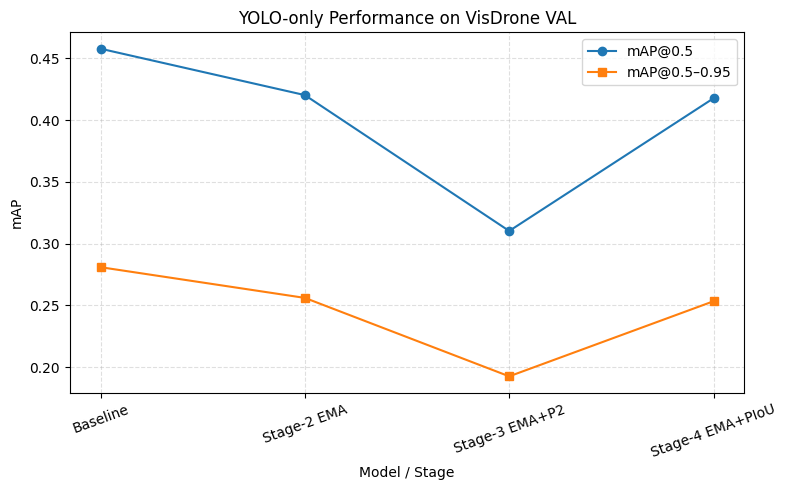

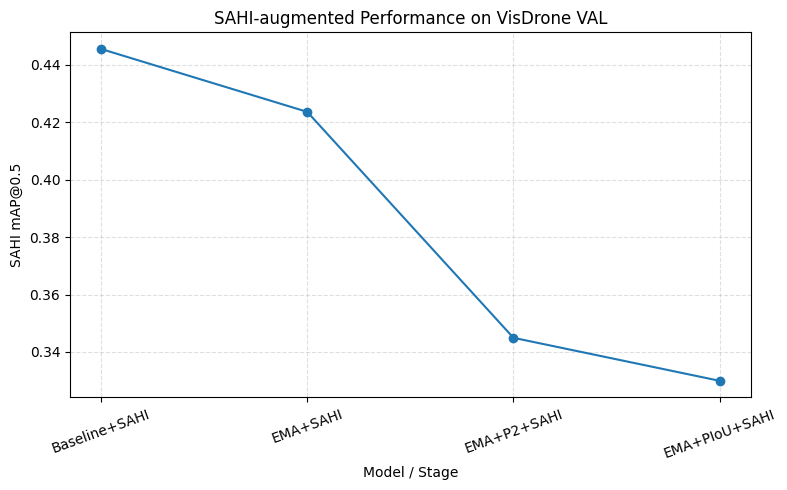

In [3]:
import matplotlib.pyplot as plt

# ================== 1. Store metrics ==================

stages_yolo = ["Baseline", "Stage-2 EMA", "Stage-3 EMA+P2", "Stage-4 EMA+PIoU"]

map50_yolo = [
    0.457861579375732,  # Baseline
    0.420280340771619,  # Stage-2 EMA
    0.3102158366745803, # Stage-3 EMA+P2
    0.417715517088331,  # Stage-4 EMA+PIoU
]

map5095_yolo = [
    0.280878617559259,   # Baseline
    0.25599903075004227, # Stage-2 EMA
    0.19245975788884323, # Stage-3 EMA+P2
    0.2532956244456725,  # Stage-4 EMA+PIoU
]

stages_sahi = ["Baseline+SAHI", "EMA+SAHI", "EMA+P2+SAHI", "EMA+PIoU+SAHI"]

map50_sahi = [
    0.4455909260582905,  # Baseline + SAHI
    0.423663,            # Stage-2 EMA + SAHI
    0.344939,            # Stage-3 EMA+P2 + SAHI
    0.329949,            # Stage-4 EMA+PIoU + SAHI
]

# ================== 2. Plot YOLO-only metrics ==================

plt.figure(figsize=(8, 5))
x = range(len(stages_yolo))

plt.plot(x, map50_yolo, marker="o", label="mAP@0.5")
plt.plot(x, map5095_yolo, marker="s", label="mAP@0.5–0.95")

plt.xticks(x, stages_yolo, rotation=20)
plt.xlabel("Model / Stage")
plt.ylabel("mAP")
plt.title("YOLO-only Performance on VisDrone VAL")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# ================== 3. Plot SAHI metrics ==================

plt.figure(figsize=(8, 5))
x2 = range(len(stages_sahi))

plt.plot(x2, map50_sahi, marker="o")

plt.xticks(x2, stages_sahi, rotation=20)
plt.xlabel("Model / Stage")
plt.ylabel("SAHI mAP@0.5")
plt.title("SAHI-augmented Performance on VisDrone VAL")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [5]:
!pip install "ultralytics==8.3.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requi

#### Plotting Precision vs Confidence (All Models)

This cell is designed to evaluate and visualize the **Precision versus Confidence** curves for various stages of the YOLOv8 object detection model on the VisDrone validation dataset. It helps in understanding how the precision of predictions changes as the confidence threshold is varied, providing insights into the quality of the model's classifications.

-   **`MODELS`**: A list of tuples, where each tuple contains a descriptive name for a model stage (e.g., "Baseline YOLOv8-L", "Stage-2 EMA") and the `Path` to its corresponding best weights file (`best.pt`). This allows for easy iteration through different models for comparative analysis.

-   **`CLASS_NAMES`** and **`NUM_CLASSES`**: Define the class names and the total number of classes, ensuring consistency with the VisDrone dataset structure.

-   **`IOU_THRESH = 0.5`**: Sets the Intersection over Union (IoU) threshold used for determining if a predicted bounding box correctly matches a ground truth bounding box. Only predictions with an IoU of 0.5 or greater are considered True Positives.

-   **`CONF_GRID`**: An array of confidence thresholds (`0.05` to `0.95` in 19 steps) at which precision will be calculated. This forms the x-axis of the plot.

### Helper Functions:

-   **`xywhn_to_xyxy(box, w, h)`**: Converts YOLO-normalized bounding box format `[center_x, center_y, width, height]` to absolute pixel coordinates `[x1, y1, x2, y2]`. This is used to standardize bounding box formats.

-   **`iou_xyxy(box1, box2)`**: Calculates the IoU between two bounding boxes, both in `[x1, y1, x2, y2]` format. Essential for matching predictions to ground truths.

-   **`build_gt_dict()`**: Loads all ground truth bounding boxes from the validation dataset. It stores them in a dictionary `gt[class_id][image_id]` and keeps track of which ground truth boxes have been `detected` (matched by a prediction) to prevent multiple matches for a single ground truth.

-   **`collect_predictions(model_path)`**: Loads a YOLO model from the specified `model_path` and runs inference on all validation images. It sets a very low `conf=0.001` to collect almost all predictions, allowing the `match_predictions_to_gt` function to filter by varying confidence thresholds. The `iou=0.7` here is for the model's internal Non-Maximum Suppression (NMS) during prediction, not for evaluation.

-   **`match_predictions_to_gt(preds, gt_dict, iou_thresh=0.5)`**: Takes a list of raw predictions and the ground truth dictionary. It sorts all predictions by confidence score in descending order and then attempts to match each prediction to a ground truth box using the specified `iou_thresh`. It returns `scores` (confidence of predictions), `tp` (True Positives, 1 if matched, 0 otherwise), and `fp` (False Positives, 1 if not matched or already detected).

-   **`precision_vs_conf(scores, tp, fp, conf_grid)`**: Calculates the micro-averaged precision at each confidence threshold specified in `CONF_GRID`. For a given threshold, it counts TP and FP among predictions above that threshold and computes precision `TP / (TP + FP)`.

### Main Process:

1.  **Load Ground Truth**: The `build_gt_dict()` function is called once to load all ground truth data.
2.  **Iterate Models**: The script loops through each model defined in the `MODELS` list.
3.  **Collect Raw Predictions**: For each model, `collect_predictions()` is called to get all raw predictions (with a very low confidence threshold).
4.  **Match Predictions**: `match_predictions_to_gt()` is used to determine True Positives and False Positives for the collected predictions against the ground truth.
5.  **Compute Precision Curve**: `precision_vs_conf()` calculates the precision at various confidence thresholds for the current model.
6.  **Store Curves**: The generated confidence and precision arrays are stored in the `curves` dictionary.

### Plotting:

-   Finally, `matplotlib.pyplot` is used to plot the Precision vs. Confidence curve for each model. Each curve shows how the model's precision behaves as the confidence threshold changes, allowing for a visual comparison of the different model stages.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Total VAL images: 548
GT loaded.

=== Processing model: Baseline YOLOv8-L ===
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt
Total predictions collected: 125444
Done: Baseline YOLOv8-L

=== Processing model: Stage-2 EMA (C2f-EMA) ===
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt
Total predictions collected: 132303
Done: Stage-2 EMA (C2f-EMA)

=== Processing model: Stage-3 P2 ===
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2_ft/weights/best.pt
Total predictions collected: 62616
Done: Stage-3 P2

=== Processing mo

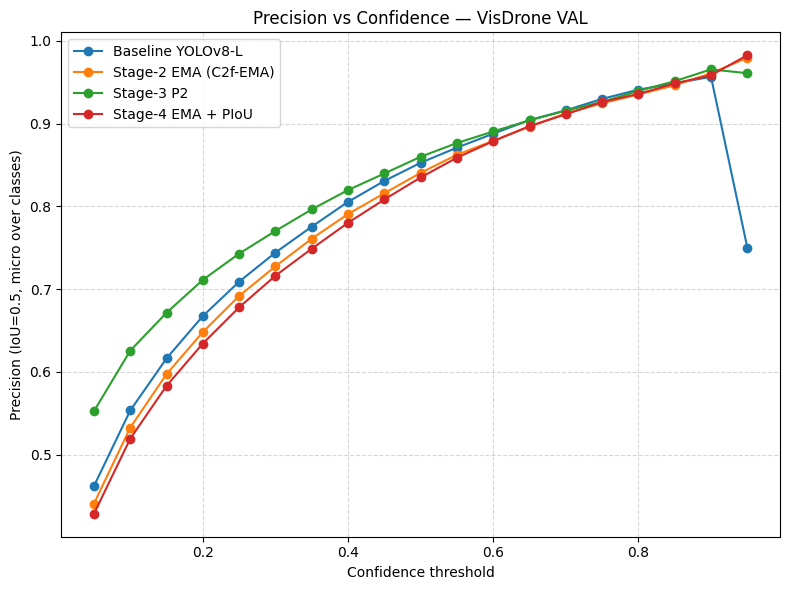

In [1]:
# ===================== Precision vs Confidence (All Models) =====================
from pathlib import Path
from glob import glob
import copy

import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ----------------- Paths -----------------
BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
VAL_IMG_DIR = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "images"
VAL_LBL_DIR = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "labels"

# Your model checkpoints (edit labels or paths if needed)
MODELS = [
    ("Baseline YOLOv8-L",
     BASE_DIR / "runs" / "yolov8_training" / "train" / "weights" / "best.pt"),
    ("Stage-2 EMA (C2f-EMA)",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_ema_ft32" / "weights" / "best.pt"),
    ("Stage-3 P2",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_p2_ft" / "weights" / "best.pt"),
    ("Stage-4 EMA + PIoU",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_ema_piou_ft2" / "weights" / "best.pt"),
]

# VisDrone / YOLO class list for reference (order must match training)
CLASS_NAMES = [
    "pedestrian",
    "people",
    "bicycle",
    "car",
    "van",
    "truck",
    "bus",
    "motor",
    "tricycle",
    "awning-tricycle",
]
NUM_CLASSES = len(CLASS_NAMES)

IOU_THRESH = 0.5
CONF_GRID  = np.linspace(0.05, 0.95, 19)  # confidence thresholds


# ==================== Helpers ====================

def xywhn_to_xyxy(box, w, h):
    """YOLO-normalized [cx, cy, w, h] -> [x1, y1, x2, y2] in pixels."""
    cx, cy, bw, bh = box
    cx *= w
    cy *= h
    bw *= w
    bh *= h
    x1 = cx - bw / 2.0
    y1 = cy - bh / 2.0
    x2 = cx + bw / 2.0
    y2 = cy + bh / 2.0
    return [x1, y1, x2, y2]


def iou_xyxy(box1, box2):
    """IoU of two boxes in [x1,y1,x2,y2]."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    iw = max(0.0, x2 - x1)
    ih = max(0.0, y2 - y1)
    inter = iw * ih
    if inter <= 0:
        return 0.0
    a1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    a2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return inter / (a1 + a2 - inter + 1e-16)


def build_gt_dict():
    """
    Build class-aware GT dict:
      gt[cls][image_id] = {"boxes": [[x1,y1,x2,y2], ...], "detected": [False,..]}
    """
    gt = {c: {} for c in range(NUM_CLASSES)}

    img_files = sorted(glob(str(VAL_IMG_DIR / "*.jpg")))
    print("Total VAL images:", len(img_files))

    for img_path in img_files:
        img_path = Path(img_path)
        stem = img_path.stem
        lbl_path = VAL_LBL_DIR / f"{stem}.txt"
        if not lbl_path.exists():
            continue

        img = cv2.imread(str(img_path))
        if img is None:
            continue
        h, w = img.shape[:2]

        with open(lbl_path, "r") as f:
            lines = [l.strip() for l in f if l.strip()]

        for line in lines:
            parts = line.replace(",", " ").split()
            if len(parts) != 5:
                continue
            cls = int(parts[0])
            cx, cy, bw, bh = map(float, parts[1:])
            x1, y1, x2, y2 = xywhn_to_xyxy([cx, cy, bw, bh], w, h)

            if stem not in gt[cls]:
                gt[cls][stem] = {"boxes": [], "detected": []}
            gt[cls][stem]["boxes"].append([x1, y1, x2, y2])
            gt[cls][stem]["detected"].append(False)

    return gt


def collect_predictions(model_path):
    """
    Run the model on the entire VAL folder once at very low conf,
    return list of predictions:
      preds = [(cls, image_id, score, [x1,y1,x2,y2]), ...]
    """
    device = 0 if torch.cuda.is_available() else "cpu"
    model = YOLO(str(model_path))

    preds = []
    for res in model.predict(
        source=str(VAL_IMG_DIR),
        imgsz=640,
        conf=0.001,      # keep almost all predictions
        iou=0.7,
        device=device,
        stream=True,
        verbose=False,
    ):
        img_path = Path(res.path)
        stem = img_path.stem

        boxes = res.boxes
        if boxes is None or len(boxes) == 0:
            continue

        for b in boxes:
            cls   = int(b.cls.item())
            score = float(b.conf.item())
            x1, y1, x2, y2 = b.xyxy[0].tolist()
            # ignore out-of-range classes for safety
            if cls < 0 or cls >= NUM_CLASSES:
                continue
            preds.append((cls, stem, score, [x1, y1, x2, y2]))

    return preds


def match_predictions_to_gt(preds, gt_dict, iou_thresh=0.5):
    """
    Given predictions and GT, perform one-time matching as in AP computation.
    Returns:
      scores: np.array of prediction confidences (sorted desc)
      tp:     np.array of 0/1, true positives
      fp:     np.array of 0/1, false positives
    Matching is class-aware and per-image.
    """
    # deep copy detection flags so we don't modify original GT
    gt_used = {c: {} for c in range(NUM_CLASSES)}
    for c in range(NUM_CLASSES):
        for img_id, info in gt_dict[c].items():
            gt_used[c][img_id] = {
                "boxes": info["boxes"],
                "detected": [False] * len(info["boxes"]),
            }

    # sort predictions globally by score desc
    preds_sorted = sorted(preds, key=lambda x: x[2], reverse=True)
    scores = np.array([p[2] for p in preds_sorted], dtype=np.float32)
    tp     = np.zeros(len(preds_sorted), dtype=np.float32)
    fp     = np.zeros(len(preds_sorted), dtype=np.float32)

    for i, (cls, img_id, score, box_pred) in enumerate(preds_sorted):
        if img_id not in gt_used[cls]:
            fp[i] = 1.0
            continue

        gt_boxes  = gt_used[cls][img_id]["boxes"]
        detected  = gt_used[cls][img_id]["detected"]
        if len(gt_boxes) == 0:
            fp[i] = 1.0
            continue

        ious = [iou_xyxy(box_pred, g) for g in gt_boxes]
        best_idx = int(np.argmax(ious))
        best_iou = ious[best_idx]

        if best_iou >= iou_thresh and not detected[best_idx]:
            tp[i] = 1.0
            detected[best_idx] = True
        else:
            fp[i] = 1.0

    return scores, tp, fp


def precision_vs_conf(scores, tp, fp, conf_grid):
    """Compute micro-averaged precision at each confidence threshold."""
    precs = []
    for thr in conf_grid:
        mask = scores >= thr
        if not np.any(mask):
            precs.append(0.0)
            continue
        tp_thr = tp[mask].sum()
        fp_thr = fp[mask].sum()
        precs.append(float(tp_thr / max(tp_thr + fp_thr, 1e-16)))
    return np.array(precs, dtype=np.float32)


# ==================== Main: build curves for all models ====================

gt_dict = build_gt_dict()
print("GT loaded.")

curves = {}  # name -> (conf_grid, precision_array)

for name, weight_path in MODELS:
    print(f"\n=== Processing model: {name} ===")
    print("Weights:", weight_path)

    preds = collect_predictions(weight_path)
    print(f"Total predictions collected: {len(preds)}")

    scores, tp, fp = match_predictions_to_gt(preds, gt_dict, iou_thresh=IOU_THRESH)
    precs = precision_vs_conf(scores, tp, fp, CONF_GRID)

    curves[name] = (CONF_GRID, precs)
    print(f"Done: {name}")

# ==================== Plot ====================

plt.figure(figsize=(8, 6))
for name, (conf, precs) in curves.items():
    plt.plot(conf, precs, marker="o", label=name)

plt.xlabel("Confidence threshold")
plt.ylabel("Precision (IoU=0.5, micro over classes)")
plt.title("Precision vs Confidence — VisDrone VAL")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

#### Plotting Recall vs Confidence (All Models)

This cell evaluates and visualizes the **Recall versus Confidence** curves for various stages of the YOLOv8 object detection model on the VisDrone validation dataset. Recall is the ability of the model to find all relevant objects in an image. This plot helps in understanding how the model's ability to detect objects changes as the confidence threshold for predictions is adjusted.

-   **`MODELS`**: A list of tuples, each containing a descriptive name for a model stage (e.g., "Baseline YOLOv8-L", "Stage-2 EMA") and the `Path` to its corresponding best weights file (`best.pt`). This enables comparative analysis across different model stages.

-   **`CLASS_NAMES`** and **`NUM_CLASSES`**: Define the class names and the total number of classes, ensuring consistency with the VisDrone dataset structure.

-   **`IOU_THRESH = 0.5`**: Sets the Intersection over Union (IoU) threshold. A predicted bounding box must have an IoU of at least 0.5 with a ground truth bounding box to be considered a match.

-   **`CONF_GRID`**: An array of confidence thresholds (from 0.05 to 0.95 in 19 steps) at which recall will be calculated. This forms the x-axis of the plot.

-   **`DEVICE`**: Automatically detects if a CUDA-enabled GPU is available and sets the device to `0` (first GPU) or `cpu` accordingly.

### Helper Functions:

-   **`xywhn_to_xyxy(box, w, h)`**: Converts YOLO-normalized bounding box format `[center_x, center_y, width, height]` to absolute pixel coordinates `[x1, y1, x2, y2]`. This is used to standardize bounding box formats.

-   **`iou_xyxy(box1, box2)`**: Calculates the IoU between two bounding boxes, both in `[x1, y1, x2, y2]` format. Essential for matching predictions to ground truths.

-   **`build_gt_dict()`**: Loads all ground truth bounding boxes from the validation dataset. It returns a dictionary `gt[class_id][image_id]` containing the bounding box coordinates and the total count of ground truth objects across all classes.

-   **`run_inference_collect_preds(model, img_files)`**: Loads a YOLO model and runs inference on all validation images with a very low `conf=0.001` to collect almost all predictions. This allows the `match_predictions_to_gt` function to filter by varying confidence thresholds later. It returns a list of predictions `(cls, image_id, score, [x1,y1,x2,y2])`.

-   **`match_predictions_to_gt(preds, gt_dict, iou_thresh=0.5)`**: Takes a list of raw predictions and the ground truth dictionary. It sorts all predictions by confidence score in descending order and then attempts to match each prediction to a ground truth box using the specified `iou_thresh`. It returns `scores` (confidence of predictions), `tp` (True Positives, 1 if matched, 0 otherwise), and `fp` (False Positives, 1 if not matched or already detected).

-   **`recall_vs_conf(scores, tp, total_gt, conf_grid)`**: Calculates the micro-averaged recall at each confidence threshold specified in `CONF_GRID`. For a given threshold, it counts TP among predictions above that threshold and computes recall `TP / total_gt`.

### Main Process:

1.  **Load Ground Truth**: The `build_gt_dict()` function is called once to load all ground truth data and the total number of ground truth objects.
2.  **Iterate Models**: The script loops through each model defined in the `MODELS` list.
3.  **Run Inference and Collect Raw Predictions**: For each model, `run_inference_collect_preds()` is called to obtain all raw predictions.
4.  **Match Predictions**: `match_predictions_to_gt()` is used to determine True Positives and False Positives for the collected predictions against the ground truth.
5.  **Compute Recall Curve**: `recall_vs_conf()` calculates the recall at various confidence thresholds for the current model.
6.  **Store Curves**: The generated confidence and recall arrays are stored in the `curves_recall` dictionary.

### Plotting:

-   Finally, `matplotlib.pyplot` is used to plot the Recall vs. Confidence curve for each model. Each curve shows how the model's recall behaves as the confidence threshold changes, allowing for a visual comparison of the different model stages.

Total VAL images: 548
Total GT boxes (all classes): 38759

===== Model: Baseline YOLOv8-L =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt
Total raw predictions: 125444
Done: Baseline YOLOv8-L

===== Model: Stage-2 EMA =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt
Total raw predictions: 132303
Done: Stage-2 EMA

===== Model: Stage-3 P2 =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2_ft/weights/best.pt
Total raw predictions: 62616
Done: Stage-3 P2

===== Model: Stage-4 EMA+PIoU =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_piou_ft2/weights/best.pt
Total raw predictions: 132613
Done: Stage-4 EMA+PIoU


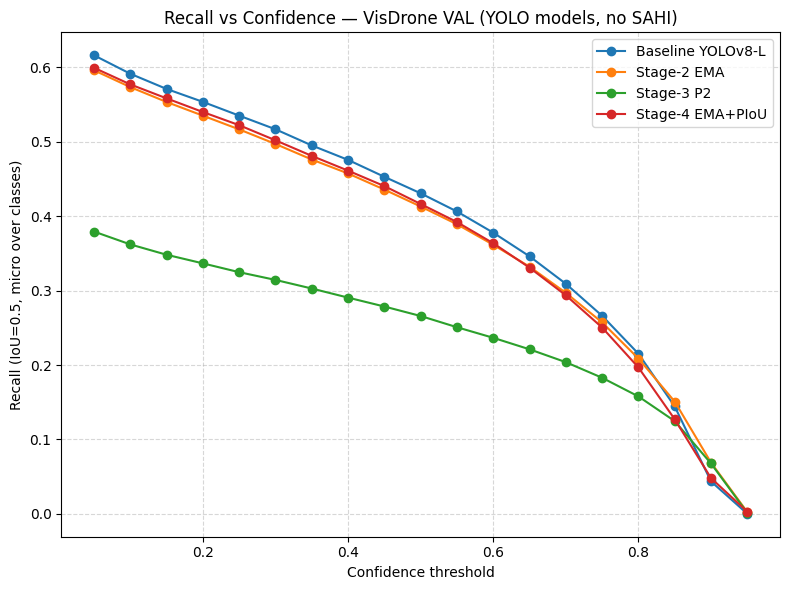

In [3]:
# ================= Recall vs Confidence — YOLO Models (NO SAHI) =================
from pathlib import Path
from glob import glob

import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ----------------- Paths -----------------
BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
VAL_IMG_DIR = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "images"
VAL_LBL_DIR = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "labels"

# MODELS (edit paths if needed)
MODELS = [
    # Baseline YOLOv8-L
    ("Baseline YOLOv8-L",
     BASE_DIR / "runs" / "yolov8_training" / "train" / "weights" / "best.pt"),

    # Stage-2 EMA (C2f-EMA)
    ("Stage-2 EMA",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_ema_ft32" / "weights" / "best.pt"),

    # Stage-3 P2
    ("Stage-3 P2",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_p2_ft" / "weights" / "best.pt"),

    # Stage-4 EMA + PIoU
    ("Stage-4 EMA+PIoU",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_ema_piou_ft2" / "weights" / "best.pt"),
]

# VisDrone / YOLO classes (same as training)
CLASS_NAMES = [
    "pedestrian",
    "people",
    "bicycle",
    "car",
    "van",
    "truck",
    "bus",
    "motor",
    "tricycle",
    "awning-tricycle",
]
NUM_CLASSES = len(CLASS_NAMES)

IOU_THRESH = 0.5
CONF_GRID  = np.linspace(0.05, 0.95, 19)  # thresholds for recall curves

DEVICE = 0 if torch.cuda.is_available() else "cpu"


# ================= Helpers =================

def xywhn_to_xyxy(box, w, h):
    """YOLO-normalized [cx, cy, w, h] -> [x1, y1, x2, y2] in pixels."""
    cx, cy, bw, bh = box
    cx *= w
    cy *= h
    bw *= w
    bh *= h
    x1 = cx - bw / 2.0
    y1 = cy - bh / 2.0
    x2 = cx + bw / 2.0
    y2 = cy + bh / 2.0
    return [x1, y1, x2, y2]


def iou_xyxy(box1, box2):
    """IoU of two boxes in [x1,y1,x2,y2]."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    iw = max(0.0, x2 - x1)
    ih = max(0.0, y2 - y1)
    inter = iw * ih
    if inter <= 0:
        return 0.0
    a1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    a2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return inter / (a1 + a2 - inter + 1e-16)


def build_gt_dict():
    """
    Build GT:
      gt[cls][image_id] = {"boxes": [[x1,y1,x2,y2], ...]}
    Also returns total_gt (sum over all classes).
    """
    gt = {c: {} for c in range(NUM_CLASSES)}
    total_gt = 0

    img_files = sorted(glob(str(VAL_IMG_DIR / "*.jpg")))
    print("Total VAL images:", len(img_files))

    for img_path in img_files:
        img_path = Path(img_path)
        stem = img_path.stem
        lbl_path = VAL_LBL_DIR / f"{stem}.txt"
        if not lbl_path.exists():
            continue

        img = cv2.imread(str(img_path))
        if img is None:
            continue
        h, w = img.shape[:2]

        with open(lbl_path, "r") as f:
            lines = [l.strip() for l in f if l.strip()]

        for line in lines:
            parts = line.replace(",", " ").split()
            if len(parts) != 5:
                continue
            cls = int(parts[0])
            cx, cy, bw, bh = map(float, parts[1:])
            x1, y1, x2, y2 = xywhn_to_xyxy([cx, cy, bw, bh], w, h)

            if stem not in gt[cls]:
                gt[cls][stem] = {"boxes": []}
            gt[cls][stem]["boxes"].append([x1, y1, x2, y2])
            total_gt += 1

    print("Total GT boxes (all classes):", total_gt)
    return gt, total_gt


def run_inference_collect_preds(model, img_files):
    """
    Run model on all images with very low conf.
    Returns list of predictions:
      preds = [(cls, image_id, score, [x1,y1,x2,y2]), ...]
    """
    preds = []
    for img_path in img_files:
        img_path = Path(img_path)
        stem = img_path.stem

        results = model.predict(
            source=str(img_path),
            conf=0.001,   # keep almost all predictions
            iou=0.7,      # NMS IoU (not the eval IoU)
            verbose=False,
            device=DEVICE
        )

        for r in results:
            if r.boxes is None or len(r.boxes) == 0:
                continue
            boxes_xyxy = r.boxes.xyxy.cpu().numpy()
            scores     = r.boxes.conf.cpu().numpy()
            classes    = r.boxes.cls.cpu().numpy().astype(int)

            for b, s, c in zip(boxes_xyxy, scores, classes):
                if c < 0 or c >= NUM_CLASSES:
                    continue
                preds.append((c, stem, float(s), b.tolist()))

    print("Total raw predictions:", len(preds))
    return preds


def match_predictions_to_gt(preds, gt_dict, iou_thresh=0.5):
    """
    Class-aware, IoU-based matching.
    Returns:
      scores: (N,) prediction confidences (sorted desc)
      tp:     (N,) 0/1 true positives
      fp:     (N,) 0/1 false positives
    """
    # Copy GT structure with detection flags
    gt_used = {c: {} for c in range(NUM_CLASSES)}
    for c in range(NUM_CLASSES):
        for img_id, info in gt_dict[c].items():
            gt_used[c][img_id] = {
                "boxes": info["boxes"],
                "detected": [False] * len(info["boxes"]),
            }

    preds_sorted = sorted(preds, key=lambda x: x[2], reverse=True)
    scores = np.array([p[2] for p in preds_sorted], dtype=np.float32)
    tp     = np.zeros(len(preds_sorted), dtype=np.float32)
    fp     = np.zeros(len(preds_sorted), dtype=np.float32)

    for i, (cls, img_id, score, box_pred) in enumerate(preds_sorted):
        if img_id not in gt_used[cls]:
            fp[i] = 1.0
            continue

        gt_boxes = gt_used[cls][img_id]["boxes"]
        detected = gt_used[cls][img_id]["detected"]
        if len(gt_boxes) == 0:
            fp[i] = 1.0
            continue

        ious = [iou_xyxy(box_pred, g) for g in gt_boxes]
        best_idx = int(np.argmax(ious))
        best_iou = ious[best_idx]

        if best_iou >= iou_thresh and not detected[best_idx]:
            tp[i] = 1.0
            detected[best_idx] = True
        else:
            fp[i] = 1.0

    return scores, tp, fp


def recall_vs_conf(scores, tp, total_gt, conf_grid):
    """Micro-averaged recall at each confidence threshold."""
    recalls = []
    for thr in conf_grid:
        mask = scores >= thr
        if not np.any(mask):
            recalls.append(0.0)
            continue
        tp_thr = tp[mask].sum()
        recalls.append(float(tp_thr / max(total_gt, 1e-16)))
    return np.array(recalls, dtype=np.float32)


# ================= Main: build curves for all models =================

# 1) Load GT once
gt_dict, total_gt = build_gt_dict()
img_files = sorted(glob(str(VAL_IMG_DIR / "*.jpg")))

curves_recall = {}  # name -> (conf_grid, recall_array)

# 2) For each model: run inference, match, compute recall curve
for name, wpath in MODELS:
    print(f"\n===== Model: {name} =====")
    print("Weights:", wpath)

    model = YOLO(str(wpath))
    model.to(DEVICE)

    preds = run_inference_collect_preds(model, img_files)
    if len(preds) == 0:
        print("WARNING: no predictions, skipping.")
        continue

    scores, tp, fp = match_predictions_to_gt(preds, gt_dict, iou_thresh=IOU_THRESH)
    recalls = recall_vs_conf(scores, tp, total_gt, CONF_GRID)
    curves_recall[name] = (CONF_GRID, recalls)

    print("Done:", name)

# 3) Plot Recall vs Confidence

plt.figure(figsize=(8, 6))
for name, (conf, recs) in curves_recall.items():
    plt.plot(conf, recs, marker="o", label=name)

plt.xlabel("Confidence threshold")
plt.ylabel("Recall (IoU=0.5, micro over classes)")
plt.title("Recall vs Confidence — VisDrone VAL (YOLO models, no SAHI)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

#### Plotting F1 vs Confidence (All Models)

This cell evaluates and visualizes the **F1 score versus Confidence** curves for various stages of the YOLOv8 object detection model on the VisDrone validation dataset. The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both. This plot helps in understanding how the model's overall detection performance (balancing both false positives and false negatives) changes as the confidence threshold for predictions is adjusted.

-   **`MODELS`**: A list of tuples, each containing a descriptive name for a model stage (e.g., "Baseline YOLOv8-L", "Stage-2 EMA") and the `Path` to its corresponding best weights file (`best.pt`). This enables comparative analysis across different model stages.

-   **`CLASS_NAMES`** and **`NUM_CLASSES`**: Define the class names and the total number of classes, ensuring consistency with the VisDrone dataset structure.

-   **`IOU_THRESH = 0.5`**: Sets the Intersection over Union (IoU) threshold. A predicted bounding box must have an IoU of at least 0.5 with a ground truth bounding box to be considered a match.

-   **`CONF_GRID`**: An array of confidence thresholds (from 0.05 to 0.95 in 19 steps) at which F1 score will be calculated. This forms the x-axis of the plot.

-   **`DEVICE`**: Automatically detects if a CUDA-enabled GPU is available and sets the device to `0` (first GPU) or `cpu` accordingly.

### Helper Functions:

-   **`xywhn_to_xyxy(box, w, h)`**: Converts YOLO-normalized bounding box format `[center_x, center_y, width, height]` to absolute pixel coordinates `[x1, y1, x2, y2]`. This is used to standardize bounding box formats.

-   **`iou_xyxy(box1, box2)`**: Calculates the IoU between two bounding boxes, both in `[x1, y1, x2, y2]` format. Essential for matching predictions to ground truths.

-   **`build_gt_dict()`**: Loads all ground truth bounding boxes from the validation dataset. It returns a dictionary `gt[class_id][image_id]` containing the bounding box coordinates and the total count of ground truth objects across all classes.

-   **`run_inference_collect_preds(model, img_files)`**: Loads a YOLO model and runs inference on all validation images with a very low `conf=0.001` to collect almost all predictions. This allows the `match_predictions_to_gt` function to filter by varying confidence thresholds later. It returns a list of predictions `(cls, image_id, score, [x1,y1,x2,y2])`.

-   **`match_predictions_to_gt(preds, gt_dict, iou_thresh=0.5)`**: Takes a list of raw predictions and the ground truth dictionary. It sorts all predictions by confidence score in descending order and then attempts to match each prediction to a ground truth box using the specified `iou_thresh`. It returns `scores` (confidence of predictions), `tp` (True Positives, 1 if matched, 0 otherwise), and `fp` (False Positives, 1 if not matched or already detected).

-   **`f1_vs_conf(scores, tp, fp, total_gt, conf_grid)`**: Calculates the micro-averaged F1 score at each confidence threshold specified in `CONF_GRID`. For a given threshold, it computes precision and recall from `tp`, `fp`, and `total_gt` among predictions above that threshold, and then calculates F1 score.

### Main Process:

1.  **Load Ground Truth**: The `build_gt_dict()` function is called once to load all ground truth data and the total number of ground truth objects.
2.  **Iterate Models**: The script loops through each model defined in the `MODELS` list.
3.  **Run Inference and Collect Raw Predictions**: For each model, `run_inference_collect_preds()` is called to obtain all raw predictions.
4.  **Match Predictions**: `match_predictions_to_gt()` is used to determine True Positives and False Positives for the collected predictions against the ground truth.
5.  **Compute F1 Curve**: `f1_vs_conf()` calculates the F1 score at various confidence thresholds for the current model.
6.  **Store Curves**: The generated confidence and F1 score arrays are stored in the `curves_f1` dictionary.

### Plotting:

-   Finally, `matplotlib.pyplot` is used to plot the F1 vs. Confidence curve for each model. Each curve shows how the model's F1 score behaves as the confidence threshold changes, allowing for a visual comparison of the different model stages.

Total VAL images: 548
Total GT boxes (all classes): 38759

===== Model: Baseline YOLOv8-L =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt
Total raw predictions: 125444
Done: Baseline YOLOv8-L

===== Model: Stage-2 EMA =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt
Total raw predictions: 132303
Done: Stage-2 EMA

===== Model: Stage-3 P2 =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2_ft/weights/best.pt
Total raw predictions: 62616
Done: Stage-3 P2

===== Model: Stage-4 EMA+PIoU =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_piou_ft2/weights/best.pt
Total raw predictions: 132613
Done: Stage-4 EMA+PIoU


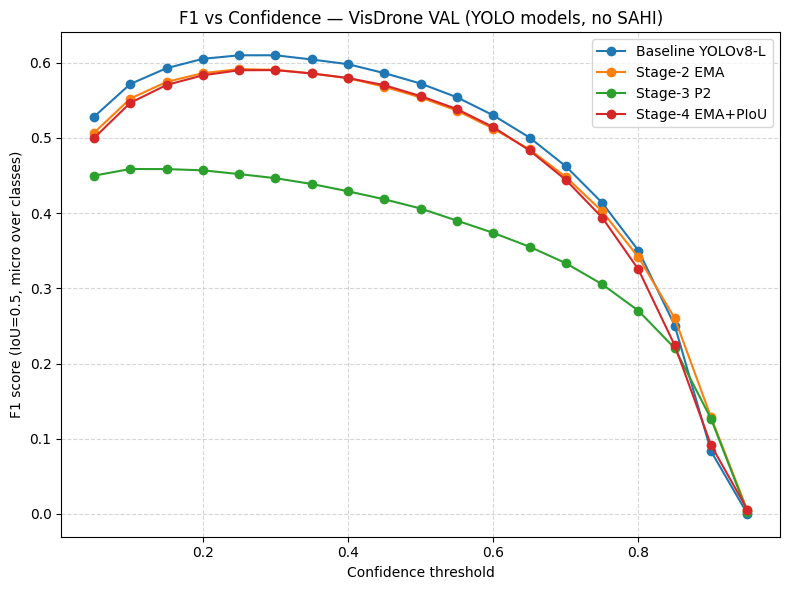

In [4]:
# ================= F1 vs Confidence — YOLO Models (NO SAHI) =================
from pathlib import Path
from glob import glob

import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ----------------- Paths -----------------
BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
VAL_IMG_DIR = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "images"
VAL_LBL_DIR = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "labels"

# MODELS (edit paths if needed)
MODELS = [
    # Baseline YOLOv8-L
    ("Baseline YOLOv8-L",
     BASE_DIR / "runs" / "yolov8_training" / "train" / "weights" / "best.pt"),

    # Stage-2 EMA (C2f-EMA)
    ("Stage-2 EMA",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_ema_ft32" / "weights" / "best.pt"),

    # Stage-3 P2
    ("Stage-3 P2",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_p2_ft" / "weights" / "best.pt"),

    # Stage-4 EMA + PIoU
    ("Stage-4 EMA+PIoU",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_ema_piou_ft2" / "weights" / "best.pt"),
]

# VisDrone / YOLO classes (same as training)
CLASS_NAMES = [
    "pedestrian",
    "people",
    "bicycle",
    "car",
    "van",
    "truck",
    "bus",
    "motor",
    "tricycle",
    "awning-tricycle",
]
NUM_CLASSES = len(CLASS_NAMES)

IOU_THRESH = 0.5
CONF_GRID  = np.linspace(0.05, 0.95, 19)  # thresholds for F1 curves

DEVICE = 0 if torch.cuda.is_available() else "cpu"


# ================= Helpers =================

def xywhn_to_xyxy(box, w, h):
    """YOLO-normalized [cx, cy, w, h] -> [x1, y1, x2, y2] in pixels."""
    cx, cy, bw, bh = box
    cx *= w
    cy *= h
    bw *= w
    bh *= h
    x1 = cx - bw / 2.0
    y1 = cy - bh / 2.0
    x2 = cx + bw / 2.0
    y2 = cy + bh / 2.0
    return [x1, y1, x2, y2]


def iou_xyxy(box1, box2):
    """IoU of two boxes in [x1,y1,x2,y2]."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    iw = max(0.0, x2 - x1)
    ih = max(0.0, y2 - y1)
    inter = iw * ih
    if inter <= 0:
        return 0.0
    a1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    a2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return inter / (a1 + a2 - inter + 1e-16)


def build_gt_dict():
    """
    Build GT:
      gt[cls][image_id] = {"boxes": [[x1,y1,x2,y2], ...]}
    Also returns total_gt (sum over all classes).
    """
    gt = {c: {} for c in range(NUM_CLASSES)}
    total_gt = 0

    img_files = sorted(glob(str(VAL_IMG_DIR / "*.jpg")))
    print("Total VAL images:", len(img_files))

    for img_path in img_files:
        img_path = Path(img_path)
        stem = img_path.stem
        lbl_path = VAL_LBL_DIR / f"{stem}.txt"
        if not lbl_path.exists():
            continue

        img = cv2.imread(str(img_path))
        if img is None:
            continue
        h, w = img.shape[:2]

        with open(lbl_path, "r") as f:
            lines = [l.strip() for l in f if l.strip()]

        for line in lines:
            parts = line.replace(",", " ").split()
            if len(parts) != 5:
                continue
            cls = int(parts[0])
            cx, cy, bw, bh = map(float, parts[1:])
            x1, y1, x2, y2 = xywhn_to_xyxy([cx, cy, bw, bh], w, h)

            if stem not in gt[cls]:
                gt[cls][stem] = {"boxes": []}
            gt[cls][stem]["boxes"].append([x1, y1, x2, y2])
            total_gt += 1

    print("Total GT boxes (all classes):", total_gt)
    return gt, total_gt


def run_inference_collect_preds(model, img_files):
    """
    Run model on all images with very low conf.
    Returns list of predictions:
      preds = [(cls, image_id, score, [x1,y1,x2,y2]), ...]
    """
    preds = []
    for img_path in img_files:
        img_path = Path(img_path)
        stem = img_path.stem

        results = model.predict(
            source=str(img_path),
            conf=0.001,   # keep almost all predictions
            iou=0.7,      # NMS IoU (only for NMS)
            verbose=False,
            device=DEVICE
        )

        for r in results:
            if r.boxes is None or len(r.boxes) == 0:
                continue
            boxes_xyxy = r.boxes.xyxy.cpu().numpy()
            scores     = r.boxes.conf.cpu().numpy()
            classes    = r.boxes.cls.cpu().numpy().astype(int)

            for b, s, c in zip(boxes_xyxy, scores, classes):
                if c < 0 or c >= NUM_CLASSES:
                    continue
                preds.append((c, stem, float(s), b.tolist()))

    print("Total raw predictions:", len(preds))
    return preds


def match_predictions_to_gt(preds, gt_dict, iou_thresh=0.5):
    """
    Class-aware, IoU-based matching.
    Returns:
      scores: (N,) prediction confidences (sorted desc)
      tp:     (N,) 0/1 true positives
      fp:     (N,) 0/1 false positives
    """
    # Copy GT structure with detection flags
    gt_used = {c: {} for c in range(NUM_CLASSES)}
    for c in range(NUM_CLASSES):
        for img_id, info in gt_dict[c].items():
            gt_used[c][img_id] = {
                "boxes": info["boxes"],
                "detected": [False] * len(info["boxes"]),
            }

    preds_sorted = sorted(preds, key=lambda x: x[2], reverse=True)
    scores = np.array([p[2] for p in preds_sorted], dtype=np.float32)
    tp     = np.zeros(len(preds_sorted), dtype=np.float32)
    fp     = np.zeros(len(preds_sorted), dtype=np.float32)

    for i, (cls, img_id, score, box_pred) in enumerate(preds_sorted):
        if img_id not in gt_used[cls]:
            fp[i] = 1.0
            continue

        gt_boxes = gt_used[cls][img_id]["boxes"]
        detected = gt_used[cls][img_id]["detected"]
        if len(gt_boxes) == 0:
            fp[i] = 1.0
            continue

        ious = [iou_xyxy(box_pred, g) for g in gt_boxes]
        best_idx = int(np.argmax(ious))
        best_iou = ious[best_idx]

        if best_iou >= iou_thresh and not detected[best_idx]:
            tp[i] = 1.0
            detected[best_idx] = True
        else:
            fp[i] = 1.0

    return scores, tp, fp


def f1_vs_conf(scores, tp, fp, total_gt, conf_grid):
    """Micro-averaged F1 at each confidence threshold."""
    f1s = []
    for thr in conf_grid:
        mask = scores >= thr
        if not np.any(mask):
            f1s.append(0.0)
            continue

        tp_thr = tp[mask].sum()
        fp_thr = fp[mask].sum()
        fn_thr = total_gt - tp_thr

        precision = tp_thr / max(tp_thr + fp_thr, 1e-16)
        recall    = tp_thr / max(total_gt, 1e-16)
        if precision + recall == 0:
            f1s.append(0.0)
        else:
            f1s.append(float(2 * precision * recall / (precision + recall)))

    return np.array(f1s, dtype=np.float32)


# ================= Main: build curves for all models =================

# 1) Load GT once
gt_dict, total_gt = build_gt_dict()
img_files = sorted(glob(str(VAL_IMG_DIR / "*.jpg")))

curves_f1 = {}  # name -> (conf_grid, f1_array)

# 2) For each model: run inference, match, compute F1 curve
for name, wpath in MODELS:
    print(f"\n===== Model: {name} =====")
    print("Weights:", wpath)

    model = YOLO(str(wpath))
    model.to(DEVICE)

    preds = run_inference_collect_preds(model, img_files)
    if len(preds) == 0:
        print("WARNING: no predictions, skipping.")
        continue

    scores, tp, fp = match_predictions_to_gt(preds, gt_dict, iou_thresh=IOU_THRESH)
    f1s = f1_vs_conf(scores, tp, fp, total_gt, CONF_GRID)
    curves_f1[name] = (CONF_GRID, f1s)

    print("Done:", name)

# 3) Plot F1 vs Confidence

plt.figure(figsize=(8, 6))
for name, (conf, f1s) in curves_f1.items():
    plt.plot(conf, f1s, marker="o", label=name)

plt.xlabel("Confidence threshold")
plt.ylabel("F1 score (IoU=0.5, micro over classes)")
plt.title("F1 vs Confidence — VisDrone VAL (YOLO models, no SAHI)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

#### Plotting Precision vs Recall (All Models)

This cell evaluates and visualizes the **Precision versus Recall** curves for various stages of the YOLOv8 object detection model on the VisDrone validation dataset. A Precision-Recall (PR) curve illustrates the trade-off between precision (the proportion of correct positive identifications) and recall (the proportion of actual positives correctly identified) at various confidence thresholds. A higher area under the PR curve generally indicates a better performing model.

-   **`MODELS`**: A list of tuples, each containing a descriptive name for a model stage (e.g., "Baseline YOLOv8-L", "Stage-2 EMA") and the `Path` to its corresponding best weights file (`best.pt`). This enables comparative analysis across different model stages.

-   **`CLASS_NAMES`** and **`NUM_CLASSES`**: Define the class names and the total number of classes, ensuring consistency with the VisDrone dataset structure.

-   **`IOU_THRESH = 0.5`**: Sets the Intersection over Union (IoU) threshold. A predicted bounding box must have an IoU of at least 0.5 with a ground truth bounding box to be considered a match.

-   **`DEVICE`**: Automatically detects if a CUDA-enabled GPU is available and sets the device to `0` (first GPU) or `cpu` accordingly.

### Helper Functions:

-   **`xywhn_to_xyxy(box, w, h)`**: Converts YOLO-normalized bounding box format `[center_x, center_y, width, height]` to absolute pixel coordinates `[x1, y1, x2, y2]`. This is used to standardize bounding box formats.

-   **`iou_xyxy(box1, box2)`**: Calculates the IoU between two bounding boxes, both in `[x1, y1, x2, y2]` format. Essential for matching predictions to ground truths.

-   **`build_gt_dict()`**: Loads all ground truth bounding boxes from the validation dataset. It returns a dictionary `gt[class_id][image_id]` containing the bounding box coordinates and the total count of ground truth objects across all classes.

-   **`run_inference_collect_preds(model, img_files)`**: Loads a YOLO model and runs inference on all validation images with a very low `conf=0.001` to collect almost all predictions. This allows the `match_predictions_to_gt` function to filter by varying confidence thresholds later. It returns a list of predictions `(cls, image_id, score, [x1,y1,x2,y2])`.

-   **`match_predictions_to_gt(preds, gt_dict, iou_thresh=0.5)`**: Takes a list of raw predictions and the ground truth dictionary. It sorts all predictions by confidence score in descending order and then attempts to match each prediction to a ground truth box using the specified `iou_thresh`. It returns `scores` (confidence of predictions), `tp` (True Positives, 1 if matched, 0 otherwise), and `fp` (False Positives, 1 if not matched or already detected).

-   **`precision_recall_curve(scores, tp, fp, total_gt)`**: Calculates the micro-averaged precision and recall values at different confidence thresholds to construct the PR curve.

### Main Process:

1.  **Load Ground Truth**: The `build_gt_dict()` function is called once to load all ground truth data and the total number of ground truth objects.
2.  **Iterate Models**: The script loops through each model defined in the `MODELS` list.
3.  **Run Inference and Collect Raw Predictions**: For each model, `run_inference_collect_preds()` is called to obtain all raw predictions.
4.  **Match Predictions**: `match_predictions_to_gt()` is used to determine True Positives and False Positives for the collected predictions against the ground truth.
5.  **Compute PR Curve**: `precision_recall_curve()` calculates the precision and recall values for the current model.
6.  **Store Curves**: The generated recall and precision arrays are stored in the `pr_curves` dictionary.

### Plotting:

-   Finally, `matplotlib.pyplot` is used to plot the Precision vs. Recall curve for each model. Each curve represents the trade-off between precision and recall, allowing for a visual comparison of the different model stages. Points are optionally subsampled to reduce clutter for curves with many points.

Total VAL images: 548
Total GT boxes (all classes): 38759

===== Model: Baseline YOLOv8-L =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt
Total raw predictions: 125444
PR curve points: 125444

===== Model: Stage-2 EMA =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_ft32/weights/best.pt
Total raw predictions: 132303
PR curve points: 132303

===== Model: Stage-3 P2 =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_p2_ft/weights/best.pt
Total raw predictions: 62616
PR curve points: 62616

===== Model: Stage-4 EMA+PIoU =====
Weights: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/SOD_yolov8_SAHI_training/sod_yolov8l_ema_piou_ft2/weights/best.pt
Total raw predictions: 132613
PR curve points: 132613


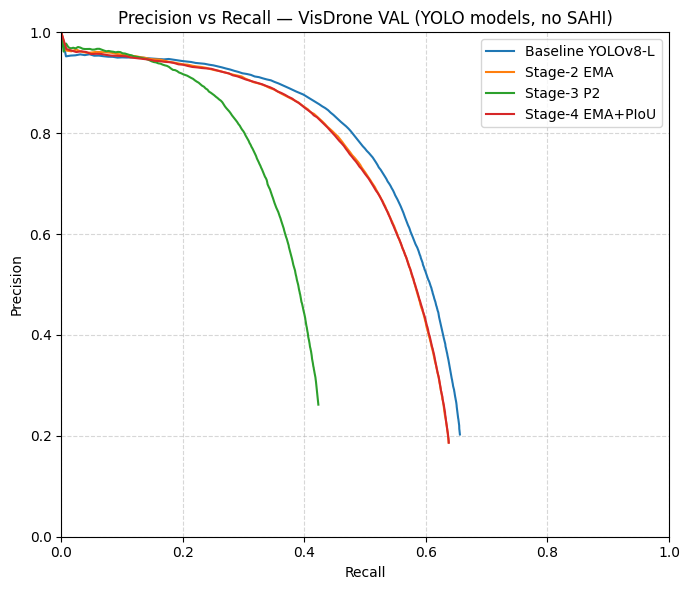

In [5]:
# ================= Precision vs Recall — YOLO Models (NO SAHI) =================
from pathlib import Path
from glob import glob

import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ----------------- Paths -----------------
BASE_DIR    = Path("/content/drive/MyDrive/Projects/SOD YOLOv8")
VAL_IMG_DIR = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "images"
VAL_LBL_DIR = BASE_DIR / "Datasets" / "VisDrone_Dataset" / "VisDrone2019-DET-val" / "labels"

# MODELS (check/adjust paths if needed)
MODELS = [
    ("Baseline YOLOv8-L",
     BASE_DIR / "runs" / "yolov8_training" / "train" / "weights" / "best.pt"),

    ("Stage-2 EMA",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_ema_ft32" / "weights" / "best.pt"),

    ("Stage-3 P2",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_p2_ft" / "weights" / "best.pt"),

    ("Stage-4 EMA+PIoU",
     BASE_DIR / "runs" / "SOD_yolov8_SAHI_training" / "sod_yolov8l_ema_piou_ft2" / "weights" / "best.pt"),
]

# VisDrone class names
CLASS_NAMES = [
    "pedestrian",
    "people",
    "bicycle",
    "car",
    "van",
    "truck",
    "bus",
    "motor",
    "tricycle",
    "awning-tricycle",
]
NUM_CLASSES = len(CLASS_NAMES)

IOU_THRESH = 0.5
DEVICE = 0 if torch.cuda.is_available() else "cpu"


# ================= Helpers =================

def xywhn_to_xyxy(box, w, h):
    """YOLO-normalized [cx, cy, w, h] -> [x1, y1, x2, y2] in pixels."""
    cx, cy, bw, bh = box
    cx *= w
    cy *= h
    bw *= w
    bh *= h
    x1 = cx - bw / 2.0
    y1 = cy - bh / 2.0
    x2 = cx + bw / 2.0
    y2 = cy + bh / 2.0
    return [x1, y1, x2, y2]


def iou_xyxy(box1, box2):
    """IoU of two boxes in [x1,y1,x2,y2]."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    iw = max(0.0, x2 - x1)
    ih = max(0.0, y2 - y1)
    inter = iw * ih
    if inter <= 0:
        return 0.0
    a1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    a2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return inter / (a1 + a2 - inter + 1e-16)


def build_gt_dict():
    """
    Build GT:
      gt[cls][image_id] = {"boxes": [[x1,y1,x2,y2], ...]}
    Returns:
      gt_dict, total_gt (sum over all classes).
    """
    gt = {c: {} for c in range(NUM_CLASSES)}
    total_gt = 0

    img_files = sorted(glob(str(VAL_IMG_DIR / "*.jpg")))
    print("Total VAL images:", len(img_files))

    for img_path in img_files:
        img_path = Path(img_path)
        stem = img_path.stem
        lbl_path = VAL_LBL_DIR / f"{stem}.txt"
        if not lbl_path.exists():
            continue

        img = cv2.imread(str(img_path))
        if img is None:
            continue
        h, w = img.shape[:2]

        with open(lbl_path, "r") as f:
            lines = [l.strip() for l in f if l.strip()]

        for line in lines:
            parts = line.replace(",", " ").split()
            if len(parts) != 5:
                continue
            cls = int(parts[0])
            cx, cy, bw, bh = map(float, parts[1:])
            x1, y1, x2, y2 = xywhn_to_xyxy([cx, cy, bw, bh], w, h)

            if stem not in gt[cls]:
                gt[cls][stem] = {"boxes": []}
            gt[cls][stem]["boxes"].append([x1, y1, x2, y2])
            total_gt += 1

    print("Total GT boxes (all classes):", total_gt)
    return gt, total_gt


def run_inference_collect_preds(model, img_files):
    """
    Run model on all images with low conf threshold.
    Returns:
      preds = [(cls, image_id, score, [x1,y1,x2,y2]), ...]
    """
    preds = []
    for img_path in img_files:
        img_path = Path(img_path)
        stem = img_path.stem

        results = model.predict(
            source=str(img_path),
            conf=0.001,   # keep nearly all
            iou=0.7,      # NMS IoU
            verbose=False,
            device=DEVICE,
        )

        for r in results:
            if r.boxes is None or len(r.boxes) == 0:
                continue
            boxes_xyxy = r.boxes.xyxy.cpu().numpy()
            scores     = r.boxes.conf.cpu().numpy()
            classes    = r.boxes.cls.cpu().numpy().astype(int)

            for b, s, c in zip(boxes_xyxy, scores, classes):
                if c < 0 or c >= NUM_CLASSES:
                    continue
                preds.append((c, stem, float(s), b.tolist()))

    print("Total raw predictions:", len(preds))
    return preds


def match_predictions_to_gt(preds, gt_dict, iou_thresh=0.5):
    """
    Class-aware IoU matching.
    Returns:
      scores (N,), tp (N,), fp (N,)
    where predictions are sorted by descending score.
    """
    # GT + detection flags
    gt_used = {c: {} for c in range(NUM_CLASSES)}
    for c in range(NUM_CLASSES):
        for img_id, info in gt_dict[c].items():
            gt_used[c][img_id] = {
                "boxes": info["boxes"],
                "detected": [False] * len(info["boxes"]),
            }

    preds_sorted = sorted(preds, key=lambda x: x[2], reverse=True)
    scores = np.array([p[2] for p in preds_sorted], dtype=np.float32)
    tp     = np.zeros(len(preds_sorted), dtype=np.float32)
    fp     = np.zeros(len(preds_sorted), dtype=np.float32)

    for i, (cls, img_id, score, box_pred) in enumerate(preds_sorted):
        if img_id not in gt_used[cls]:
            fp[i] = 1.0
            continue

        gt_boxes = gt_used[cls][img_id]["boxes"]
        detected = gt_used[cls][img_id]["detected"]
        if len(gt_boxes) == 0:
            fp[i] = 1.0
            continue

        ious = [iou_xyxy(box_pred, g) for g in gt_boxes]
        best_idx = int(np.argmax(ious))
        best_iou = ious[best_idx]

        if best_iou >= iou_thresh and not detected[best_idx]:
            tp[i] = 1.0
            detected[best_idx] = True
        else:
            fp[i] = 1.0

    return scores, tp, fp


def precision_recall_curve(scores, tp, fp, total_gt):
    """
    Micro-averaged precision–recall curve (across all classes).
    Returns:
      rec (N,), prec (N,)
    """
    # sorted already by score desc
    tp_cum = np.cumsum(tp)
    fp_cum = np.cumsum(fp)

    rec  = tp_cum / max(total_gt, 1e-16)
    prec = tp_cum / np.maximum(tp_cum + fp_cum, 1e-16)

    # Optional cleaning: keep unique recall points (monotonic)
    # Already non-decreasing by construction, so we can plot directly.
    return rec, prec


# ================= Main =================

# 1) GT once
gt_dict, total_gt = build_gt_dict()
img_files = sorted(glob(str(VAL_IMG_DIR / "*.jpg")))

pr_curves = {}  # name -> (rec, prec)

# 2) For each model compute PR
for name, wpath in MODELS:
    print(f"\n===== Model: {name} =====")
    print("Weights:", wpath)

    model = YOLO(str(wpath))
    model.to(DEVICE)

    preds = run_inference_collect_preds(model, img_files)
    if len(preds) == 0:
        print("WARNING: no predictions, skipping.")
        continue

    scores, tp, fp = match_predictions_to_gt(preds, gt_dict, iou_thresh=IOU_THRESH)
    rec, prec = precision_recall_curve(scores, tp, fp, total_gt)
    pr_curves[name] = (rec, prec)

    print(f"PR curve points: {len(rec)}")

# 3) Plot Precision vs Recall

plt.figure(figsize=(7, 6))
for name, (rec, prec) in pr_curves.items():
    # Optionally subsample to reduce clutter
    if len(rec) > 1000:
        idx = np.linspace(0, len(rec) - 1, 400).astype(int)
        rec_plot = rec[idx]
        prec_plot = prec[idx]
    else:
        rec_plot = rec
        prec_plot = prec

    plt.plot(rec_plot, prec_plot, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall — VisDrone VAL (YOLO models, no SAHI)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.legend()
plt.tight_layout()
plt.show()